In [16]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from os import walk
from tqdm import tqdm
import ast

# First Import Each Samples block start and end coordinates

In [17]:
T2T = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/T2T/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])
HG01890 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01890/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])
HG01106 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01106/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])
HG01952 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01952/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])
HC02666 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HC02666/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])
HG02011 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG02011/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])
HG00358 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG00358/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])

In [6]:
SB_DF = T2T[T2T['Block_Type']=='Spacer Block'].copy()
SB_DF

,Block_Number,Block_Type,Length,Start,End,SampleName
0,0,Spacer Block,1042266,27617807,28660072,HG002
2,1,Spacer Block,514105,28686561,29200665,HG002
4,2,Spacer Block,81386,29239365,29320750,HG002
6,3,Spacer Block,1614064,29356077,30970140,HG002
8,4,Spacer Block,651917,31197827,31849743,HG002
10,5,Spacer Block,822359,32018111,32840469,HG002
12,6,Spacer Block,214994,33089757,33304750,HG002
14,7,Spacer Block,999394,33544622,34544015,HG002
16,8,Spacer Block,362578,35727721,36090298,HG002
18,9,Spacer Block,275556,36170540,36446095,HG002


# Import and merge HMMER CSV

In [2]:
#Filtered T2T
T2T_hmmerDF = pd.read_csv("/home/mark/Desktop/chromosome_y/centReferences/HMMER/Filtered/T2T_Filtered.csv").drop(columns=['Unnamed: 0'])
T2T_hmmerDF

,target,accession,query,accession.1,hmmfrom,hmmto,alifrom,alito,envfrom,envto,...,strant,E-value,score,bias,description of target,Unnamed: 16,Repeat array def from Pille,Distance,Unnamed: 19,Unique_Identifier
0,chrY,-,DYZ18_Yq,-,2,2864,27462682,27465534,27462681,27465534,...,+,0,2465.7,541.0,-,2852,DYZ18_Yq,0,distance bw DYZ18 copies,0
1,chrY,-,DYZ18_Yq,-,2,2864,27465536,27468378,27465535,27468378,...,+,0,2448.0,542.7,-,2842,DYZ18_Yq,2,NaN,2
2,chrY,-,DYZ18_Yq,-,2,2864,27468380,27471226,27468379,27471226,...,+,0,2405.6,546.7,-,2846,DYZ18_Yq,2,NaN,4
3,chrY,-,DYZ18_Yq,-,2,2864,27471228,27474074,27471227,27474074,...,+,0,2436.5,556.3,-,2846,DYZ18_Yq,2,NaN,6
4,chrY,-,DYZ18_Yq,-,2,2864,27474076,27476938,27474075,27476938,...,+,0,2513.2,534.1,-,2862,DYZ18_Yq,2,NaN,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5749,chrY,-,DYZ1_Yq,-,1,3583,61984352,61987858,61987858,61984351,...,-,0,2798.9,568.5,-,-3506,DYZ1_Yq,2,NaN,11589
5750,chrY,-,DYZ1_Yq,-,1,3583,61987860,61991354,61991354,61987859,...,-,0,2816.5,564.2,-,-3494,DYZ1_Yq,2,NaN,11591
5751,chrY,-,DYZ1_Yq,-,1,3582,61991357,61994853,61994853,61991355,...,-,0,2840.7,567.1,-,-3496,DYZ1_Yq,3,NaN,11593
5752,chrY,-,DYZ1_Yq,-,1,3583,61994855,61998397,61998397,61994854,...,-,0,2886.9,560.8,-,-3542,DYZ1_Yq,2,NaN,11595


In [58]:
HG01890_DYZ1 = pd.read_csv("/home/mark/Desktop/chromosome_y/centReferences/HMMER/Original/HG01890/HG01890.HIFIRW.ONTUL.na.chrY.DYZ1_Yq.norm.tsv", sep='\t', header=None).rename(columns={0:'target',1:'query',2:'hmmfrom',3:'hmmto',4:'alifrom',5:'alito',6:'envfrom',7:'envto',9:'strand', 10:'E-value', 11:'score'})
HG01890_DYZ18 = pd.read_csv("/home/mark/Desktop/chromosome_y/centReferences/HMMER/Original/HG01890/HG01890.HIFIRW.ONTUL.na.chrY.DYZ18_Yq.norm.tsv", sep='\t', header=None).rename(columns={0:'target',1:'query',2:'hmmfrom',3:'hmmto',4:'alifrom',5:'alito',6:'envfrom',7:'envto',9:'strand', 10:'E-value', 11:'score'})
HG01890_DYZ19 = pd.read_csv("/home/mark/Desktop/chromosome_y/centReferences/HMMER/Original/HG01890/HG01890.HIFIRW.ONTUL.na.chrY.DYZ19_Yq.norm.tsv", sep='\t', header=None).rename(columns={0:'target',1:'query',2:'hmmfrom',3:'hmmto',4:'alifrom',5:'alito',6:'envfrom',7:'envto',9:'strand', 10:'E-value', 11:'score'})
HG01890_Three = pd.read_csv("/home/mark/Desktop/chromosome_y/centReferences/HMMER/Original/HG01890/HG01890.HIFIRW.ONTUL.na.chrY.Yqhet_3k1bp.norm.tsv", sep='\t', header=None).rename(columns={0:'target',1:'query',2:'hmmfrom',3:'hmmto',4:'alifrom',5:'alito',6:'envfrom',7:'envto',9:'strand', 10:'E-value', 11:'score'})
HG01890_Two = pd.read_csv("/home/mark/Desktop/chromosome_y/centReferences/HMMER/Original/HG01890/HG01890.HIFIRW.ONTUL.na.chrY.Yqhet_2k7bp.norm.tsv", sep='\t', header=None).rename(columns={0:'target',1:'query',2:'hmmfrom',3:'hmmto',4:'alifrom',5:'alito',6:'envfrom',7:'envto',9:'strand', 10:'E-value', 11:'score'})

In [59]:
HG02011_DYZ1 = pd.read_csv("/home/mark/Desktop/chromosome_y/centReferences/HMMER/Original/HG02011/HG02011.HIFIRW.ONTUL.na.chrY.DYZ1_Yq.norm.tsv", sep='\t', header=None).rename(columns={0:'target',1:'query',2:'hmmfrom',3:'hmmto',4:'alifrom',5:'alito',6:'envfrom',7:'envto',9:'strand', 10:'E-value', 11:'score'})
HG02011_DYZ18 = pd.read_csv("/home/mark/Desktop/chromosome_y/centReferences/HMMER/Original/HG02011/HG02011.HIFIRW.ONTUL.na.chrY.DYZ18_Yq.norm.tsv", sep='\t', header=None).rename(columns={0:'target',1:'query',2:'hmmfrom',3:'hmmto',4:'alifrom',5:'alito',6:'envfrom',7:'envto',9:'strand', 10:'E-value', 11:'score'})
HG02011_DYZ19 = pd.read_csv("/home/mark/Desktop/chromosome_y/centReferences/HMMER/Original/HG02011/HG02011.HIFIRW.ONTUL.na.chrY.DYZ19_Yq.norm.tsv", sep='\t', header=None).rename(columns={0:'target',1:'query',2:'hmmfrom',3:'hmmto',4:'alifrom',5:'alito',6:'envfrom',7:'envto',9:'strand', 10:'E-value', 11:'score'})
HG02011_Three = pd.read_csv("/home/mark/Desktop/chromosome_y/centReferences/HMMER/Original/HG02011/HG02011.HIFIRW.ONTUL.na.chrY.Yqhet_3k1bp.norm.tsv", sep='\t', header=None).rename(columns={0:'target',1:'query',2:'hmmfrom',3:'hmmto',4:'alifrom',5:'alito',6:'envfrom',7:'envto',9:'strand', 10:'E-value', 11:'score'})
HG02011_Two = pd.read_csv("/home/mark/Desktop/chromosome_y/centReferences/HMMER/Original/HG02011/HG02011.HIFIRW.ONTUL.na.chrY.Yqhet_2k7bp.norm.tsv", sep='\t', header=None).rename(columns={0:'target',1:'query',2:'hmmfrom',3:'hmmto',4:'alifrom',5:'alito',6:'envfrom',7:'envto',9:'strand', 10:'E-value', 11:'score'})

In [60]:
HG01952_DYZ1 = pd.read_csv("/home/mark/Desktop/chromosome_y/centReferences/HMMER/Original/HG01952/HG01952.HIFIRW.ONTUL.na.chrY.DYZ1_Yq.norm.tsv", sep='\t', header=None).rename(columns={0:'target',1:'query',2:'hmmfrom',3:'hmmto',4:'alifrom',5:'alito',6:'envfrom',7:'envto',9:'strand', 10:'E-value', 11:'score'})
HG01952_DYZ18 = pd.read_csv("/home/mark/Desktop/chromosome_y/centReferences/HMMER/Original/HG01952/HG01952.HIFIRW.ONTUL.na.chrY.DYZ18_Yq.norm.tsv", sep='\t', header=None).rename(columns={0:'target',1:'query',2:'hmmfrom',3:'hmmto',4:'alifrom',5:'alito',6:'envfrom',7:'envto',9:'strand', 10:'E-value', 11:'score'})
HG01952_DYZ19 = pd.read_csv("/home/mark/Desktop/chromosome_y/centReferences/HMMER/Original/HG01952/HG01952.HIFIRW.ONTUL.na.chrY.DYZ19_Yq.norm.tsv", sep='\t', header=None).rename(columns={0:'target',1:'query',2:'hmmfrom',3:'hmmto',4:'alifrom',5:'alito',6:'envfrom',7:'envto',9:'strand', 10:'E-value', 11:'score'})
HG01952_Three = pd.read_csv("/home/mark/Desktop/chromosome_y/centReferences/HMMER/Original/HG01952/HG01952.HIFIRW.ONTUL.na.chrY.Yqhet_3k1bp.norm.tsv", sep='\t', header=None).rename(columns={0:'target',1:'query',2:'hmmfrom',3:'hmmto',4:'alifrom',5:'alito',6:'envfrom',7:'envto',9:'strand', 10:'E-value', 11:'score'})
HG01952_Two = pd.read_csv("/home/mark/Desktop/chromosome_y/centReferences/HMMER/Original/HG01952/HG01952.HIFIRW.ONTUL.na.chrY.Yqhet_2k7bp.norm.tsv", sep='\t', header=None).rename(columns={0:'target',1:'query',2:'hmmfrom',3:'hmmto',4:'alifrom',5:'alito',6:'envfrom',7:'envto',9:'strand', 10:'E-value', 11:'score'})

In [61]:
HG01106_DYZ1 = pd.read_csv("/home/mark/Desktop/chromosome_y/centReferences/HMMER/Original/HG01106/HG01106.HIFIRW.ONTUL.na.chrY.DYZ1_Yq.norm.tsv", sep='\t', header=None).rename(columns={0:'target',1:'query',2:'hmmfrom',3:'hmmto',4:'alifrom',5:'alito',6:'envfrom',7:'envto',9:'strand', 10:'E-value', 11:'score'})
HG01106_DYZ18 = pd.read_csv("/home/mark/Desktop/chromosome_y/centReferences/HMMER/Original/HG01106/HG01106.HIFIRW.ONTUL.na.chrY.DYZ18_Yq.norm.tsv", sep='\t', header=None).rename(columns={0:'target',1:'query',2:'hmmfrom',3:'hmmto',4:'alifrom',5:'alito',6:'envfrom',7:'envto',9:'strand', 10:'E-value', 11:'score'})
HG01106_DYZ19 = pd.read_csv("/home/mark/Desktop/chromosome_y/centReferences/HMMER/Original/HG01106/HG01106.HIFIRW.ONTUL.na.chrY.DYZ19_Yq.norm.tsv", sep='\t', header=None).rename(columns={0:'target',1:'query',2:'hmmfrom',3:'hmmto',4:'alifrom',5:'alito',6:'envfrom',7:'envto',9:'strand', 10:'E-value', 11:'score'})
HG01106_Three = pd.read_csv("/home/mark/Desktop/chromosome_y/centReferences/HMMER/Original/HG01106/HG01106.HIFIRW.ONTUL.na.chrY.Yqhet_3k1bp.norm.tsv", sep='\t', header=None).rename(columns={0:'target',1:'query',2:'hmmfrom',3:'hmmto',4:'alifrom',5:'alito',6:'envfrom',7:'envto',9:'strand', 10:'E-value', 11:'score'})
HG01106_Two = pd.read_csv("/home/mark/Desktop/chromosome_y/centReferences/HMMER/Original/HG01106/HG01106.HIFIRW.ONTUL.na.chrY.Yqhet_2k7bp.norm.tsv", sep='\t', header=None).rename(columns={0:'target',1:'query',2:'hmmfrom',3:'hmmto',4:'alifrom',5:'alito',6:'envfrom',7:'envto',9:'strand', 10:'E-value', 11:'score'})

In [62]:
HG00358_DYZ1 = pd.read_csv("/home/mark/Desktop/chromosome_y/centReferences/HMMER/Original/HG00358/HG00358.HIFIRW.ONTUL.na.chrY.DYZ1_Yq.norm.tsv", sep='\t', header=None).rename(columns={0:'target',1:'query',2:'hmmfrom',3:'hmmto',4:'alifrom',5:'alito',6:'envfrom',7:'envto',9:'strand', 10:'E-value', 11:'score'})
HG00358_DYZ18 = pd.read_csv("/home/mark/Desktop/chromosome_y/centReferences/HMMER/Original/HG00358/HG00358.HIFIRW.ONTUL.na.chrY.DYZ18_Yq.norm.tsv", sep='\t', header=None).rename(columns={0:'target',1:'query',2:'hmmfrom',3:'hmmto',4:'alifrom',5:'alito',6:'envfrom',7:'envto',9:'strand', 10:'E-value', 11:'score'})
HG00358_DYZ19 = pd.read_csv("/home/mark/Desktop/chromosome_y/centReferences/HMMER/Original/HG00358/HG00358.HIFIRW.ONTUL.na.chrY.DYZ19_Yq.norm.tsv", sep='\t', header=None).rename(columns={0:'target',1:'query',2:'hmmfrom',3:'hmmto',4:'alifrom',5:'alito',6:'envfrom',7:'envto',9:'strand', 10:'E-value', 11:'score'})
HG00358_Three = pd.read_csv("/home/mark/Desktop/chromosome_y/centReferences/HMMER/Original/HG00358/HG00358.HIFIRW.ONTUL.na.chrY.Yqhet_3k1bp.norm.tsv", sep='\t', header=None).rename(columns={0:'target',1:'query',2:'hmmfrom',3:'hmmto',4:'alifrom',5:'alito',6:'envfrom',7:'envto',9:'strand', 10:'E-value', 11:'score'})
HG00358_Two = pd.read_csv("/home/mark/Desktop/chromosome_y/centReferences/HMMER/Original/HG00358/HG00358.HIFIRW.ONTUL.na.chrY.Yqhet_2k7bp.norm.tsv", sep='\t', header=None).rename(columns={0:'target',1:'query',2:'hmmfrom',3:'hmmto',4:'alifrom',5:'alito',6:'envfrom',7:'envto',9:'strand', 10:'E-value', 11:'score'})

In [63]:
HC02666_DYZ1 = pd.read_csv("/home/mark/Desktop/chromosome_y/centReferences/HMMER/Original/HC02666/HC02666.HIFIRW.ONTUL.na.chrY.DYZ1_Yq.norm.tsv", sep='\t', header=None).rename(columns={0:'target',1:'query',2:'hmmfrom',3:'hmmto',4:'alifrom',5:'alito',6:'envfrom',7:'envto',9:'strand', 10:'E-value', 11:'score'})
HC02666_DYZ18 = pd.read_csv("/home/mark/Desktop/chromosome_y/centReferences/HMMER/Original/HC02666/HC02666.HIFIRW.ONTUL.na.chrY.DYZ18_Yq.norm.tsv", sep='\t', header=None).rename(columns={0:'target',1:'query',2:'hmmfrom',3:'hmmto',4:'alifrom',5:'alito',6:'envfrom',7:'envto',9:'strand', 10:'E-value', 11:'score'})
HC02666_DYZ19 = pd.read_csv("/home/mark/Desktop/chromosome_y/centReferences/HMMER/Original/HC02666/HC02666.HIFIRW.ONTUL.na.chrY.DYZ19_Yq.norm.tsv", sep='\t', header=None).rename(columns={0:'target',1:'query',2:'hmmfrom',3:'hmmto',4:'alifrom',5:'alito',6:'envfrom',7:'envto',9:'strand', 10:'E-value', 11:'score'})
HC02666_Three = pd.read_csv("/home/mark/Desktop/chromosome_y/centReferences/HMMER/Original/HC02666/HC02666.HIFIRW.ONTUL.na.chrY.Yqhet_3k1bp.norm.tsv", sep='\t', header=None).rename(columns={0:'target',1:'query',2:'hmmfrom',3:'hmmto',4:'alifrom',5:'alito',6:'envfrom',7:'envto',9:'strand', 10:'E-value', 11:'score'})
HC02666_Two = pd.read_csv("/home/mark/Desktop/chromosome_y/centReferences/HMMER/Original/HC02666/HC02666.HIFIRW.ONTUL.na.chrY.Yqhet_2k7bp.norm.tsv", sep='\t', header=None).rename(columns={0:'target',1:'query',2:'hmmfrom',3:'hmmto',4:'alifrom',5:'alito',6:'envfrom',7:'envto',9:'strand', 10:'E-value', 11:'score'})

In [64]:
def mergeHMMER(DYZ1DF, DYZ18DF, DYZ19DF, ThreeKbDF, TwoKbDF, start, end):
    
    DYZ1 = DYZ1DF[DYZ1DF['E-value']==0].copy()
    DYZ18 = DYZ18DF[DYZ18DF['E-value']==0].copy()
    DYZ19 = DYZ19DF[DYZ19DF['E-value']==0].copy()
    THRkb = ThreeKbDF[ThreeKbDF['E-value']==0].copy()
    TWOkb = TwoKbDF[TwoKbDF['E-value']==0].copy()
    
    combine = [DYZ1, DYZ18, DYZ19, THRkb, TWOkb]
    resultDF = pd.concat(combine)
    resultDF.sort_values(by=['alifrom'], inplace=True)
    resultDF2 = resultDF[(resultDF['alifrom'] >= start) & (resultDF['alifrom'] <= end)].copy()
    return(resultDF2)

In [ ]:
#Sample Name,Starting Coordinate,Ending Coordinate,Yq Region,,
#HG002,62025214,62123571,previously assembled/Not Analyzed,,
#HC02666,54344471,54442810,previously assembled/Not Analyzed,,
#HG01890,46065019,46163349,previously assembled/Not Analyzed,,
#HG02011,40183736,40282069,previously assembled/Not Analyzed,,
#HG01106,37764912,37863253,previously assembled/Not Analyzed,,
#HG01952,23047401,23145755,previously assembled/Not Analyzed,,
#HG00358,58470498,58568835,previously assembled/Not Analyzed,,

In [45]:
ACF = pd.read_csv("/home/mark/Desktop/chromosome_y/assemblies/assembly_coordinates.txt", sep='\t').set_index("Assembly")
ACF

,Start,End,Portion,Contig_Header
Assembly,,,,
T2T,27462682,27617806,other2_DYZ18,NaN
T2T,27617807,62123571,HET3_Yq,NaN
HG02666,28353027,28485325,other2_DYZ18,NaN
HG02666,28485325,54446525,HET3_Yq,NaN
HG00358,26322870,26529791,other2_DYZ18,NaN
HG00358,26529791,58568835,HET3_Yq,NaN
HG01890,28322351,28526630,other2_DYZ18,NaN
HG01890,28526630,46163349,HET3_Yq,NaN
HG01952,453468,619972,other2_DYZ18,NaN


In [76]:
HG01890_merged = mergeHMMER(HG01890_DYZ1, HG01890_DYZ18, HG01890_DYZ19, HG01890_Three, HG01890_Two, 28322351, 46065019)
HC02666_merged = mergeHMMER(HC02666_DYZ1, HC02666_DYZ18, HC02666_DYZ19, HC02666_Three, HC02666_Two, 28352767, 54344471)
HG00358_merged = mergeHMMER(HG00358_DYZ1, HG00358_DYZ18, HG00358_DYZ19, HG00358_Three, HG00358_Two, 26322870, 58470498)
HG01106_merged = mergeHMMER(HG01106_DYZ1, HG01106_DYZ18, HG01106_DYZ19, HG01106_Three, HG01106_Two, 477438, 37764912)
HG01952_merged = mergeHMMER(HG01952_DYZ1, HG01952_DYZ18, HG01952_DYZ19, HG01952_Three, HG01952_Two, 453468, 23047401)
HG02011_merged = mergeHMMER(HG02011_DYZ1, HG02011_DYZ18, HG02011_DYZ19, HG02011_Three, HG02011_Two, 16990153, 40183736)

In [79]:
#HG02011_merged.to_csv('/home/mark/Desktop/chromosome_y/centReferences/HMMER/Filtered/HG02011.csv')
#HG01952_merged.to_csv('/home/mark/Desktop/chromosome_y/centReferences/HMMER/Filtered/HG01952.csv')
#HG01106_merged.to_csv('/home/mark/Desktop/chromosome_y/centReferences/HMMER/Filtered/HG01106.csv')
#HG00358_merged.to_csv('/home/mark/Desktop/chromosome_y/centReferences/HMMER/Filtered/HG00358.csv')
#HC02666_merged.to_csv('/home/mark/Desktop/chromosome_y/centReferences/HMMER/Filtered/HX02666.csv')
#HG01890_merged.to_csv('/home/mark/Desktop/chromosome_y/centReferences/HMMER/Filtered/HG01890.csv')

In [3]:
T2T_filtered = pd.read_csv("/home/mark/Desktop/chromosome_y/centReferences/HMMER/Filtered/T2T_Filtered.csv").drop(columns=['Unnamed: 0'])
HG02011_merged = pd.read_csv('/home/mark/Desktop/chromosome_y/centReferences/HMMER/Filtered/HG02011.csv').drop(columns=['Unnamed: 0'])
HG01952_merged = pd.read_csv('/home/mark/Desktop/chromosome_y/centReferences/HMMER/Filtered/HG01952.csv').drop(columns=['Unnamed: 0'])
HG01106_merged = pd.read_csv('/home/mark/Desktop/chromosome_y/centReferences/HMMER/Filtered/HG01106.csv').drop(columns=['Unnamed: 0'])
HG00358_merged = pd.read_csv('/home/mark/Desktop/chromosome_y/centReferences/HMMER/Filtered/HG00358.csv').drop(columns=['Unnamed: 0'])
HC02666_merged = pd.read_csv('/home/mark/Desktop/chromosome_y/centReferences/HMMER/Filtered/HX02666.csv').drop(columns=['Unnamed: 0'])
HG01890_merged = pd.read_csv('/home/mark/Desktop/chromosome_y/centReferences/HMMER/Filtered/HG01890.csv').drop(columns=['Unnamed: 0'])

In [4]:
T2T_merged = pd.read_csv("/home/mark/Desktop/chromosome_y/centReferences/HMMER/Original/T2T/T2T.csv")#.drop(columns=['Unnamed: 0'])
T2T_merged.rename(columns={'strant':'strand'}, inplace=True)
T2T_merged

,target,accession,query,accession.1,hmmfrom,hmmto,alifrom,alito,envfrom,envto,sq_len,strand,E-value,score,bias,description of target,Unnamed: 16,Repeat array def from Pille,Distance,Unnamed: 19
0,chrY,-,DYZ18_Yq,-,2,2864,27462682,27465534,27462681,27465534,62460029,+,0,2465.7,541.0,-,2852,DYZ18_Yq,2.0,distance bw DYZ18 copies
1,chrY,-,Yqhet_3.1kb,-,615,2205,27462965,27464556,27462962,27464558,62460029,+,0,1208.2,313.8,-,1591,DYZ18_Yq,NaN,NaN
2,chrY,-,DYZ18_Yq,-,2,2864,27465536,27468378,27465535,27468378,62460029,+,0,2448.0,542.7,-,2842,DYZ18_Yq,2.0,NaN
3,chrY,-,Yqhet_3.1kb,-,633,2206,27465827,27467376,27465823,27467377,62460029,+,0,1192.4,305.9,-,1549,DYZ18_Yq,NaN,NaN
4,chrY,-,DYZ18_Yq,-,2,2864,27468380,27471226,27468379,27471226,62460029,+,0,2405.6,546.7,-,2846,DYZ18_Yq,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11593,chrY,-,DYZ1_Yq,-,1,3582,61994853,61991357,61994853,61991355,62460029,-,0,2840.7,567.1,-,-3496,DYZ1_Yq,NaN,NaN
11594,chrY,-,Yqhet_2.7kb,-,459,2619,61996148,61998334,61996144,61998344,62460029,+,0,1726.4,364.6,-,2186,DYZ1_Yq,NaN,NaN
11595,chrY,-,DYZ1_Yq,-,1,3583,61998397,61994855,61998397,61994854,62460029,-,0,2886.9,560.8,-,-3542,DYZ1_Yq,NaN,NaN
11596,chrY,-,Yqhet_2.7kb,-,459,2598,61999677,62001836,61999672,62001840,62460029,+,0,1694.1,360.7,-,2159,DYZ1_Yq,NaN,NaN


# Filter HMMER TSVs

In [5]:
def filterHMMER(df):
    
    #SizeBlockDict = {'DYZ1_Yq':3584, 'DYZ18_Yq':2864, 'Yqhet_3.1kb':3120, 'Yqhet_2.7kb':2767}
    SizeBlockDict = {'DYZ1_Yq':3584, 'DYZ18_Yq':2864, 'Yqhet_3k1bp':3120, 'Yqhet_2k7bp':2767}
    
    centDF =  df.copy()
    
    #for row in centDF.index:
    #    if centDF.at[row,'strand'] == '-':
    #        start = int(centDF.at[row,'alito'])
    #        end = int(centDF.at[row,'alifrom'])

    #        centDF.at[row,'alifrom'] = start
    #        centDF.at[row,'alito'] = end
    #    else:
    #        continue
    
    
    
    number=0
    centDF['Unique_Identifier']= 'temp'
    for row in centDF.index:
        centDF.at[row,'Unique_Identifier'] = number
        number+=1
        
        
    #################################################
    centDF2 = centDF.copy() 
    
            
            
    HMMERDict = {}

    for row1 in tqdm(centDF2.index):
        
        currentIdentity = centDF2.at[row1,'Unique_Identifier']
        currentStart= int(centDF2.at[row1,'alifrom'])
        currentEnd= int(centDF2.at[row1,'alito'])

        HMMERDict[currentIdentity] = {"Overlapping_Hits":0, 'Hits':[]}

        for row in centDF2.index:
            if centDF2.at[row,'Unique_Identifier'] == currentIdentity:
                continue
            else:
                testStart = int(centDF2.at[row,'alifrom'])
                testEnd = int(centDF2.at[row,'alito'])
                
                if str(centDF2.at[row,'query']) == str(centDF2.at[row1,'query']) and (abs(currentEnd-testStart) <= (SizeBlockDict[str(centDF2.at[row1,'query'])]*0.01)):
                    continue
                else:

                    if (testStart >= currentStart) and (testStart < currentEnd):
                        HMMERDict[currentIdentity]["Overlapping_Hits"] +=1
                        HMMERDict[currentIdentity]["Hits"].append(centDF2.at[row,'Unique_Identifier'])

                    elif (testStart < currentStart) and (testEnd > currentStart):
                        HMMERDict[currentIdentity]["Overlapping_Hits"] +=1
                        HMMERDict[currentIdentity]["Hits"].append(centDF2.at[row,'Unique_Identifier'])

                    elif (testStart < currentEnd) and (testEnd > currentEnd):
                        HMMERDict[currentIdentity]["Overlapping_Hits"] +=1
                        HMMERDict[currentIdentity]["Hits"].append(centDF2.at[row,'Unique_Identifier'])

                    elif (testStart <= currentStart) and (testEnd >= currentEnd):
                        HMMERDict[currentIdentity]["Overlapping_Hits"] +=1
                        HMMERDict[currentIdentity]["Hits"].append(centDF2.at[row,'Unique_Identifier'])

                    else:
                        continue
    
    noOverlapHits = []
    for key in HMMERDict.keys():
        if HMMERDict[key]['Overlapping_Hits'] == 0:
            noOverlapHits.append(key)
    
    
    noOverLapRanges = []
    NO_countNum = 0
    LastOverLap = 0
    for i in range(0, len(noOverlapHits)):
        noOverLapRanges.append((LastOverLap,noOverlapHits[i]))
        LastOverLap = noOverlapHits[i]+1
        i+=1
        
        
    tempList = []
    for key in HMMERDict.keys():
        tempList.append([key, HMMERDict[key]['Overlapping_Hits'],HMMERDict[key]['Hits']])
            
    tempDF = pd.DataFrame(data=tempList, columns=['Row','Total_Overlapping_Hits', 'Hits'])
    
    ###################################################################
    
    

    goodRows = []
    badRows = []

    for row in tempDF.index:

        if tempDF.at[row,'Total_Overlapping_Hits'] == 0:
            print("PERFECT ROW: "+str(row))

            goodRows.append(row)

        elif row in badRows:
            print("SKIPPING BAD ROW: "+str(row))

            continue


        elif row in goodRows:
            print("SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: "+str(row))
            continue

        else:

            print("CURRENT ROW: "+str(row))
            #compare
            currentRowPercentage = int(int(centDF2.iloc[row]['hmmto'])-int(centDF2.iloc[row]['hmmfrom']))/int(SizeBlockDict[centDF2.iloc[row]['query']])
            currentRowBitScore = float(centDF2.iloc[row]['score'])


            bestHit = row
            SafetyNet = 'temp'

            for competingHit in ast.literal_eval(str(tempDF.at[row,'Hits'])):

                if competingHit in goodRows:
                    print("COMPETING ROW: "+str(competingHit)+" IN GOOD HITS ALREADY")
                    bestHit = competingHit
                    badRows.append(row)
                    SafetyNet = competingHit
                    continue

                elif competingHit in badRows:
                    print("SKIPPING ROW: "+str(competingHit))
                    continue

                else:

                    competingPercentage = int(int(centDF2.iloc[competingHit]['hmmto'])-int(centDF2.iloc[competingHit]['hmmfrom']))/int(SizeBlockDict[centDF2.iloc[competingHit]['query']])
                    competingBitScore = float(centDF2.iloc[competingHit]['score'])

                    #If competing hit is overwhelmingly better
                    if (competingPercentage > currentRowPercentage) and (competingBitScore > currentRowBitScore):
                        bestHit = competingHit
                        badRows.append(row)

                    #If current row is overwhelmingly better
                    elif (competingPercentage < currentRowPercentage) and (competingBitScore < currentRowBitScore):
                        badRows.append(competingHit)

                    elif (competingPercentage < currentRowPercentage) and (competingBitScore == currentRowBitScore):
                        badRows.append(competingHit)

                    elif (competingPercentage > currentRowPercentage) and (competingBitScore == currentRowBitScore):
                        badRows.append(row)
                        bestHit = competingHit

                    elif (competingPercentage == currentRowPercentage) and (competingBitScore > currentRowBitScore):
                        badRows.append(row)
                        bestHit = competingHit

                    elif (competingPercentage == currentRowPercentage) and (competingBitScore < currentRowBitScore):
                        badRows.append(competingHit)

                    elif (competingPercentage < currentRowPercentage) and (competingBitScore > currentRowBitScore):
                        badRows.append(row)
                        bestHit = competingHit

                    elif (competingPercentage > currentRowPercentage) and (competingBitScore < currentRowBitScore):
                        badRows.append(competingHit)

                    else:
                        print("SOMETHING NEW")
                        print(row)
                        print(competingHit)
                        print(currentRowPercentage)
                        print(competingPercentage)
                        print(currentRowBitScore)
                        print(competingBitScore)

            print("GOOD ROW: "+str(bestHit))
            if SafetyNet == 'temp':
                goodRows.append(bestHit)
            else:
                goodRows.append(SafetyNet)
                
    
    ######################################################
    centDF3 = centDF2.loc[set(goodRows)].sort_values(by=['alifrom']).copy()
    centDF3['Distance'] = 0
    lastRow =0
    flagg=0
    for row in centDF3.index:
        if flagg == 0:
            lastRow = row
            flagg+=1
            continue
        else:
            centDF3.at[row,'Distance'] = int(centDF3.at[row,'alifrom'])-int(centDF3.at[lastRow,'alito'])
            lastRow = row
    
    return (centDF3)

In [6]:
HG02011_filtered = filterHMMER(HG02011_merged)

100%|███████████████████████████████████████| 8764/8764 [19:01<00:00,  7.68it/s]


CURRENT ROW: 0
GOOD ROW: 0
SKIPPING BAD ROW: 1
CURRENT ROW: 2
GOOD ROW: 2
SKIPPING BAD ROW: 3
CURRENT ROW: 4
GOOD ROW: 4
SKIPPING BAD ROW: 5
CURRENT ROW: 6
GOOD ROW: 6
SKIPPING BAD ROW: 7
CURRENT ROW: 8
GOOD ROW: 8
SKIPPING BAD ROW: 9
CURRENT ROW: 10
GOOD ROW: 10
SKIPPING BAD ROW: 11
CURRENT ROW: 12
GOOD ROW: 12
SKIPPING BAD ROW: 13
CURRENT ROW: 14
GOOD ROW: 14
SKIPPING BAD ROW: 15
CURRENT ROW: 16
GOOD ROW: 16
SKIPPING BAD ROW: 17
CURRENT ROW: 18
GOOD ROW: 18
SKIPPING BAD ROW: 19
CURRENT ROW: 20
GOOD ROW: 20
SKIPPING BAD ROW: 21
CURRENT ROW: 22
GOOD ROW: 22
SKIPPING BAD ROW: 23
CURRENT ROW: 24
GOOD ROW: 24
SKIPPING BAD ROW: 25
CURRENT ROW: 26
GOOD ROW: 26
SKIPPING BAD ROW: 27
CURRENT ROW: 28
GOOD ROW: 28
SKIPPING BAD ROW: 29
CURRENT ROW: 30
GOOD ROW: 30
SKIPPING BAD ROW: 31
CURRENT ROW: 32
GOOD ROW: 32
SKIPPING BAD ROW: 33
CURRENT ROW: 34
GOOD ROW: 34
SKIPPING BAD ROW: 35
CURRENT ROW: 36
GOOD ROW: 36
SKIPPING BAD ROW: 37
CURRENT ROW: 38
GOOD ROW: 38
SKIPPING BAD ROW: 39
CURRENT ROW: 40

SKIPPING BAD ROW: 604
CURRENT ROW: 605
GOOD ROW: 605
SKIPPING BAD ROW: 606
CURRENT ROW: 607
GOOD ROW: 607
SKIPPING BAD ROW: 608
CURRENT ROW: 609
GOOD ROW: 609
SKIPPING BAD ROW: 610
CURRENT ROW: 611
GOOD ROW: 611
SKIPPING BAD ROW: 612
CURRENT ROW: 613
GOOD ROW: 613
SKIPPING BAD ROW: 614
CURRENT ROW: 615
GOOD ROW: 615
SKIPPING BAD ROW: 616
CURRENT ROW: 617
GOOD ROW: 617
SKIPPING BAD ROW: 618
CURRENT ROW: 619
GOOD ROW: 619
SKIPPING BAD ROW: 620
CURRENT ROW: 621
GOOD ROW: 621
SKIPPING BAD ROW: 622
CURRENT ROW: 623
GOOD ROW: 623
SKIPPING BAD ROW: 624
CURRENT ROW: 625
GOOD ROW: 625
SKIPPING BAD ROW: 626
CURRENT ROW: 627
GOOD ROW: 627
SKIPPING BAD ROW: 628
CURRENT ROW: 629
GOOD ROW: 629
SKIPPING BAD ROW: 630
CURRENT ROW: 631
GOOD ROW: 631
SKIPPING BAD ROW: 632
CURRENT ROW: 633
GOOD ROW: 633
SKIPPING BAD ROW: 634
CURRENT ROW: 635
GOOD ROW: 635
SKIPPING BAD ROW: 636
CURRENT ROW: 637
GOOD ROW: 637
SKIPPING BAD ROW: 638
CURRENT ROW: 639
GOOD ROW: 639
SKIPPING BAD ROW: 640
CURRENT ROW: 641
GOOD RO

CURRENT ROW: 1190
GOOD ROW: 1190
SKIPPING BAD ROW: 1191
CURRENT ROW: 1192
GOOD ROW: 1192
SKIPPING BAD ROW: 1193
PERFECT ROW: 1194
CURRENT ROW: 1195
GOOD ROW: 1196
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 1196
CURRENT ROW: 1197
GOOD ROW: 1197
SKIPPING BAD ROW: 1198
CURRENT ROW: 1199
GOOD ROW: 1199
SKIPPING BAD ROW: 1200
CURRENT ROW: 1201
GOOD ROW: 1201
SKIPPING BAD ROW: 1202
CURRENT ROW: 1203
GOOD ROW: 1203
SKIPPING BAD ROW: 1204
CURRENT ROW: 1205
GOOD ROW: 1205
SKIPPING BAD ROW: 1206
CURRENT ROW: 1207
GOOD ROW: 1207
SKIPPING BAD ROW: 1208
CURRENT ROW: 1209
GOOD ROW: 1209
SKIPPING BAD ROW: 1210
CURRENT ROW: 1211
GOOD ROW: 1211
SKIPPING BAD ROW: 1212
PERFECT ROW: 1213
CURRENT ROW: 1214
GOOD ROW: 1214
SKIPPING BAD ROW: 1215
CURRENT ROW: 1216
GOOD ROW: 1216
SKIPPING BAD ROW: 1217
CURRENT ROW: 1218
GOOD ROW: 1218
SKIPPING BAD ROW: 1219
CURRENT ROW: 1220
GOOD ROW: 1220
SKIPPING BAD ROW: 1221
CURRENT ROW: 1222
GOOD ROW: 1222
SKIPPING BAD ROW: 1223
CURRENT ROW: 1224
GOOD ROW: 1224
SK

CURRENT ROW: 1801
GOOD ROW: 1801
SKIPPING BAD ROW: 1802
CURRENT ROW: 1803
GOOD ROW: 1803
SKIPPING BAD ROW: 1804
CURRENT ROW: 1805
GOOD ROW: 1805
SKIPPING BAD ROW: 1806
CURRENT ROW: 1807
GOOD ROW: 1807
SKIPPING BAD ROW: 1808
CURRENT ROW: 1809
GOOD ROW: 1809
SKIPPING BAD ROW: 1810
CURRENT ROW: 1811
GOOD ROW: 1811
SKIPPING BAD ROW: 1812
CURRENT ROW: 1813
GOOD ROW: 1813
SKIPPING BAD ROW: 1814
CURRENT ROW: 1815
GOOD ROW: 1815
SKIPPING BAD ROW: 1816
CURRENT ROW: 1817
GOOD ROW: 1817
SKIPPING BAD ROW: 1818
CURRENT ROW: 1819
GOOD ROW: 1819
SKIPPING BAD ROW: 1820
CURRENT ROW: 1821
GOOD ROW: 1821
SKIPPING BAD ROW: 1822
CURRENT ROW: 1823
GOOD ROW: 1823
SKIPPING BAD ROW: 1824
CURRENT ROW: 1825
GOOD ROW: 1825
SKIPPING BAD ROW: 1826
CURRENT ROW: 1827
GOOD ROW: 1827
SKIPPING BAD ROW: 1828
CURRENT ROW: 1829
GOOD ROW: 1829
SKIPPING BAD ROW: 1830
CURRENT ROW: 1831
GOOD ROW: 1831
SKIPPING BAD ROW: 1832
CURRENT ROW: 1833
GOOD ROW: 1833
SKIPPING BAD ROW: 1834
CURRENT ROW: 1835
GOOD ROW: 1835
SKIPPING BAD RO

SKIPPING BAD ROW: 2338
CURRENT ROW: 2339
GOOD ROW: 2339
SKIPPING BAD ROW: 2340
CURRENT ROW: 2341
GOOD ROW: 2341
SKIPPING BAD ROW: 2342
CURRENT ROW: 2343
GOOD ROW: 2343
SKIPPING BAD ROW: 2344
CURRENT ROW: 2345
GOOD ROW: 2345
SKIPPING BAD ROW: 2346
CURRENT ROW: 2347
GOOD ROW: 2347
SKIPPING BAD ROW: 2348
CURRENT ROW: 2349
GOOD ROW: 2349
SKIPPING BAD ROW: 2350
CURRENT ROW: 2351
GOOD ROW: 2351
SKIPPING BAD ROW: 2352
CURRENT ROW: 2353
GOOD ROW: 2353
SKIPPING BAD ROW: 2354
CURRENT ROW: 2355
GOOD ROW: 2355
SKIPPING BAD ROW: 2356
CURRENT ROW: 2357
GOOD ROW: 2357
SKIPPING BAD ROW: 2358
CURRENT ROW: 2359
GOOD ROW: 2359
SKIPPING BAD ROW: 2360
CURRENT ROW: 2361
COMPETING ROW: 2359 IN GOOD HITS ALREADY
SKIPPING ROW: 2360
SKIPPING ROW: 2362
GOOD ROW: 2359
SKIPPING BAD ROW: 2362
CURRENT ROW: 2363
GOOD ROW: 2363
SKIPPING BAD ROW: 2364
CURRENT ROW: 2365
COMPETING ROW: 2363 IN GOOD HITS ALREADY
SKIPPING ROW: 2364
SKIPPING ROW: 2366
GOOD ROW: 2363
SKIPPING BAD ROW: 2366
CURRENT ROW: 2367
GOOD ROW: 2367
SK

CURRENT ROW: 2950
GOOD ROW: 2950
SKIPPING BAD ROW: 2951
CURRENT ROW: 2952
GOOD ROW: 2952
SKIPPING BAD ROW: 2953
CURRENT ROW: 2954
GOOD ROW: 2954
SKIPPING BAD ROW: 2955
CURRENT ROW: 2956
GOOD ROW: 2956
SKIPPING BAD ROW: 2957
CURRENT ROW: 2958
GOOD ROW: 2958
SKIPPING BAD ROW: 2959
CURRENT ROW: 2960
GOOD ROW: 2960
SKIPPING BAD ROW: 2961
CURRENT ROW: 2962
GOOD ROW: 2962
SKIPPING BAD ROW: 2963
CURRENT ROW: 2964
GOOD ROW: 2964
SKIPPING BAD ROW: 2965
CURRENT ROW: 2966
GOOD ROW: 2966
SKIPPING BAD ROW: 2967
CURRENT ROW: 2968
GOOD ROW: 2968
SKIPPING BAD ROW: 2969
CURRENT ROW: 2970
GOOD ROW: 2970
SKIPPING BAD ROW: 2971
CURRENT ROW: 2972
GOOD ROW: 2972
SKIPPING BAD ROW: 2973
CURRENT ROW: 2974
GOOD ROW: 2974
SKIPPING BAD ROW: 2975
CURRENT ROW: 2976
GOOD ROW: 2976
SKIPPING BAD ROW: 2977
CURRENT ROW: 2978
GOOD ROW: 2978
SKIPPING BAD ROW: 2979
CURRENT ROW: 2980
GOOD ROW: 2980
SKIPPING BAD ROW: 2981
CURRENT ROW: 2982
GOOD ROW: 2982
SKIPPING BAD ROW: 2983
CURRENT ROW: 2984
GOOD ROW: 2984
SKIPPING BAD RO

SKIPPING BAD ROW: 3523
CURRENT ROW: 3524
GOOD ROW: 3524
SKIPPING BAD ROW: 3525
CURRENT ROW: 3526
GOOD ROW: 3526
SKIPPING BAD ROW: 3527
CURRENT ROW: 3528
GOOD ROW: 3528
SKIPPING BAD ROW: 3529
CURRENT ROW: 3530
GOOD ROW: 3530
SKIPPING BAD ROW: 3531
CURRENT ROW: 3532
GOOD ROW: 3532
SKIPPING BAD ROW: 3533
CURRENT ROW: 3534
GOOD ROW: 3534
SKIPPING BAD ROW: 3535
CURRENT ROW: 3536
GOOD ROW: 3536
SKIPPING BAD ROW: 3537
CURRENT ROW: 3538
GOOD ROW: 3538
SKIPPING BAD ROW: 3539
CURRENT ROW: 3540
GOOD ROW: 3540
SKIPPING BAD ROW: 3541
CURRENT ROW: 3542
GOOD ROW: 3542
SKIPPING BAD ROW: 3543
PERFECT ROW: 3544
CURRENT ROW: 3545
GOOD ROW: 3545
SKIPPING BAD ROW: 3546
CURRENT ROW: 3547
GOOD ROW: 3547
SKIPPING BAD ROW: 3548
CURRENT ROW: 3549
GOOD ROW: 3549
SKIPPING BAD ROW: 3550
CURRENT ROW: 3551
GOOD ROW: 3551
SKIPPING BAD ROW: 3552
CURRENT ROW: 3553
GOOD ROW: 3553
SKIPPING BAD ROW: 3554
CURRENT ROW: 3555
GOOD ROW: 3555
SKIPPING BAD ROW: 3556
CURRENT ROW: 3557
GOOD ROW: 3557
SKIPPING BAD ROW: 3558
CURRENT

SKIPPING BAD ROW: 4073
CURRENT ROW: 4074
GOOD ROW: 4074
SKIPPING BAD ROW: 4075
CURRENT ROW: 4076
GOOD ROW: 4076
SKIPPING BAD ROW: 4077
CURRENT ROW: 4078
GOOD ROW: 4078
SKIPPING BAD ROW: 4079
CURRENT ROW: 4080
GOOD ROW: 4080
SKIPPING BAD ROW: 4081
CURRENT ROW: 4082
GOOD ROW: 4082
SKIPPING BAD ROW: 4083
CURRENT ROW: 4084
GOOD ROW: 4084
SKIPPING BAD ROW: 4085
CURRENT ROW: 4086
GOOD ROW: 4086
SKIPPING BAD ROW: 4087
CURRENT ROW: 4088
GOOD ROW: 4088
SKIPPING BAD ROW: 4089
CURRENT ROW: 4090
GOOD ROW: 4090
SKIPPING BAD ROW: 4091
CURRENT ROW: 4092
GOOD ROW: 4092
SKIPPING BAD ROW: 4093
CURRENT ROW: 4094
GOOD ROW: 4094
SKIPPING BAD ROW: 4095
CURRENT ROW: 4096
GOOD ROW: 4096
SKIPPING BAD ROW: 4097
CURRENT ROW: 4098
GOOD ROW: 4100
CURRENT ROW: 4099
SKIPPING ROW: 4098
GOOD ROW: 4099
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 4100
CURRENT ROW: 4101
COMPETING ROW: 4100 IN GOOD HITS ALREADY
GOOD ROW: 4100
CURRENT ROW: 4102
GOOD ROW: 4102
SKIPPING BAD ROW: 4103
CURRENT ROW: 4104
GOOD ROW: 4104
S

SKIPPING BAD ROW: 4847
CURRENT ROW: 4848
GOOD ROW: 4848
SKIPPING BAD ROW: 4849
CURRENT ROW: 4850
GOOD ROW: 4850
SKIPPING BAD ROW: 4851
PERFECT ROW: 4852
CURRENT ROW: 4853
GOOD ROW: 4853
SKIPPING BAD ROW: 4854
CURRENT ROW: 4855
GOOD ROW: 4855
SKIPPING BAD ROW: 4856
CURRENT ROW: 4857
GOOD ROW: 4857
SKIPPING BAD ROW: 4858
CURRENT ROW: 4859
GOOD ROW: 4859
SKIPPING BAD ROW: 4860
CURRENT ROW: 4861
GOOD ROW: 4861
SKIPPING BAD ROW: 4862
CURRENT ROW: 4863
GOOD ROW: 4863
SKIPPING BAD ROW: 4864
CURRENT ROW: 4865
GOOD ROW: 4865
SKIPPING BAD ROW: 4866
CURRENT ROW: 4867
GOOD ROW: 4867
SKIPPING BAD ROW: 4868
CURRENT ROW: 4869
GOOD ROW: 4869
SKIPPING BAD ROW: 4870
CURRENT ROW: 4871
GOOD ROW: 4871
SKIPPING BAD ROW: 4872
CURRENT ROW: 4873
GOOD ROW: 4873
SKIPPING BAD ROW: 4874
CURRENT ROW: 4875
GOOD ROW: 4875
SKIPPING BAD ROW: 4876
CURRENT ROW: 4877
GOOD ROW: 4877
SKIPPING BAD ROW: 4878
CURRENT ROW: 4879
GOOD ROW: 4879
SKIPPING BAD ROW: 4880
CURRENT ROW: 4881
GOOD ROW: 4881
SKIPPING BAD ROW: 4882
PERFECT

CURRENT ROW: 5406
GOOD ROW: 5406
SKIPPING BAD ROW: 5407
CURRENT ROW: 5408
GOOD ROW: 5408
SKIPPING BAD ROW: 5409
CURRENT ROW: 5410
GOOD ROW: 5410
SKIPPING BAD ROW: 5411
CURRENT ROW: 5412
GOOD ROW: 5412
SKIPPING BAD ROW: 5413
CURRENT ROW: 5414
GOOD ROW: 5414
SKIPPING BAD ROW: 5415
CURRENT ROW: 5416
GOOD ROW: 5416
SKIPPING BAD ROW: 5417
CURRENT ROW: 5418
GOOD ROW: 5418
SKIPPING BAD ROW: 5419
CURRENT ROW: 5420
GOOD ROW: 5420
SKIPPING BAD ROW: 5421
CURRENT ROW: 5422
GOOD ROW: 5422
SKIPPING BAD ROW: 5423
CURRENT ROW: 5424
GOOD ROW: 5424
SKIPPING BAD ROW: 5425
CURRENT ROW: 5426
GOOD ROW: 5426
SKIPPING BAD ROW: 5427
CURRENT ROW: 5428
GOOD ROW: 5428
SKIPPING BAD ROW: 5429
CURRENT ROW: 5430
GOOD ROW: 5430
SKIPPING BAD ROW: 5431
CURRENT ROW: 5432
GOOD ROW: 5432
SKIPPING BAD ROW: 5433
CURRENT ROW: 5434
GOOD ROW: 5434
SKIPPING BAD ROW: 5435
CURRENT ROW: 5436
GOOD ROW: 5436
SKIPPING BAD ROW: 5437
CURRENT ROW: 5438
GOOD ROW: 5438
SKIPPING BAD ROW: 5439
CURRENT ROW: 5440
GOOD ROW: 5440
SKIPPING BAD RO

SKIPPING BAD ROW: 5983
CURRENT ROW: 5984
GOOD ROW: 5984
SKIPPING BAD ROW: 5985
CURRENT ROW: 5986
GOOD ROW: 5986
SKIPPING BAD ROW: 5987
CURRENT ROW: 5988
GOOD ROW: 5988
SKIPPING BAD ROW: 5989
CURRENT ROW: 5990
GOOD ROW: 5990
SKIPPING BAD ROW: 5991
CURRENT ROW: 5992
GOOD ROW: 5992
SKIPPING BAD ROW: 5993
CURRENT ROW: 5994
GOOD ROW: 5994
SKIPPING BAD ROW: 5995
CURRENT ROW: 5996
GOOD ROW: 5996
SKIPPING BAD ROW: 5997
CURRENT ROW: 5998
GOOD ROW: 5998
SKIPPING BAD ROW: 5999
CURRENT ROW: 6000
GOOD ROW: 6000
SKIPPING BAD ROW: 6001
CURRENT ROW: 6002
GOOD ROW: 6003
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 6003
CURRENT ROW: 6004
GOOD ROW: 6004
SKIPPING BAD ROW: 6005
CURRENT ROW: 6006
GOOD ROW: 6006
SKIPPING BAD ROW: 6007
CURRENT ROW: 6008
GOOD ROW: 6008
SKIPPING BAD ROW: 6009
CURRENT ROW: 6010
GOOD ROW: 6010
SKIPPING BAD ROW: 6011
CURRENT ROW: 6012
GOOD ROW: 6012
SKIPPING BAD ROW: 6013
CURRENT ROW: 6014
GOOD ROW: 6014
SKIPPING BAD ROW: 6015
CURRENT ROW: 6016
GOOD ROW: 6016
SKIPPING BAD RO

SKIPPING BAD ROW: 6807
CURRENT ROW: 6808
GOOD ROW: 6808
SKIPPING BAD ROW: 6809
CURRENT ROW: 6810
GOOD ROW: 6810
SKIPPING BAD ROW: 6811
CURRENT ROW: 6812
GOOD ROW: 6812
SKIPPING BAD ROW: 6813
CURRENT ROW: 6814
GOOD ROW: 6814
SKIPPING BAD ROW: 6815
CURRENT ROW: 6816
GOOD ROW: 6816
SKIPPING BAD ROW: 6817
CURRENT ROW: 6818
GOOD ROW: 6818
SKIPPING BAD ROW: 6819
CURRENT ROW: 6820
GOOD ROW: 6820
SKIPPING BAD ROW: 6821
CURRENT ROW: 6822
GOOD ROW: 6822
SKIPPING BAD ROW: 6823
CURRENT ROW: 6824
GOOD ROW: 6824
SKIPPING BAD ROW: 6825
CURRENT ROW: 6826
GOOD ROW: 6826
SKIPPING BAD ROW: 6827
CURRENT ROW: 6828
GOOD ROW: 6828
SKIPPING BAD ROW: 6829
CURRENT ROW: 6830
GOOD ROW: 6830
SKIPPING BAD ROW: 6831
CURRENT ROW: 6832
GOOD ROW: 6832
SKIPPING BAD ROW: 6833
CURRENT ROW: 6834
GOOD ROW: 6834
SKIPPING BAD ROW: 6835
CURRENT ROW: 6836
GOOD ROW: 6836
SKIPPING BAD ROW: 6837
CURRENT ROW: 6838
GOOD ROW: 6838
SKIPPING BAD ROW: 6839
CURRENT ROW: 6840
GOOD ROW: 6840
SKIPPING BAD ROW: 6841
CURRENT ROW: 6842
GOOD RO

SKIPPING BAD ROW: 7331
CURRENT ROW: 7332
GOOD ROW: 7332
SKIPPING BAD ROW: 7333
CURRENT ROW: 7334
GOOD ROW: 7334
SKIPPING BAD ROW: 7335
CURRENT ROW: 7336
GOOD ROW: 7336
SKIPPING BAD ROW: 7337
CURRENT ROW: 7338
COMPETING ROW: 7336 IN GOOD HITS ALREADY
SKIPPING ROW: 7337
GOOD ROW: 7336
CURRENT ROW: 7339
GOOD ROW: 7339
SKIPPING BAD ROW: 7340
CURRENT ROW: 7341
GOOD ROW: 7341
SKIPPING BAD ROW: 7342
CURRENT ROW: 7343
GOOD ROW: 7343
SKIPPING BAD ROW: 7344
CURRENT ROW: 7345
GOOD ROW: 7345
SKIPPING BAD ROW: 7346
CURRENT ROW: 7347
GOOD ROW: 7347
SKIPPING BAD ROW: 7348
CURRENT ROW: 7349
GOOD ROW: 7349
SKIPPING BAD ROW: 7350
CURRENT ROW: 7351
GOOD ROW: 7351
SKIPPING BAD ROW: 7352
CURRENT ROW: 7353
GOOD ROW: 7353
SKIPPING BAD ROW: 7354
CURRENT ROW: 7355
GOOD ROW: 7355
SKIPPING BAD ROW: 7356
CURRENT ROW: 7357
GOOD ROW: 7357
SKIPPING BAD ROW: 7358
CURRENT ROW: 7359
GOOD ROW: 7359
SKIPPING BAD ROW: 7360
CURRENT ROW: 7361
GOOD ROW: 7361
SKIPPING BAD ROW: 7362
CURRENT ROW: 7363
GOOD ROW: 7363
SKIPPING BA

CURRENT ROW: 8143
GOOD ROW: 8143
SKIPPING BAD ROW: 8144
CURRENT ROW: 8145
GOOD ROW: 8145
SKIPPING BAD ROW: 8146
CURRENT ROW: 8147
GOOD ROW: 8147
SKIPPING BAD ROW: 8148
CURRENT ROW: 8149
GOOD ROW: 8149
SKIPPING BAD ROW: 8150
CURRENT ROW: 8151
GOOD ROW: 8151
SKIPPING BAD ROW: 8152
CURRENT ROW: 8153
GOOD ROW: 8153
SKIPPING BAD ROW: 8154
CURRENT ROW: 8155
GOOD ROW: 8155
SKIPPING BAD ROW: 8156
CURRENT ROW: 8157
GOOD ROW: 8157
SKIPPING BAD ROW: 8158
CURRENT ROW: 8159
GOOD ROW: 8159
SKIPPING BAD ROW: 8160
CURRENT ROW: 8161
GOOD ROW: 8161
SKIPPING BAD ROW: 8162
CURRENT ROW: 8163
GOOD ROW: 8163
SKIPPING BAD ROW: 8164
CURRENT ROW: 8165
GOOD ROW: 8165
SKIPPING BAD ROW: 8166
CURRENT ROW: 8167
GOOD ROW: 8167
SKIPPING BAD ROW: 8168
CURRENT ROW: 8169
GOOD ROW: 8169
SKIPPING BAD ROW: 8170
CURRENT ROW: 8171
GOOD ROW: 8171
SKIPPING BAD ROW: 8172
CURRENT ROW: 8173
GOOD ROW: 8173
SKIPPING BAD ROW: 8174
CURRENT ROW: 8175
GOOD ROW: 8175
SKIPPING BAD ROW: 8176
CURRENT ROW: 8177
GOOD ROW: 8177
SKIPPING BAD RO

/tmp/ipykernel_7745/952903419.py:193: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  centDF3 = centDF2.loc[set(goodRows)].sort_values(by=['alifrom']).copy()


In [65]:
HG01952_filtered = filterHMMER(HG01952_merged)

100%|███████████████████████████████████████| 7398/7398 [06:34<00:00, 18.75it/s]


CURRENT ROW: 0
GOOD ROW: 0
SKIPPING BAD ROW: 1
CURRENT ROW: 2
GOOD ROW: 2
SKIPPING BAD ROW: 3
CURRENT ROW: 4
GOOD ROW: 4
SKIPPING BAD ROW: 5
CURRENT ROW: 6
GOOD ROW: 6
SKIPPING BAD ROW: 7
CURRENT ROW: 8
GOOD ROW: 8
SKIPPING BAD ROW: 9
CURRENT ROW: 10
GOOD ROW: 10
SKIPPING BAD ROW: 11
CURRENT ROW: 12
GOOD ROW: 12
SKIPPING BAD ROW: 13
CURRENT ROW: 14
GOOD ROW: 14
SKIPPING BAD ROW: 15
CURRENT ROW: 16
GOOD ROW: 16
SKIPPING BAD ROW: 17
CURRENT ROW: 18
GOOD ROW: 18
SKIPPING BAD ROW: 19
CURRENT ROW: 20
GOOD ROW: 20
SKIPPING BAD ROW: 21
CURRENT ROW: 22
GOOD ROW: 22
SKIPPING BAD ROW: 23
CURRENT ROW: 24
GOOD ROW: 24
SKIPPING BAD ROW: 25
CURRENT ROW: 26
GOOD ROW: 26
SKIPPING BAD ROW: 27
CURRENT ROW: 28
GOOD ROW: 28
SKIPPING BAD ROW: 29
CURRENT ROW: 30
GOOD ROW: 30
SKIPPING BAD ROW: 31
CURRENT ROW: 32
GOOD ROW: 32
SKIPPING BAD ROW: 33
CURRENT ROW: 34
GOOD ROW: 34
SKIPPING BAD ROW: 35
CURRENT ROW: 36
GOOD ROW: 36
SKIPPING BAD ROW: 37
CURRENT ROW: 38
GOOD ROW: 38
SKIPPING BAD ROW: 39
CURRENT ROW: 40

CURRENT ROW: 660
GOOD ROW: 660
SKIPPING BAD ROW: 661
CURRENT ROW: 662
GOOD ROW: 662
SKIPPING BAD ROW: 663
CURRENT ROW: 664
GOOD ROW: 664
SKIPPING BAD ROW: 665
CURRENT ROW: 666
GOOD ROW: 666
SKIPPING BAD ROW: 667
CURRENT ROW: 668
GOOD ROW: 668
SKIPPING BAD ROW: 669
CURRENT ROW: 670
GOOD ROW: 670
SKIPPING BAD ROW: 671
CURRENT ROW: 672
GOOD ROW: 672
SKIPPING BAD ROW: 673
CURRENT ROW: 674
GOOD ROW: 674
SKIPPING BAD ROW: 675
CURRENT ROW: 676
GOOD ROW: 676
SKIPPING BAD ROW: 677
CURRENT ROW: 678
GOOD ROW: 678
SKIPPING BAD ROW: 679
CURRENT ROW: 680
GOOD ROW: 680
SKIPPING BAD ROW: 681
CURRENT ROW: 682
GOOD ROW: 682
SKIPPING BAD ROW: 683
CURRENT ROW: 684
GOOD ROW: 684
SKIPPING BAD ROW: 685
CURRENT ROW: 686
GOOD ROW: 686
SKIPPING BAD ROW: 687
CURRENT ROW: 688
GOOD ROW: 688
SKIPPING BAD ROW: 689
CURRENT ROW: 690
GOOD ROW: 690
SKIPPING BAD ROW: 691
CURRENT ROW: 692
GOOD ROW: 692
SKIPPING BAD ROW: 693
CURRENT ROW: 694
GOOD ROW: 694
SKIPPING BAD ROW: 695
CURRENT ROW: 696
GOOD ROW: 696
SKIPPING BAD RO

CURRENT ROW: 1645
GOOD ROW: 1645
SKIPPING BAD ROW: 1646
CURRENT ROW: 1647
GOOD ROW: 1647
SKIPPING BAD ROW: 1648
CURRENT ROW: 1649
GOOD ROW: 1649
SKIPPING BAD ROW: 1650
CURRENT ROW: 1651
GOOD ROW: 1651
SKIPPING BAD ROW: 1652
CURRENT ROW: 1653
GOOD ROW: 1653
SKIPPING BAD ROW: 1654
CURRENT ROW: 1655
GOOD ROW: 1655
SKIPPING BAD ROW: 1656
CURRENT ROW: 1657
GOOD ROW: 1657
SKIPPING BAD ROW: 1658
CURRENT ROW: 1659
GOOD ROW: 1659
SKIPPING BAD ROW: 1660
CURRENT ROW: 1661
GOOD ROW: 1661
SKIPPING BAD ROW: 1662
CURRENT ROW: 1663
GOOD ROW: 1663
SKIPPING BAD ROW: 1664
CURRENT ROW: 1665
GOOD ROW: 1665
SKIPPING BAD ROW: 1666
CURRENT ROW: 1667
GOOD ROW: 1667
SKIPPING BAD ROW: 1668
CURRENT ROW: 1669
GOOD ROW: 1669
SKIPPING BAD ROW: 1670
CURRENT ROW: 1671
GOOD ROW: 1671
SKIPPING BAD ROW: 1672
CURRENT ROW: 1673
GOOD ROW: 1673
SKIPPING BAD ROW: 1674
CURRENT ROW: 1675
GOOD ROW: 1675
SKIPPING BAD ROW: 1676
CURRENT ROW: 1677
GOOD ROW: 1677
SKIPPING BAD ROW: 1678
CURRENT ROW: 1679
GOOD ROW: 1679
SKIPPING BAD RO

SKIPPING BAD ROW: 2637
CURRENT ROW: 2638
GOOD ROW: 2638
SKIPPING BAD ROW: 2639
CURRENT ROW: 2640
GOOD ROW: 2640
SKIPPING BAD ROW: 2641
CURRENT ROW: 2642
GOOD ROW: 2642
SKIPPING BAD ROW: 2643
CURRENT ROW: 2644
GOOD ROW: 2644
SKIPPING BAD ROW: 2645
CURRENT ROW: 2646
GOOD ROW: 2646
SKIPPING BAD ROW: 2647
CURRENT ROW: 2648
GOOD ROW: 2648
SKIPPING BAD ROW: 2649
CURRENT ROW: 2650
GOOD ROW: 2650
SKIPPING BAD ROW: 2651
CURRENT ROW: 2652
GOOD ROW: 2652
SKIPPING BAD ROW: 2653
CURRENT ROW: 2654
GOOD ROW: 2654
SKIPPING BAD ROW: 2655
CURRENT ROW: 2656
GOOD ROW: 2656
SKIPPING BAD ROW: 2657
CURRENT ROW: 2658
GOOD ROW: 2658
SKIPPING BAD ROW: 2659
CURRENT ROW: 2660
GOOD ROW: 2660
SKIPPING BAD ROW: 2661
CURRENT ROW: 2662
GOOD ROW: 2662
SKIPPING BAD ROW: 2663
CURRENT ROW: 2664
GOOD ROW: 2664
SKIPPING BAD ROW: 2665
CURRENT ROW: 2666
GOOD ROW: 2666
SKIPPING BAD ROW: 2667
CURRENT ROW: 2668
GOOD ROW: 2668
SKIPPING BAD ROW: 2669
CURRENT ROW: 2670
GOOD ROW: 2670
SKIPPING BAD ROW: 2671
CURRENT ROW: 2672
GOOD RO

SKIPPING BAD ROW: 3398
CURRENT ROW: 3399
GOOD ROW: 3399
SKIPPING BAD ROW: 3400
CURRENT ROW: 3401
GOOD ROW: 3401
SKIPPING BAD ROW: 3402
CURRENT ROW: 3403
GOOD ROW: 3403
SKIPPING BAD ROW: 3404
CURRENT ROW: 3405
GOOD ROW: 3405
SKIPPING BAD ROW: 3406
CURRENT ROW: 3407
GOOD ROW: 3407
SKIPPING BAD ROW: 3408
CURRENT ROW: 3409
GOOD ROW: 3409
SKIPPING BAD ROW: 3410
CURRENT ROW: 3411
GOOD ROW: 3411
SKIPPING BAD ROW: 3412
CURRENT ROW: 3413
GOOD ROW: 3413
SKIPPING BAD ROW: 3414
CURRENT ROW: 3415
GOOD ROW: 3415
SKIPPING BAD ROW: 3416
CURRENT ROW: 3417
GOOD ROW: 3417
SKIPPING BAD ROW: 3418
CURRENT ROW: 3419
GOOD ROW: 3419
SKIPPING BAD ROW: 3420
CURRENT ROW: 3421
GOOD ROW: 3421
SKIPPING BAD ROW: 3422
CURRENT ROW: 3423
GOOD ROW: 3423
SKIPPING BAD ROW: 3424
CURRENT ROW: 3425
GOOD ROW: 3425
SKIPPING BAD ROW: 3426
CURRENT ROW: 3427
GOOD ROW: 3427
SKIPPING BAD ROW: 3428
CURRENT ROW: 3429
GOOD ROW: 3429
SKIPPING BAD ROW: 3430
CURRENT ROW: 3431
GOOD ROW: 3431
SKIPPING BAD ROW: 3432
CURRENT ROW: 3433
GOOD RO

SKIPPING BAD ROW: 3994
CURRENT ROW: 3995
GOOD ROW: 3995
SKIPPING BAD ROW: 3996
CURRENT ROW: 3997
GOOD ROW: 3997
SKIPPING BAD ROW: 3998
CURRENT ROW: 3999
GOOD ROW: 3999
SKIPPING BAD ROW: 4000
CURRENT ROW: 4001
GOOD ROW: 4001
SKIPPING BAD ROW: 4002
CURRENT ROW: 4003
GOOD ROW: 4003
SKIPPING BAD ROW: 4004
CURRENT ROW: 4005
GOOD ROW: 4005
SKIPPING BAD ROW: 4006
CURRENT ROW: 4007
GOOD ROW: 4007
SKIPPING BAD ROW: 4008
CURRENT ROW: 4009
GOOD ROW: 4009
SKIPPING BAD ROW: 4010
CURRENT ROW: 4011
GOOD ROW: 4011
SKIPPING BAD ROW: 4012
CURRENT ROW: 4013
GOOD ROW: 4013
SKIPPING BAD ROW: 4014
CURRENT ROW: 4015
GOOD ROW: 4015
SKIPPING BAD ROW: 4016
CURRENT ROW: 4017
GOOD ROW: 4017
SKIPPING BAD ROW: 4018
CURRENT ROW: 4019
GOOD ROW: 4019
SKIPPING BAD ROW: 4020
CURRENT ROW: 4021
GOOD ROW: 4021
SKIPPING BAD ROW: 4022
CURRENT ROW: 4023
GOOD ROW: 4023
SKIPPING BAD ROW: 4024
PERFECT ROW: 4025
PERFECT ROW: 4026
CURRENT ROW: 4027
GOOD ROW: 4027
SKIPPING BAD ROW: 4028
CURRENT ROW: 4029
GOOD ROW: 4029
SKIPPING BAD

GOOD ROW: 4630
SKIPPING BAD ROW: 4631
CURRENT ROW: 4632
GOOD ROW: 4632
SKIPPING BAD ROW: 4633
CURRENT ROW: 4634
GOOD ROW: 4634
SKIPPING BAD ROW: 4635
CURRENT ROW: 4636
GOOD ROW: 4636
SKIPPING BAD ROW: 4637
CURRENT ROW: 4638
GOOD ROW: 4638
SKIPPING BAD ROW: 4639
CURRENT ROW: 4640
GOOD ROW: 4640
SKIPPING BAD ROW: 4641
CURRENT ROW: 4642
GOOD ROW: 4642
SKIPPING BAD ROW: 4643
CURRENT ROW: 4644
GOOD ROW: 4644
SKIPPING BAD ROW: 4645
CURRENT ROW: 4646
GOOD ROW: 4646
SKIPPING BAD ROW: 4647
CURRENT ROW: 4648
GOOD ROW: 4648
SKIPPING BAD ROW: 4649
CURRENT ROW: 4650
GOOD ROW: 4650
SKIPPING BAD ROW: 4651
CURRENT ROW: 4652
GOOD ROW: 4652
SKIPPING BAD ROW: 4653
CURRENT ROW: 4654
GOOD ROW: 4654
SKIPPING BAD ROW: 4655
CURRENT ROW: 4656
GOOD ROW: 4656
SKIPPING BAD ROW: 4657
CURRENT ROW: 4658
GOOD ROW: 4658
SKIPPING BAD ROW: 4659
CURRENT ROW: 4660
GOOD ROW: 4660
SKIPPING BAD ROW: 4661
CURRENT ROW: 4662
GOOD ROW: 4662
SKIPPING BAD ROW: 4663
CURRENT ROW: 4664
GOOD ROW: 4664
SKIPPING BAD ROW: 4665
CURRENT RO

GOOD ROW: 5290
SKIPPING BAD ROW: 5291
CURRENT ROW: 5292
GOOD ROW: 5292
SKIPPING BAD ROW: 5293
CURRENT ROW: 5294
GOOD ROW: 5294
SKIPPING BAD ROW: 5295
CURRENT ROW: 5296
GOOD ROW: 5296
SKIPPING BAD ROW: 5297
CURRENT ROW: 5298
GOOD ROW: 5298
SKIPPING BAD ROW: 5299
CURRENT ROW: 5300
GOOD ROW: 5300
SKIPPING BAD ROW: 5301
CURRENT ROW: 5302
GOOD ROW: 5302
SKIPPING BAD ROW: 5303
CURRENT ROW: 5304
GOOD ROW: 5304
SKIPPING BAD ROW: 5305
CURRENT ROW: 5306
GOOD ROW: 5306
SKIPPING BAD ROW: 5307
CURRENT ROW: 5308
GOOD ROW: 5308
SKIPPING BAD ROW: 5309
CURRENT ROW: 5310
GOOD ROW: 5310
SKIPPING BAD ROW: 5311
CURRENT ROW: 5312
GOOD ROW: 5312
SKIPPING BAD ROW: 5313
CURRENT ROW: 5314
GOOD ROW: 5314
SKIPPING BAD ROW: 5315
CURRENT ROW: 5316
GOOD ROW: 5316
SKIPPING BAD ROW: 5317
CURRENT ROW: 5318
GOOD ROW: 5318
SKIPPING BAD ROW: 5319
CURRENT ROW: 5320
GOOD ROW: 5320
SKIPPING BAD ROW: 5321
CURRENT ROW: 5322
GOOD ROW: 5322
SKIPPING BAD ROW: 5323
CURRENT ROW: 5324
GOOD ROW: 5324
SKIPPING BAD ROW: 5325
CURRENT RO

GOOD ROW: 5909
CURRENT ROW: 5910
GOOD ROW: 5910
SKIPPING BAD ROW: 5911
CURRENT ROW: 5912
GOOD ROW: 5912
SKIPPING BAD ROW: 5913
CURRENT ROW: 5914
GOOD ROW: 5914
SKIPPING BAD ROW: 5915
CURRENT ROW: 5916
GOOD ROW: 5916
SKIPPING BAD ROW: 5917
SKIPPING BAD ROW: 5918
CURRENT ROW: 5919
SKIPPING ROW: 5917
SKIPPING ROW: 5918
GOOD ROW: 5919
CURRENT ROW: 5920
GOOD ROW: 5920
SKIPPING BAD ROW: 5921
CURRENT ROW: 5922
GOOD ROW: 5922
SKIPPING BAD ROW: 5923
CURRENT ROW: 5924
GOOD ROW: 5924
SKIPPING BAD ROW: 5925
CURRENT ROW: 5926
GOOD ROW: 5926
SKIPPING BAD ROW: 5927
CURRENT ROW: 5928
GOOD ROW: 5928
SKIPPING BAD ROW: 5929
CURRENT ROW: 5930
GOOD ROW: 5930
SKIPPING BAD ROW: 5931
CURRENT ROW: 5932
GOOD ROW: 5932
SKIPPING BAD ROW: 5933
CURRENT ROW: 5934
GOOD ROW: 5934
SKIPPING BAD ROW: 5935
CURRENT ROW: 5936
GOOD ROW: 5936
SKIPPING BAD ROW: 5937
CURRENT ROW: 5938
GOOD ROW: 5938
SKIPPING BAD ROW: 5939
CURRENT ROW: 5940
GOOD ROW: 5940
SKIPPING BAD ROW: 5941
CURRENT ROW: 5942
GOOD ROW: 5942
SKIPPING BAD ROW: 

SKIPPING BAD ROW: 6520
CURRENT ROW: 6521
GOOD ROW: 6521
SKIPPING BAD ROW: 6522
CURRENT ROW: 6523
GOOD ROW: 6525
CURRENT ROW: 6524
SKIPPING ROW: 6523
COMPETING ROW: 6525 IN GOOD HITS ALREADY
GOOD ROW: 6525
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 6525
CURRENT ROW: 6526
GOOD ROW: 6526
SKIPPING BAD ROW: 6527
CURRENT ROW: 6528
GOOD ROW: 6528
SKIPPING BAD ROW: 6529
CURRENT ROW: 6530
GOOD ROW: 6530
SKIPPING BAD ROW: 6531
CURRENT ROW: 6532
GOOD ROW: 6532
SKIPPING BAD ROW: 6533
CURRENT ROW: 6534
GOOD ROW: 6534
SKIPPING BAD ROW: 6535
CURRENT ROW: 6536
GOOD ROW: 6536
SKIPPING BAD ROW: 6537
CURRENT ROW: 6538
GOOD ROW: 6538
SKIPPING BAD ROW: 6539
CURRENT ROW: 6540
GOOD ROW: 6540
SKIPPING BAD ROW: 6541
CURRENT ROW: 6542
GOOD ROW: 6542
SKIPPING BAD ROW: 6543
CURRENT ROW: 6544
GOOD ROW: 6544
SKIPPING BAD ROW: 6545
CURRENT ROW: 6546
GOOD ROW: 6546
SKIPPING BAD ROW: 6547
CURRENT ROW: 6548
GOOD ROW: 6548
SKIPPING BAD ROW: 6549
CURRENT ROW: 6550
GOOD ROW: 6550
SKIPPING BAD ROW: 6551
CURRENT ROW

CURRENT ROW: 7257
GOOD ROW: 7257
SKIPPING BAD ROW: 7258
CURRENT ROW: 7259
GOOD ROW: 7259
SKIPPING BAD ROW: 7260
CURRENT ROW: 7261
GOOD ROW: 7261
SKIPPING BAD ROW: 7262
CURRENT ROW: 7263
GOOD ROW: 7263
SKIPPING BAD ROW: 7264
CURRENT ROW: 7265
GOOD ROW: 7265
SKIPPING BAD ROW: 7266
CURRENT ROW: 7267
GOOD ROW: 7267
SKIPPING BAD ROW: 7268
SKIPPING BAD ROW: 7269
CURRENT ROW: 7270
GOOD ROW: 7270
SKIPPING BAD ROW: 7271
CURRENT ROW: 7272
GOOD ROW: 7272
SKIPPING BAD ROW: 7273
CURRENT ROW: 7274
GOOD ROW: 7274
SKIPPING BAD ROW: 7275
CURRENT ROW: 7276
GOOD ROW: 7276
SKIPPING BAD ROW: 7277
CURRENT ROW: 7278
GOOD ROW: 7278
SKIPPING BAD ROW: 7279
CURRENT ROW: 7280
SKIPPING ROW: 7279
GOOD ROW: 7282
SKIPPING BAD ROW: 7281
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 7282
CURRENT ROW: 7283
COMPETING ROW: 7282 IN GOOD HITS ALREADY
GOOD ROW: 7282
CURRENT ROW: 7284
COMPETING ROW: 7282 IN GOOD HITS ALREADY
GOOD ROW: 7282
SKIPPING BAD ROW: 7285
SKIPPING BAD ROW: 7286
CURRENT ROW: 7287
SKIPPING ROW: 7286

/tmp/ipykernel_28478/2619946945.py:187: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  centDF3 = centDF2.loc[set(goodRows)].sort_values(by=['alifrom']).copy()


In [66]:
HG01106_filtered = filterHMMER(HG01106_merged)

100%|█████████████████████████████████████| 12031/12031 [17:11<00:00, 11.66it/s]


CURRENT ROW: 0
GOOD ROW: 0
SKIPPING BAD ROW: 1
CURRENT ROW: 2
GOOD ROW: 2
SKIPPING BAD ROW: 3
CURRENT ROW: 4
GOOD ROW: 4
SKIPPING BAD ROW: 5
CURRENT ROW: 6
GOOD ROW: 6
SKIPPING BAD ROW: 7
CURRENT ROW: 8
GOOD ROW: 8
SKIPPING BAD ROW: 9
CURRENT ROW: 10
GOOD ROW: 10
SKIPPING BAD ROW: 11
CURRENT ROW: 12
GOOD ROW: 12
SKIPPING BAD ROW: 13
CURRENT ROW: 14
GOOD ROW: 14
SKIPPING BAD ROW: 15
CURRENT ROW: 16
GOOD ROW: 16
SKIPPING BAD ROW: 17
CURRENT ROW: 18
GOOD ROW: 18
SKIPPING BAD ROW: 19
CURRENT ROW: 20
GOOD ROW: 20
SKIPPING BAD ROW: 21
CURRENT ROW: 22
GOOD ROW: 22
SKIPPING BAD ROW: 23
CURRENT ROW: 24
GOOD ROW: 24
SKIPPING BAD ROW: 25
CURRENT ROW: 26
GOOD ROW: 26
SKIPPING BAD ROW: 27
CURRENT ROW: 28
GOOD ROW: 28
SKIPPING BAD ROW: 29
CURRENT ROW: 30
GOOD ROW: 30
SKIPPING BAD ROW: 31
CURRENT ROW: 32
GOOD ROW: 32
SKIPPING BAD ROW: 33
CURRENT ROW: 34
GOOD ROW: 34
SKIPPING BAD ROW: 35
CURRENT ROW: 36
GOOD ROW: 36
SKIPPING BAD ROW: 37
CURRENT ROW: 38
GOOD ROW: 38
SKIPPING BAD ROW: 39
CURRENT ROW: 40

SKIPPING BAD ROW: 661
CURRENT ROW: 662
GOOD ROW: 662
SKIPPING BAD ROW: 663
CURRENT ROW: 664
GOOD ROW: 664
SKIPPING BAD ROW: 665
CURRENT ROW: 666
GOOD ROW: 666
SKIPPING BAD ROW: 667
CURRENT ROW: 668
GOOD ROW: 668
SKIPPING BAD ROW: 669
CURRENT ROW: 670
GOOD ROW: 670
SKIPPING BAD ROW: 671
SKIPPING BAD ROW: 672
CURRENT ROW: 673
GOOD ROW: 673
SKIPPING BAD ROW: 674
CURRENT ROW: 675
GOOD ROW: 675
SKIPPING BAD ROW: 676
CURRENT ROW: 677
GOOD ROW: 677
SKIPPING BAD ROW: 678
CURRENT ROW: 679
GOOD ROW: 679
SKIPPING BAD ROW: 680
CURRENT ROW: 681
GOOD ROW: 681
SKIPPING BAD ROW: 682
CURRENT ROW: 683
GOOD ROW: 683
SKIPPING BAD ROW: 684
CURRENT ROW: 685
GOOD ROW: 685
SKIPPING BAD ROW: 686
CURRENT ROW: 687
GOOD ROW: 687
SKIPPING BAD ROW: 688
CURRENT ROW: 689
GOOD ROW: 689
SKIPPING BAD ROW: 690
CURRENT ROW: 691
GOOD ROW: 691
SKIPPING BAD ROW: 692
CURRENT ROW: 693
GOOD ROW: 693
SKIPPING BAD ROW: 694
CURRENT ROW: 695
GOOD ROW: 695
SKIPPING BAD ROW: 696
CURRENT ROW: 697
GOOD ROW: 697
SKIPPING BAD ROW: 698
CU

SKIPPING BAD ROW: 1393
CURRENT ROW: 1394
GOOD ROW: 1394
SKIPPING BAD ROW: 1395
CURRENT ROW: 1396
GOOD ROW: 1396
SKIPPING BAD ROW: 1397
CURRENT ROW: 1398
GOOD ROW: 1398
SKIPPING BAD ROW: 1399
CURRENT ROW: 1400
GOOD ROW: 1402
CURRENT ROW: 1401
SKIPPING ROW: 1400
COMPETING ROW: 1402 IN GOOD HITS ALREADY
GOOD ROW: 1402
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 1402
CURRENT ROW: 1403
COMPETING ROW: 1402 IN GOOD HITS ALREADY
GOOD ROW: 1402
CURRENT ROW: 1404
GOOD ROW: 1404
SKIPPING BAD ROW: 1405
SKIPPING BAD ROW: 1406
CURRENT ROW: 1407
SKIPPING ROW: 1406
GOOD ROW: 1407
CURRENT ROW: 1408
GOOD ROW: 1408
SKIPPING BAD ROW: 1409
CURRENT ROW: 1410
GOOD ROW: 1410
SKIPPING BAD ROW: 1411
CURRENT ROW: 1412
GOOD ROW: 1412
SKIPPING BAD ROW: 1413
CURRENT ROW: 1414
GOOD ROW: 1414
SKIPPING BAD ROW: 1415
CURRENT ROW: 1416
GOOD ROW: 1416
SKIPPING BAD ROW: 1417
CURRENT ROW: 1418
GOOD ROW: 1418
SKIPPING BAD ROW: 1419
CURRENT ROW: 1420
GOOD ROW: 1420
SKIPPING BAD ROW: 1421
CURRENT ROW: 1422
GOOD ROW: 14

SKIPPING BAD ROW: 2023
CURRENT ROW: 2024
GOOD ROW: 2024
SKIPPING BAD ROW: 2025
CURRENT ROW: 2026
GOOD ROW: 2026
SKIPPING BAD ROW: 2027
CURRENT ROW: 2028
GOOD ROW: 2028
SKIPPING BAD ROW: 2029
CURRENT ROW: 2030
GOOD ROW: 2030
SKIPPING BAD ROW: 2031
CURRENT ROW: 2032
GOOD ROW: 2032
SKIPPING BAD ROW: 2033
CURRENT ROW: 2034
GOOD ROW: 2034
SKIPPING BAD ROW: 2035
CURRENT ROW: 2036
GOOD ROW: 2036
SKIPPING BAD ROW: 2037
CURRENT ROW: 2038
GOOD ROW: 2038
SKIPPING BAD ROW: 2039
CURRENT ROW: 2040
GOOD ROW: 2040
SKIPPING BAD ROW: 2041
CURRENT ROW: 2042
GOOD ROW: 2042
SKIPPING BAD ROW: 2043
CURRENT ROW: 2044
GOOD ROW: 2044
SKIPPING BAD ROW: 2045
CURRENT ROW: 2046
GOOD ROW: 2046
SKIPPING BAD ROW: 2047
CURRENT ROW: 2048
GOOD ROW: 2048
SKIPPING BAD ROW: 2049
CURRENT ROW: 2050
GOOD ROW: 2050
SKIPPING BAD ROW: 2051
CURRENT ROW: 2052
GOOD ROW: 2052
SKIPPING BAD ROW: 2053
CURRENT ROW: 2054
GOOD ROW: 2054
SKIPPING BAD ROW: 2055
CURRENT ROW: 2056
GOOD ROW: 2056
SKIPPING BAD ROW: 2057
CURRENT ROW: 2058
GOOD RO

SKIPPING BAD ROW: 2763
CURRENT ROW: 2764
GOOD ROW: 2764
SKIPPING BAD ROW: 2765
CURRENT ROW: 2766
GOOD ROW: 2766
SKIPPING BAD ROW: 2767
CURRENT ROW: 2768
GOOD ROW: 2768
SKIPPING BAD ROW: 2769
CURRENT ROW: 2770
GOOD ROW: 2770
SKIPPING BAD ROW: 2771
CURRENT ROW: 2772
GOOD ROW: 2772
SKIPPING BAD ROW: 2773
CURRENT ROW: 2774
GOOD ROW: 2774
SKIPPING BAD ROW: 2775
CURRENT ROW: 2776
GOOD ROW: 2776
SKIPPING BAD ROW: 2777
CURRENT ROW: 2778
GOOD ROW: 2778
SKIPPING BAD ROW: 2779
CURRENT ROW: 2780
GOOD ROW: 2780
SKIPPING BAD ROW: 2781
CURRENT ROW: 2782
GOOD ROW: 2782
SKIPPING BAD ROW: 2783
CURRENT ROW: 2784
GOOD ROW: 2784
SKIPPING BAD ROW: 2785
CURRENT ROW: 2786
GOOD ROW: 2786
SKIPPING BAD ROW: 2787
CURRENT ROW: 2788
GOOD ROW: 2788
SKIPPING BAD ROW: 2789
CURRENT ROW: 2790
GOOD ROW: 2790
SKIPPING BAD ROW: 2791
CURRENT ROW: 2792
GOOD ROW: 2792
SKIPPING BAD ROW: 2793
CURRENT ROW: 2794
GOOD ROW: 2794
SKIPPING BAD ROW: 2795
CURRENT ROW: 2796
GOOD ROW: 2796
SKIPPING BAD ROW: 2797
CURRENT ROW: 2798
GOOD RO

SKIPPING BAD ROW: 3338
CURRENT ROW: 3339
GOOD ROW: 3339
SKIPPING BAD ROW: 3340
CURRENT ROW: 3341
GOOD ROW: 3341
SKIPPING BAD ROW: 3342
CURRENT ROW: 3343
GOOD ROW: 3343
SKIPPING BAD ROW: 3344
CURRENT ROW: 3345
GOOD ROW: 3345
SKIPPING BAD ROW: 3346
CURRENT ROW: 3347
GOOD ROW: 3347
SKIPPING BAD ROW: 3348
CURRENT ROW: 3349
GOOD ROW: 3349
SKIPPING BAD ROW: 3350
CURRENT ROW: 3351
GOOD ROW: 3351
SKIPPING BAD ROW: 3352
CURRENT ROW: 3353
GOOD ROW: 3353
SKIPPING BAD ROW: 3354
CURRENT ROW: 3355
GOOD ROW: 3355
SKIPPING BAD ROW: 3356
CURRENT ROW: 3357
GOOD ROW: 3357
SKIPPING BAD ROW: 3358
CURRENT ROW: 3359
GOOD ROW: 3359
SKIPPING BAD ROW: 3360
CURRENT ROW: 3361
GOOD ROW: 3361
SKIPPING BAD ROW: 3362
CURRENT ROW: 3363
GOOD ROW: 3363
SKIPPING BAD ROW: 3364
CURRENT ROW: 3365
GOOD ROW: 3365
SKIPPING BAD ROW: 3366
CURRENT ROW: 3367
GOOD ROW: 3367
SKIPPING BAD ROW: 3368
CURRENT ROW: 3369
GOOD ROW: 3369
SKIPPING BAD ROW: 3370
CURRENT ROW: 3371
GOOD ROW: 3371
SKIPPING BAD ROW: 3372
CURRENT ROW: 3373
GOOD RO

SKIPPING BAD ROW: 4060
CURRENT ROW: 4061
GOOD ROW: 4061
SKIPPING BAD ROW: 4062
CURRENT ROW: 4063
GOOD ROW: 4063
SKIPPING BAD ROW: 4064
CURRENT ROW: 4065
GOOD ROW: 4065
SKIPPING BAD ROW: 4066
CURRENT ROW: 4067
GOOD ROW: 4067
SKIPPING BAD ROW: 4068
CURRENT ROW: 4069
GOOD ROW: 4069
SKIPPING BAD ROW: 4070
CURRENT ROW: 4071
GOOD ROW: 4071
SKIPPING BAD ROW: 4072
CURRENT ROW: 4073
GOOD ROW: 4073
SKIPPING BAD ROW: 4074
CURRENT ROW: 4075
GOOD ROW: 4075
SKIPPING BAD ROW: 4076
CURRENT ROW: 4077
GOOD ROW: 4077
SKIPPING BAD ROW: 4078
CURRENT ROW: 4079
GOOD ROW: 4079
SKIPPING BAD ROW: 4080
CURRENT ROW: 4081
GOOD ROW: 4081
SKIPPING BAD ROW: 4082
CURRENT ROW: 4083
GOOD ROW: 4083
SKIPPING BAD ROW: 4084
CURRENT ROW: 4085
GOOD ROW: 4085
SKIPPING BAD ROW: 4086
CURRENT ROW: 4087
GOOD ROW: 4087
SKIPPING BAD ROW: 4088
CURRENT ROW: 4089
GOOD ROW: 4089
SKIPPING BAD ROW: 4090
CURRENT ROW: 4091
GOOD ROW: 4091
SKIPPING BAD ROW: 4092
CURRENT ROW: 4093
GOOD ROW: 4093
SKIPPING BAD ROW: 4094
CURRENT ROW: 4095
GOOD RO

SKIPPING BAD ROW: 4684
CURRENT ROW: 4685
GOOD ROW: 4685
SKIPPING BAD ROW: 4686
CURRENT ROW: 4687
GOOD ROW: 4687
SKIPPING BAD ROW: 4688
CURRENT ROW: 4689
GOOD ROW: 4689
SKIPPING BAD ROW: 4690
CURRENT ROW: 4691
GOOD ROW: 4691
SKIPPING BAD ROW: 4692
CURRENT ROW: 4693
GOOD ROW: 4693
SKIPPING BAD ROW: 4694
CURRENT ROW: 4695
GOOD ROW: 4695
SKIPPING BAD ROW: 4696
CURRENT ROW: 4697
GOOD ROW: 4697
SKIPPING BAD ROW: 4698
CURRENT ROW: 4699
GOOD ROW: 4699
SKIPPING BAD ROW: 4700
CURRENT ROW: 4701
GOOD ROW: 4701
SKIPPING BAD ROW: 4702
CURRENT ROW: 4703
GOOD ROW: 4703
SKIPPING BAD ROW: 4704
CURRENT ROW: 4705
GOOD ROW: 4705
SKIPPING BAD ROW: 4706
CURRENT ROW: 4707
GOOD ROW: 4709
CURRENT ROW: 4708
SKIPPING ROW: 4707
COMPETING ROW: 4709 IN GOOD HITS ALREADY
GOOD ROW: 4709
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 4709
CURRENT ROW: 4710
COMPETING ROW: 4709 IN GOOD HITS ALREADY
GOOD ROW: 4709
CURRENT ROW: 4711
GOOD ROW: 4711
SKIPPING BAD ROW: 4712
CURRENT ROW: 4713
GOOD ROW: 4713
SKIPPING BAD ROW

CURRENT ROW: 5181
GOOD ROW: 5181
SKIPPING BAD ROW: 5182
CURRENT ROW: 5183
GOOD ROW: 5183
SKIPPING BAD ROW: 5184
CURRENT ROW: 5185
GOOD ROW: 5185
SKIPPING BAD ROW: 5186
CURRENT ROW: 5187
GOOD ROW: 5187
SKIPPING BAD ROW: 5188
CURRENT ROW: 5189
GOOD ROW: 5189
SKIPPING BAD ROW: 5190
CURRENT ROW: 5191
GOOD ROW: 5191
SKIPPING BAD ROW: 5192
CURRENT ROW: 5193
GOOD ROW: 5193
SKIPPING BAD ROW: 5194
CURRENT ROW: 5195
GOOD ROW: 5195
SKIPPING BAD ROW: 5196
CURRENT ROW: 5197
GOOD ROW: 5197
SKIPPING BAD ROW: 5198
CURRENT ROW: 5199
GOOD ROW: 5199
SKIPPING BAD ROW: 5200
CURRENT ROW: 5201
GOOD ROW: 5201
SKIPPING BAD ROW: 5202
CURRENT ROW: 5203
GOOD ROW: 5203
SKIPPING BAD ROW: 5204
CURRENT ROW: 5205
GOOD ROW: 5205
SKIPPING BAD ROW: 5206
CURRENT ROW: 5207
GOOD ROW: 5207
SKIPPING BAD ROW: 5208
CURRENT ROW: 5209
GOOD ROW: 5211
SKIPPING BAD ROW: 5210
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 5211
CURRENT ROW: 5212
COMPETING ROW: 5211 IN GOOD HITS ALREADY
GOOD ROW: 5211
CURRENT ROW: 5213
GOOD ROW: 52

SKIPPING BAD ROW: 5738
CURRENT ROW: 5739
GOOD ROW: 5739
SKIPPING BAD ROW: 5740
CURRENT ROW: 5741
GOOD ROW: 5741
SKIPPING BAD ROW: 5742
CURRENT ROW: 5743
GOOD ROW: 5743
SKIPPING BAD ROW: 5744
CURRENT ROW: 5745
GOOD ROW: 5745
SKIPPING BAD ROW: 5746
CURRENT ROW: 5747
GOOD ROW: 5747
SKIPPING BAD ROW: 5748
CURRENT ROW: 5749
GOOD ROW: 5749
SKIPPING BAD ROW: 5750
CURRENT ROW: 5751
GOOD ROW: 5751
SKIPPING BAD ROW: 5752
CURRENT ROW: 5753
GOOD ROW: 5753
SKIPPING BAD ROW: 5754
CURRENT ROW: 5755
GOOD ROW: 5755
SKIPPING BAD ROW: 5756
CURRENT ROW: 5757
GOOD ROW: 5757
SKIPPING BAD ROW: 5758
CURRENT ROW: 5759
GOOD ROW: 5759
SKIPPING BAD ROW: 5760
CURRENT ROW: 5761
GOOD ROW: 5761
SKIPPING BAD ROW: 5762
CURRENT ROW: 5763
GOOD ROW: 5763
SKIPPING BAD ROW: 5764
CURRENT ROW: 5765
GOOD ROW: 5765
SKIPPING BAD ROW: 5766
CURRENT ROW: 5767
GOOD ROW: 5767
SKIPPING BAD ROW: 5768
CURRENT ROW: 5769
GOOD ROW: 5769
SKIPPING BAD ROW: 5770
CURRENT ROW: 5771
GOOD ROW: 5771
SKIPPING BAD ROW: 5772
CURRENT ROW: 5773
GOOD RO

SKIPPING BAD ROW: 6216
CURRENT ROW: 6217
GOOD ROW: 6217
SKIPPING BAD ROW: 6218
CURRENT ROW: 6219
GOOD ROW: 6219
SKIPPING BAD ROW: 6220
CURRENT ROW: 6221
GOOD ROW: 6221
SKIPPING BAD ROW: 6222
CURRENT ROW: 6223
GOOD ROW: 6223
SKIPPING BAD ROW: 6224
CURRENT ROW: 6225
GOOD ROW: 6225
SKIPPING BAD ROW: 6226
CURRENT ROW: 6227
GOOD ROW: 6227
SKIPPING BAD ROW: 6228
CURRENT ROW: 6229
GOOD ROW: 6229
SKIPPING BAD ROW: 6230
CURRENT ROW: 6231
GOOD ROW: 6231
SKIPPING BAD ROW: 6232
CURRENT ROW: 6233
GOOD ROW: 6235
CURRENT ROW: 6234
SKIPPING ROW: 6233
COMPETING ROW: 6235 IN GOOD HITS ALREADY
GOOD ROW: 6235
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 6235
CURRENT ROW: 6236
COMPETING ROW: 6235 IN GOOD HITS ALREADY
GOOD ROW: 6235
CURRENT ROW: 6237
GOOD ROW: 6237
SKIPPING BAD ROW: 6238
CURRENT ROW: 6239
GOOD ROW: 6239
SKIPPING BAD ROW: 6240
CURRENT ROW: 6241
GOOD ROW: 6241
SKIPPING BAD ROW: 6242
CURRENT ROW: 6243
GOOD ROW: 6243
SKIPPING BAD ROW: 6244
CURRENT ROW: 6245
GOOD ROW: 6245
SKIPPING BAD ROW

SKIPPING BAD ROW: 6705
CURRENT ROW: 6706
GOOD ROW: 6706
SKIPPING BAD ROW: 6707
CURRENT ROW: 6708
GOOD ROW: 6708
SKIPPING BAD ROW: 6709
CURRENT ROW: 6710
GOOD ROW: 6710
SKIPPING BAD ROW: 6711
CURRENT ROW: 6712
GOOD ROW: 6712
SKIPPING BAD ROW: 6713
CURRENT ROW: 6714
GOOD ROW: 6714
SKIPPING BAD ROW: 6715
CURRENT ROW: 6716
GOOD ROW: 6716
SKIPPING BAD ROW: 6717
CURRENT ROW: 6718
GOOD ROW: 6718
SKIPPING BAD ROW: 6719
CURRENT ROW: 6720
GOOD ROW: 6720
SKIPPING BAD ROW: 6721
CURRENT ROW: 6722
GOOD ROW: 6722
SKIPPING BAD ROW: 6723
CURRENT ROW: 6724
GOOD ROW: 6724
SKIPPING BAD ROW: 6725
CURRENT ROW: 6726
GOOD ROW: 6726
SKIPPING BAD ROW: 6727
CURRENT ROW: 6728
GOOD ROW: 6728
SKIPPING BAD ROW: 6729
CURRENT ROW: 6730
GOOD ROW: 6730
SKIPPING BAD ROW: 6731
CURRENT ROW: 6732
GOOD ROW: 6732
SKIPPING BAD ROW: 6733
CURRENT ROW: 6734
GOOD ROW: 6734
SKIPPING BAD ROW: 6735
CURRENT ROW: 6736
GOOD ROW: 6736
SKIPPING BAD ROW: 6737
CURRENT ROW: 6738
GOOD ROW: 6738
SKIPPING BAD ROW: 6739
CURRENT ROW: 6740
GOOD RO

GOOD ROW: 7429
SKIPPING BAD ROW: 7430
CURRENT ROW: 7431
GOOD ROW: 7431
SKIPPING BAD ROW: 7432
CURRENT ROW: 7433
GOOD ROW: 7433
SKIPPING BAD ROW: 7434
CURRENT ROW: 7435
GOOD ROW: 7435
SKIPPING BAD ROW: 7436
CURRENT ROW: 7437
GOOD ROW: 7437
SKIPPING BAD ROW: 7438
CURRENT ROW: 7439
GOOD ROW: 7439
SKIPPING BAD ROW: 7440
CURRENT ROW: 7441
GOOD ROW: 7441
SKIPPING BAD ROW: 7442
CURRENT ROW: 7443
GOOD ROW: 7443
SKIPPING BAD ROW: 7444
CURRENT ROW: 7445
GOOD ROW: 7445
SKIPPING BAD ROW: 7446
CURRENT ROW: 7447
GOOD ROW: 7447
SKIPPING BAD ROW: 7448
CURRENT ROW: 7449
GOOD ROW: 7449
SKIPPING BAD ROW: 7450
CURRENT ROW: 7451
GOOD ROW: 7451
SKIPPING BAD ROW: 7452
CURRENT ROW: 7453
GOOD ROW: 7453
SKIPPING BAD ROW: 7454
CURRENT ROW: 7455
GOOD ROW: 7455
SKIPPING BAD ROW: 7456
CURRENT ROW: 7457
GOOD ROW: 7457
SKIPPING BAD ROW: 7458
CURRENT ROW: 7459
GOOD ROW: 7459
SKIPPING BAD ROW: 7460
CURRENT ROW: 7461
GOOD ROW: 7461
SKIPPING BAD ROW: 7462
CURRENT ROW: 7463
GOOD ROW: 7463
SKIPPING BAD ROW: 7464
CURRENT RO

SKIPPING BAD ROW: 8002
CURRENT ROW: 8003
GOOD ROW: 8003
SKIPPING BAD ROW: 8004
CURRENT ROW: 8005
GOOD ROW: 8005
SKIPPING BAD ROW: 8006
CURRENT ROW: 8007
GOOD ROW: 8007
SKIPPING BAD ROW: 8008
CURRENT ROW: 8009
GOOD ROW: 8009
SKIPPING BAD ROW: 8010
CURRENT ROW: 8011
GOOD ROW: 8011
SKIPPING BAD ROW: 8012
CURRENT ROW: 8013
GOOD ROW: 8013
SKIPPING BAD ROW: 8014
CURRENT ROW: 8015
GOOD ROW: 8015
SKIPPING BAD ROW: 8016
CURRENT ROW: 8017
GOOD ROW: 8017
SKIPPING BAD ROW: 8018
CURRENT ROW: 8019
GOOD ROW: 8019
SKIPPING BAD ROW: 8020
CURRENT ROW: 8021
GOOD ROW: 8021
SKIPPING BAD ROW: 8022
CURRENT ROW: 8023
GOOD ROW: 8023
SKIPPING BAD ROW: 8024
CURRENT ROW: 8025
GOOD ROW: 8025
SKIPPING BAD ROW: 8026
CURRENT ROW: 8027
GOOD ROW: 8027
SKIPPING BAD ROW: 8028
CURRENT ROW: 8029
GOOD ROW: 8029
SKIPPING BAD ROW: 8030
CURRENT ROW: 8031
GOOD ROW: 8031
SKIPPING BAD ROW: 8032
CURRENT ROW: 8033
GOOD ROW: 8033
SKIPPING BAD ROW: 8034
CURRENT ROW: 8035
GOOD ROW: 8035
SKIPPING BAD ROW: 8036
CURRENT ROW: 8037
GOOD RO

CURRENT ROW: 8544
GOOD ROW: 8544
SKIPPING BAD ROW: 8545
CURRENT ROW: 8546
GOOD ROW: 8546
SKIPPING BAD ROW: 8547
CURRENT ROW: 8548
GOOD ROW: 8548
SKIPPING BAD ROW: 8549
CURRENT ROW: 8550
GOOD ROW: 8550
SKIPPING BAD ROW: 8551
CURRENT ROW: 8552
GOOD ROW: 8552
SKIPPING BAD ROW: 8553
CURRENT ROW: 8554
GOOD ROW: 8554
SKIPPING BAD ROW: 8555
CURRENT ROW: 8556
GOOD ROW: 8556
SKIPPING BAD ROW: 8557
CURRENT ROW: 8558
GOOD ROW: 8558
SKIPPING BAD ROW: 8559
CURRENT ROW: 8560
GOOD ROW: 8560
SKIPPING BAD ROW: 8561
CURRENT ROW: 8562
GOOD ROW: 8562
SKIPPING BAD ROW: 8563
CURRENT ROW: 8564
GOOD ROW: 8564
SKIPPING BAD ROW: 8565
CURRENT ROW: 8566
GOOD ROW: 8566
SKIPPING BAD ROW: 8567
CURRENT ROW: 8568
GOOD ROW: 8568
SKIPPING BAD ROW: 8569
CURRENT ROW: 8570
GOOD ROW: 8570
SKIPPING BAD ROW: 8571
CURRENT ROW: 8572
GOOD ROW: 8572
SKIPPING BAD ROW: 8573
CURRENT ROW: 8574
GOOD ROW: 8574
SKIPPING BAD ROW: 8575
CURRENT ROW: 8576
GOOD ROW: 8576
SKIPPING BAD ROW: 8577
CURRENT ROW: 8578
GOOD ROW: 8578
SKIPPING BAD RO

SKIPPING BAD ROW: 9157
CURRENT ROW: 9158
GOOD ROW: 9158
SKIPPING BAD ROW: 9159
CURRENT ROW: 9160
GOOD ROW: 9160
SKIPPING BAD ROW: 9161
CURRENT ROW: 9162
GOOD ROW: 9162
SKIPPING BAD ROW: 9163
CURRENT ROW: 9164
GOOD ROW: 9164
SKIPPING BAD ROW: 9165
CURRENT ROW: 9166
GOOD ROW: 9166
SKIPPING BAD ROW: 9167
CURRENT ROW: 9168
GOOD ROW: 9168
SKIPPING BAD ROW: 9169
CURRENT ROW: 9170
GOOD ROW: 9170
SKIPPING BAD ROW: 9171
CURRENT ROW: 9172
GOOD ROW: 9172
SKIPPING BAD ROW: 9173
CURRENT ROW: 9174
GOOD ROW: 9174
SKIPPING BAD ROW: 9175
CURRENT ROW: 9176
GOOD ROW: 9176
SKIPPING BAD ROW: 9177
CURRENT ROW: 9178
GOOD ROW: 9178
SKIPPING BAD ROW: 9179
CURRENT ROW: 9180
GOOD ROW: 9180
SKIPPING BAD ROW: 9181
CURRENT ROW: 9182
GOOD ROW: 9182
SKIPPING BAD ROW: 9183
CURRENT ROW: 9184
GOOD ROW: 9184
SKIPPING BAD ROW: 9185
CURRENT ROW: 9186
GOOD ROW: 9186
SKIPPING BAD ROW: 9187
CURRENT ROW: 9188
GOOD ROW: 9188
SKIPPING BAD ROW: 9189
CURRENT ROW: 9190
GOOD ROW: 9190
SKIPPING BAD ROW: 9191
SKIPPING BAD ROW: 9192
CU

SKIPPING BAD ROW: 9803
CURRENT ROW: 9804
GOOD ROW: 9804
SKIPPING BAD ROW: 9805
SKIPPING BAD ROW: 9806
SKIPPING BAD ROW: 9807
CURRENT ROW: 9808
GOOD ROW: 9808
SKIPPING BAD ROW: 9809
SKIPPING BAD ROW: 9810
SKIPPING BAD ROW: 9811
CURRENT ROW: 9812
GOOD ROW: 9812
SKIPPING BAD ROW: 9813
CURRENT ROW: 9814
GOOD ROW: 9814
SKIPPING BAD ROW: 9815
CURRENT ROW: 9816
GOOD ROW: 9816
SKIPPING BAD ROW: 9817
CURRENT ROW: 9818
GOOD ROW: 9818
SKIPPING BAD ROW: 9819
CURRENT ROW: 9820
GOOD ROW: 9820
SKIPPING BAD ROW: 9821
CURRENT ROW: 9822
GOOD ROW: 9822
SKIPPING BAD ROW: 9823
CURRENT ROW: 9824
GOOD ROW: 9824
SKIPPING BAD ROW: 9825
CURRENT ROW: 9826
GOOD ROW: 9826
SKIPPING BAD ROW: 9827
CURRENT ROW: 9828
GOOD ROW: 9828
SKIPPING BAD ROW: 9829
CURRENT ROW: 9830
GOOD ROW: 9830
SKIPPING BAD ROW: 9831
CURRENT ROW: 9832
GOOD ROW: 9832
SKIPPING BAD ROW: 9833
CURRENT ROW: 9834
GOOD ROW: 9834
SKIPPING BAD ROW: 9835
CURRENT ROW: 9836
GOOD ROW: 9836
SKIPPING BAD ROW: 9837
CURRENT ROW: 9838
GOOD ROW: 9838
SKIPPING BAD

GOOD ROW: 10801
SKIPPING BAD ROW: 10802
CURRENT ROW: 10803
GOOD ROW: 10803
SKIPPING BAD ROW: 10804
CURRENT ROW: 10805
GOOD ROW: 10805
SKIPPING BAD ROW: 10806
CURRENT ROW: 10807
GOOD ROW: 10807
SKIPPING BAD ROW: 10808
CURRENT ROW: 10809
GOOD ROW: 10809
SKIPPING BAD ROW: 10810
CURRENT ROW: 10811
GOOD ROW: 10811
SKIPPING BAD ROW: 10812
SKIPPING BAD ROW: 10813
SKIPPING BAD ROW: 10814
CURRENT ROW: 10815
GOOD ROW: 10815
SKIPPING BAD ROW: 10816
CURRENT ROW: 10817
GOOD ROW: 10817
SKIPPING BAD ROW: 10818
SKIPPING BAD ROW: 10819
SKIPPING BAD ROW: 10820
CURRENT ROW: 10821
GOOD ROW: 10821
SKIPPING BAD ROW: 10822
CURRENT ROW: 10823
GOOD ROW: 10823
SKIPPING BAD ROW: 10824
CURRENT ROW: 10825
GOOD ROW: 10825
SKIPPING BAD ROW: 10826
CURRENT ROW: 10827
GOOD ROW: 10827
SKIPPING BAD ROW: 10828
CURRENT ROW: 10829
GOOD ROW: 10829
SKIPPING BAD ROW: 10830
CURRENT ROW: 10831
GOOD ROW: 10831
SKIPPING BAD ROW: 10832
CURRENT ROW: 10833
GOOD ROW: 10833
SKIPPING BAD ROW: 10834
CURRENT ROW: 10835
GOOD ROW: 10835
SKI

SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 11733
CURRENT ROW: 11734
COMPETING ROW: 11733 IN GOOD HITS ALREADY
GOOD ROW: 11733
CURRENT ROW: 11735
GOOD ROW: 11735
SKIPPING BAD ROW: 11736
PERFECT ROW: 11737
CURRENT ROW: 11738
GOOD ROW: 11738
SKIPPING BAD ROW: 11739
CURRENT ROW: 11740
GOOD ROW: 11740
SKIPPING BAD ROW: 11741
CURRENT ROW: 11742
GOOD ROW: 11742
SKIPPING BAD ROW: 11743
PERFECT ROW: 11744
CURRENT ROW: 11745
GOOD ROW: 11745
SKIPPING BAD ROW: 11746
CURRENT ROW: 11747
GOOD ROW: 11747
SKIPPING BAD ROW: 11748
CURRENT ROW: 11749
GOOD ROW: 11749
SKIPPING BAD ROW: 11750
CURRENT ROW: 11751
GOOD ROW: 11751
SKIPPING BAD ROW: 11752
CURRENT ROW: 11753
GOOD ROW: 11753
SKIPPING BAD ROW: 11754
CURRENT ROW: 11755
GOOD ROW: 11755
SKIPPING BAD ROW: 11756
CURRENT ROW: 11757
GOOD ROW: 11757
SKIPPING BAD ROW: 11758
CURRENT ROW: 11759
GOOD ROW: 11759
SKIPPING BAD ROW: 11760
CURRENT ROW: 11761
GOOD ROW: 11761
SKIPPING BAD ROW: 11762
CURRENT ROW: 11763
GOOD ROW: 11763
SKIPPING BAD ROW: 11764
CU

/tmp/ipykernel_28478/2619946945.py:187: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  centDF3 = centDF2.loc[set(goodRows)].sort_values(by=['alifrom']).copy()


In [67]:
HG00358_filtered = filterHMMER(HG00358_merged)

100%|█████████████████████████████████████| 11099/11099 [14:48<00:00, 12.50it/s]


CURRENT ROW: 0
GOOD ROW: 0
SKIPPING BAD ROW: 1
CURRENT ROW: 2
GOOD ROW: 2
SKIPPING BAD ROW: 3
CURRENT ROW: 4
GOOD ROW: 4
SKIPPING BAD ROW: 5
CURRENT ROW: 6
GOOD ROW: 6
SKIPPING BAD ROW: 7
CURRENT ROW: 8
GOOD ROW: 8
SKIPPING BAD ROW: 9
CURRENT ROW: 10
GOOD ROW: 10
SKIPPING BAD ROW: 11
CURRENT ROW: 12
GOOD ROW: 12
SKIPPING BAD ROW: 13
CURRENT ROW: 14
GOOD ROW: 14
SKIPPING BAD ROW: 15
CURRENT ROW: 16
GOOD ROW: 16
SKIPPING BAD ROW: 17
CURRENT ROW: 18
GOOD ROW: 18
SKIPPING BAD ROW: 19
CURRENT ROW: 20
GOOD ROW: 20
SKIPPING BAD ROW: 21
CURRENT ROW: 22
GOOD ROW: 22
SKIPPING BAD ROW: 23
CURRENT ROW: 24
GOOD ROW: 24
SKIPPING BAD ROW: 25
CURRENT ROW: 26
GOOD ROW: 26
SKIPPING BAD ROW: 27
CURRENT ROW: 28
GOOD ROW: 28
SKIPPING BAD ROW: 29
CURRENT ROW: 30
GOOD ROW: 30
SKIPPING BAD ROW: 31
CURRENT ROW: 32
GOOD ROW: 32
SKIPPING BAD ROW: 33
CURRENT ROW: 34
GOOD ROW: 34
SKIPPING BAD ROW: 35
CURRENT ROW: 36
GOOD ROW: 36
SKIPPING BAD ROW: 37
CURRENT ROW: 38
GOOD ROW: 38
SKIPPING BAD ROW: 39
CURRENT ROW: 40

GOOD ROW: 339
SKIPPING BAD ROW: 340
CURRENT ROW: 341
GOOD ROW: 341
SKIPPING BAD ROW: 342
CURRENT ROW: 343
GOOD ROW: 343
SKIPPING BAD ROW: 344
CURRENT ROW: 345
GOOD ROW: 345
SKIPPING BAD ROW: 346
CURRENT ROW: 347
GOOD ROW: 347
SKIPPING BAD ROW: 348
CURRENT ROW: 349
GOOD ROW: 349
SKIPPING BAD ROW: 350
CURRENT ROW: 351
GOOD ROW: 351
SKIPPING BAD ROW: 352
CURRENT ROW: 353
GOOD ROW: 353
SKIPPING BAD ROW: 354
CURRENT ROW: 355
GOOD ROW: 355
SKIPPING BAD ROW: 356
CURRENT ROW: 357
GOOD ROW: 357
SKIPPING BAD ROW: 358
CURRENT ROW: 359
GOOD ROW: 359
SKIPPING BAD ROW: 360
CURRENT ROW: 361
GOOD ROW: 361
SKIPPING BAD ROW: 362
CURRENT ROW: 363
GOOD ROW: 363
SKIPPING BAD ROW: 364
CURRENT ROW: 365
GOOD ROW: 365
SKIPPING BAD ROW: 366
CURRENT ROW: 367
GOOD ROW: 367
SKIPPING BAD ROW: 368
CURRENT ROW: 369
GOOD ROW: 369
SKIPPING BAD ROW: 370
CURRENT ROW: 371
GOOD ROW: 371
SKIPPING BAD ROW: 372
CURRENT ROW: 373
GOOD ROW: 373
SKIPPING BAD ROW: 374
CURRENT ROW: 375
GOOD ROW: 375
SKIPPING BAD ROW: 376
CURRENT RO

SKIPPING BAD ROW: 960
CURRENT ROW: 961
GOOD ROW: 961
SKIPPING BAD ROW: 962
CURRENT ROW: 963
GOOD ROW: 963
SKIPPING BAD ROW: 964
CURRENT ROW: 965
GOOD ROW: 965
SKIPPING BAD ROW: 966
CURRENT ROW: 967
GOOD ROW: 967
SKIPPING BAD ROW: 968
CURRENT ROW: 969
GOOD ROW: 969
SKIPPING BAD ROW: 970
SKIPPING BAD ROW: 971
SKIPPING BAD ROW: 972
PERFECT ROW: 973
CURRENT ROW: 974
GOOD ROW: 974
SKIPPING BAD ROW: 975
CURRENT ROW: 976
GOOD ROW: 976
SKIPPING BAD ROW: 977
CURRENT ROW: 978
GOOD ROW: 978
SKIPPING BAD ROW: 979
CURRENT ROW: 980
GOOD ROW: 980
SKIPPING BAD ROW: 981
SKIPPING BAD ROW: 982
SKIPPING BAD ROW: 983
CURRENT ROW: 984
GOOD ROW: 984
SKIPPING BAD ROW: 985
CURRENT ROW: 986
GOOD ROW: 986
SKIPPING BAD ROW: 987
CURRENT ROW: 988
GOOD ROW: 988
SKIPPING BAD ROW: 989
CURRENT ROW: 990
GOOD ROW: 990
SKIPPING BAD ROW: 991
CURRENT ROW: 992
GOOD ROW: 992
SKIPPING BAD ROW: 993
CURRENT ROW: 994
GOOD ROW: 994
SKIPPING BAD ROW: 995
CURRENT ROW: 996
GOOD ROW: 996
SKIPPING BAD ROW: 997
CURRENT ROW: 998
GOOD ROW

CURRENT ROW: 1657
GOOD ROW: 1657
SKIPPING BAD ROW: 1658
CURRENT ROW: 1659
GOOD ROW: 1659
SKIPPING BAD ROW: 1660
CURRENT ROW: 1661
GOOD ROW: 1661
SKIPPING BAD ROW: 1662
CURRENT ROW: 1663
GOOD ROW: 1663
SKIPPING BAD ROW: 1664
CURRENT ROW: 1665
GOOD ROW: 1665
SKIPPING BAD ROW: 1666
CURRENT ROW: 1667
GOOD ROW: 1667
SKIPPING BAD ROW: 1668
CURRENT ROW: 1669
GOOD ROW: 1669
SKIPPING BAD ROW: 1670
CURRENT ROW: 1671
GOOD ROW: 1671
SKIPPING BAD ROW: 1672
CURRENT ROW: 1673
GOOD ROW: 1673
SKIPPING BAD ROW: 1674
CURRENT ROW: 1675
GOOD ROW: 1675
SKIPPING BAD ROW: 1676
CURRENT ROW: 1677
GOOD ROW: 1677
SKIPPING BAD ROW: 1678
CURRENT ROW: 1679
GOOD ROW: 1679
SKIPPING BAD ROW: 1680
CURRENT ROW: 1681
GOOD ROW: 1681
SKIPPING BAD ROW: 1682
CURRENT ROW: 1683
GOOD ROW: 1683
SKIPPING BAD ROW: 1684
CURRENT ROW: 1685
GOOD ROW: 1685
SKIPPING BAD ROW: 1686
CURRENT ROW: 1687
GOOD ROW: 1687
SKIPPING BAD ROW: 1688
CURRENT ROW: 1689
GOOD ROW: 1689
SKIPPING BAD ROW: 1690
CURRENT ROW: 1691
GOOD ROW: 1691
SKIPPING BAD RO

SKIPPING BAD ROW: 2281
CURRENT ROW: 2282
GOOD ROW: 2282
SKIPPING BAD ROW: 2283
CURRENT ROW: 2284
GOOD ROW: 2284
SKIPPING BAD ROW: 2285
CURRENT ROW: 2286
GOOD ROW: 2286
SKIPPING BAD ROW: 2287
CURRENT ROW: 2288
GOOD ROW: 2288
SKIPPING BAD ROW: 2289
CURRENT ROW: 2290
GOOD ROW: 2290
SKIPPING BAD ROW: 2291
CURRENT ROW: 2292
GOOD ROW: 2292
SKIPPING BAD ROW: 2293
CURRENT ROW: 2294
GOOD ROW: 2294
SKIPPING BAD ROW: 2295
CURRENT ROW: 2296
GOOD ROW: 2296
SKIPPING BAD ROW: 2297
CURRENT ROW: 2298
GOOD ROW: 2298
SKIPPING BAD ROW: 2299
CURRENT ROW: 2300
GOOD ROW: 2300
SKIPPING BAD ROW: 2301
CURRENT ROW: 2302
GOOD ROW: 2302
SKIPPING BAD ROW: 2303
PERFECT ROW: 2304
CURRENT ROW: 2305
GOOD ROW: 2305
SKIPPING BAD ROW: 2306
CURRENT ROW: 2307
GOOD ROW: 2307
SKIPPING BAD ROW: 2308
CURRENT ROW: 2309
GOOD ROW: 2309
SKIPPING BAD ROW: 2310
CURRENT ROW: 2311
GOOD ROW: 2311
SKIPPING BAD ROW: 2312
CURRENT ROW: 2313
GOOD ROW: 2313
SKIPPING BAD ROW: 2314
CURRENT ROW: 2315
GOOD ROW: 2315
SKIPPING BAD ROW: 2316
CURRENT

SKIPPING BAD ROW: 2968
CURRENT ROW: 2969
GOOD ROW: 2969
SKIPPING BAD ROW: 2970
CURRENT ROW: 2971
GOOD ROW: 2971
SKIPPING BAD ROW: 2972
CURRENT ROW: 2973
GOOD ROW: 2973
SKIPPING BAD ROW: 2974
CURRENT ROW: 2975
GOOD ROW: 2975
SKIPPING BAD ROW: 2976
CURRENT ROW: 2977
GOOD ROW: 2977
SKIPPING BAD ROW: 2978
CURRENT ROW: 2979
GOOD ROW: 2979
SKIPPING BAD ROW: 2980
CURRENT ROW: 2981
GOOD ROW: 2981
SKIPPING BAD ROW: 2982
CURRENT ROW: 2983
GOOD ROW: 2983
SKIPPING BAD ROW: 2984
CURRENT ROW: 2985
GOOD ROW: 2985
SKIPPING BAD ROW: 2986
CURRENT ROW: 2987
GOOD ROW: 2987
SKIPPING BAD ROW: 2988
CURRENT ROW: 2989
GOOD ROW: 2989
SKIPPING BAD ROW: 2990
CURRENT ROW: 2991
GOOD ROW: 2991
SKIPPING BAD ROW: 2992
CURRENT ROW: 2993
GOOD ROW: 2993
SKIPPING BAD ROW: 2994
CURRENT ROW: 2995
GOOD ROW: 2995
SKIPPING BAD ROW: 2996
CURRENT ROW: 2997
GOOD ROW: 2997
SKIPPING BAD ROW: 2998
CURRENT ROW: 2999
GOOD ROW: 2999
SKIPPING BAD ROW: 3000
CURRENT ROW: 3001
GOOD ROW: 3001
SKIPPING BAD ROW: 3002
CURRENT ROW: 3003
GOOD RO

CURRENT ROW: 3647
GOOD ROW: 3647
SKIPPING BAD ROW: 3648
CURRENT ROW: 3649
GOOD ROW: 3649
SKIPPING BAD ROW: 3650
CURRENT ROW: 3651
GOOD ROW: 3651
SKIPPING BAD ROW: 3652
CURRENT ROW: 3653
GOOD ROW: 3653
SKIPPING BAD ROW: 3654
CURRENT ROW: 3655
GOOD ROW: 3655
SKIPPING BAD ROW: 3656
CURRENT ROW: 3657
GOOD ROW: 3657
SKIPPING BAD ROW: 3658
CURRENT ROW: 3659
GOOD ROW: 3659
SKIPPING BAD ROW: 3660
CURRENT ROW: 3661
GOOD ROW: 3661
SKIPPING BAD ROW: 3662
CURRENT ROW: 3663
GOOD ROW: 3663
SKIPPING BAD ROW: 3664
CURRENT ROW: 3665
GOOD ROW: 3665
SKIPPING BAD ROW: 3666
CURRENT ROW: 3667
GOOD ROW: 3667
SKIPPING BAD ROW: 3668
CURRENT ROW: 3669
GOOD ROW: 3669
SKIPPING BAD ROW: 3670
CURRENT ROW: 3671
GOOD ROW: 3671
SKIPPING BAD ROW: 3672
CURRENT ROW: 3673
GOOD ROW: 3673
SKIPPING BAD ROW: 3674
CURRENT ROW: 3675
GOOD ROW: 3675
SKIPPING BAD ROW: 3676
CURRENT ROW: 3677
GOOD ROW: 3677
SKIPPING BAD ROW: 3678
CURRENT ROW: 3679
GOOD ROW: 3679
SKIPPING BAD ROW: 3680
CURRENT ROW: 3681
GOOD ROW: 3681
SKIPPING BAD RO

CURRENT ROW: 4204
GOOD ROW: 4204
SKIPPING BAD ROW: 4205
CURRENT ROW: 4206
GOOD ROW: 4206
SKIPPING BAD ROW: 4207
CURRENT ROW: 4208
GOOD ROW: 4208
SKIPPING BAD ROW: 4209
CURRENT ROW: 4210
GOOD ROW: 4210
SKIPPING BAD ROW: 4211
CURRENT ROW: 4212
GOOD ROW: 4212
SKIPPING BAD ROW: 4213
CURRENT ROW: 4214
GOOD ROW: 4214
SKIPPING BAD ROW: 4215
CURRENT ROW: 4216
GOOD ROW: 4216
SKIPPING BAD ROW: 4217
CURRENT ROW: 4218
GOOD ROW: 4218
SKIPPING BAD ROW: 4219
CURRENT ROW: 4220
GOOD ROW: 4220
SKIPPING BAD ROW: 4221
CURRENT ROW: 4222
GOOD ROW: 4222
SKIPPING BAD ROW: 4223
CURRENT ROW: 4224
GOOD ROW: 4224
SKIPPING BAD ROW: 4225
CURRENT ROW: 4226
GOOD ROW: 4226
SKIPPING BAD ROW: 4227
CURRENT ROW: 4228
GOOD ROW: 4228
SKIPPING BAD ROW: 4229
CURRENT ROW: 4230
GOOD ROW: 4230
SKIPPING BAD ROW: 4231
CURRENT ROW: 4232
GOOD ROW: 4232
SKIPPING BAD ROW: 4233
CURRENT ROW: 4234
GOOD ROW: 4234
SKIPPING BAD ROW: 4235
CURRENT ROW: 4236
GOOD ROW: 4236
SKIPPING BAD ROW: 4237
CURRENT ROW: 4238
GOOD ROW: 4238
SKIPPING BAD RO

SKIPPING BAD ROW: 4787
CURRENT ROW: 4788
GOOD ROW: 4788
SKIPPING BAD ROW: 4789
CURRENT ROW: 4790
GOOD ROW: 4790
SKIPPING BAD ROW: 4791
CURRENT ROW: 4792
GOOD ROW: 4792
SKIPPING BAD ROW: 4793
CURRENT ROW: 4794
GOOD ROW: 4794
SKIPPING BAD ROW: 4795
CURRENT ROW: 4796
GOOD ROW: 4796
SKIPPING BAD ROW: 4797
CURRENT ROW: 4798
GOOD ROW: 4798
SKIPPING BAD ROW: 4799
CURRENT ROW: 4800
GOOD ROW: 4800
SKIPPING BAD ROW: 4801
CURRENT ROW: 4802
GOOD ROW: 4802
SKIPPING BAD ROW: 4803
CURRENT ROW: 4804
GOOD ROW: 4804
SKIPPING BAD ROW: 4805
CURRENT ROW: 4806
GOOD ROW: 4806
SKIPPING BAD ROW: 4807
CURRENT ROW: 4808
GOOD ROW: 4808
SKIPPING BAD ROW: 4809
CURRENT ROW: 4810
GOOD ROW: 4810
SKIPPING BAD ROW: 4811
CURRENT ROW: 4812
GOOD ROW: 4812
SKIPPING BAD ROW: 4813
CURRENT ROW: 4814
GOOD ROW: 4814
SKIPPING BAD ROW: 4815
CURRENT ROW: 4816
GOOD ROW: 4816
SKIPPING BAD ROW: 4817
CURRENT ROW: 4818
GOOD ROW: 4818
SKIPPING BAD ROW: 4819
CURRENT ROW: 4820
GOOD ROW: 4820
SKIPPING BAD ROW: 4821
CURRENT ROW: 4822
GOOD RO

GOOD ROW: 5515
CURRENT ROW: 5516
GOOD ROW: 5516
SKIPPING BAD ROW: 5517
CURRENT ROW: 5518
GOOD ROW: 5518
SKIPPING BAD ROW: 5519
CURRENT ROW: 5520
GOOD ROW: 5520
SKIPPING BAD ROW: 5521
CURRENT ROW: 5522
GOOD ROW: 5522
SKIPPING BAD ROW: 5523
CURRENT ROW: 5524
GOOD ROW: 5524
SKIPPING BAD ROW: 5525
CURRENT ROW: 5526
GOOD ROW: 5526
SKIPPING BAD ROW: 5527
CURRENT ROW: 5528
GOOD ROW: 5528
SKIPPING BAD ROW: 5529
CURRENT ROW: 5530
GOOD ROW: 5530
SKIPPING BAD ROW: 5531
CURRENT ROW: 5532
GOOD ROW: 5532
SKIPPING BAD ROW: 5533
CURRENT ROW: 5534
GOOD ROW: 5534
SKIPPING BAD ROW: 5535
CURRENT ROW: 5536
GOOD ROW: 5536
SKIPPING BAD ROW: 5537
CURRENT ROW: 5538
GOOD ROW: 5538
SKIPPING BAD ROW: 5539
CURRENT ROW: 5540
GOOD ROW: 5540
SKIPPING BAD ROW: 5541
CURRENT ROW: 5542
GOOD ROW: 5542
SKIPPING BAD ROW: 5543
CURRENT ROW: 5544
GOOD ROW: 5544
SKIPPING BAD ROW: 5545
CURRENT ROW: 5546
GOOD ROW: 5546
SKIPPING BAD ROW: 5547
CURRENT ROW: 5548
GOOD ROW: 5548
SKIPPING BAD ROW: 5549
CURRENT ROW: 5550
GOOD ROW: 5550


SKIPPING BAD ROW: 6166
CURRENT ROW: 6167
GOOD ROW: 6167
SKIPPING BAD ROW: 6168
CURRENT ROW: 6169
GOOD ROW: 6169
SKIPPING BAD ROW: 6170
CURRENT ROW: 6171
GOOD ROW: 6171
SKIPPING BAD ROW: 6172
CURRENT ROW: 6173
GOOD ROW: 6173
SKIPPING BAD ROW: 6174
CURRENT ROW: 6175
GOOD ROW: 6175
SKIPPING BAD ROW: 6176
CURRENT ROW: 6177
GOOD ROW: 6177
SKIPPING BAD ROW: 6178
CURRENT ROW: 6179
GOOD ROW: 6179
SKIPPING BAD ROW: 6180
CURRENT ROW: 6181
GOOD ROW: 6181
SKIPPING BAD ROW: 6182
CURRENT ROW: 6183
GOOD ROW: 6183
SKIPPING BAD ROW: 6184
CURRENT ROW: 6185
GOOD ROW: 6185
SKIPPING BAD ROW: 6186
CURRENT ROW: 6187
GOOD ROW: 6187
SKIPPING BAD ROW: 6188
CURRENT ROW: 6189
GOOD ROW: 6189
SKIPPING BAD ROW: 6190
CURRENT ROW: 6191
GOOD ROW: 6191
SKIPPING BAD ROW: 6192
CURRENT ROW: 6193
GOOD ROW: 6193
SKIPPING BAD ROW: 6194
CURRENT ROW: 6195
GOOD ROW: 6195
SKIPPING BAD ROW: 6196
CURRENT ROW: 6197
GOOD ROW: 6197
SKIPPING BAD ROW: 6198
CURRENT ROW: 6199
GOOD ROW: 6199
SKIPPING BAD ROW: 6200
CURRENT ROW: 6201
GOOD RO

SKIPPING BAD ROW: 6755
CURRENT ROW: 6756
GOOD ROW: 6756
SKIPPING BAD ROW: 6757
CURRENT ROW: 6758
GOOD ROW: 6758
SKIPPING BAD ROW: 6759
CURRENT ROW: 6760
GOOD ROW: 6760
SKIPPING BAD ROW: 6761
CURRENT ROW: 6762
GOOD ROW: 6762
SKIPPING BAD ROW: 6763
CURRENT ROW: 6764
GOOD ROW: 6764
SKIPPING BAD ROW: 6765
CURRENT ROW: 6766
GOOD ROW: 6766
SKIPPING BAD ROW: 6767
CURRENT ROW: 6768
SKIPPING ROW: 6767
GOOD ROW: 6768
SKIPPING BAD ROW: 6769
CURRENT ROW: 6770
GOOD ROW: 6770
SKIPPING BAD ROW: 6771
CURRENT ROW: 6772
GOOD ROW: 6772
SKIPPING BAD ROW: 6773
CURRENT ROW: 6774
GOOD ROW: 6774
SKIPPING BAD ROW: 6775
CURRENT ROW: 6776
GOOD ROW: 6776
SKIPPING BAD ROW: 6777
CURRENT ROW: 6778
GOOD ROW: 6778
SKIPPING BAD ROW: 6779
CURRENT ROW: 6780
GOOD ROW: 6780
SKIPPING BAD ROW: 6781
CURRENT ROW: 6782
GOOD ROW: 6782
SKIPPING BAD ROW: 6783
CURRENT ROW: 6784
GOOD ROW: 6784
SKIPPING BAD ROW: 6785
CURRENT ROW: 6786
GOOD ROW: 6786
SKIPPING BAD ROW: 6787
CURRENT ROW: 6788
GOOD ROW: 6788
SKIPPING BAD ROW: 6789
CURREN

GOOD ROW: 7307
SKIPPING BAD ROW: 7308
PERFECT ROW: 7309
CURRENT ROW: 7310
GOOD ROW: 7310
SKIPPING BAD ROW: 7311
CURRENT ROW: 7312
GOOD ROW: 7312
SKIPPING BAD ROW: 7313
CURRENT ROW: 7314
GOOD ROW: 7314
SKIPPING BAD ROW: 7315
CURRENT ROW: 7316
GOOD ROW: 7316
SKIPPING BAD ROW: 7317
CURRENT ROW: 7318
GOOD ROW: 7318
SKIPPING BAD ROW: 7319
CURRENT ROW: 7320
GOOD ROW: 7320
SKIPPING BAD ROW: 7321
CURRENT ROW: 7322
GOOD ROW: 7322
SKIPPING BAD ROW: 7323
CURRENT ROW: 7324
GOOD ROW: 7324
SKIPPING BAD ROW: 7325
CURRENT ROW: 7326
GOOD ROW: 7326
SKIPPING BAD ROW: 7327
CURRENT ROW: 7328
GOOD ROW: 7328
SKIPPING BAD ROW: 7329
SKIPPING BAD ROW: 7330
CURRENT ROW: 7331
SKIPPING ROW: 7330
GOOD ROW: 7331
CURRENT ROW: 7332
GOOD ROW: 7332
SKIPPING BAD ROW: 7333
CURRENT ROW: 7334
GOOD ROW: 7334
SKIPPING BAD ROW: 7335
CURRENT ROW: 7336
GOOD ROW: 7336
SKIPPING BAD ROW: 7337
CURRENT ROW: 7338
GOOD ROW: 7338
SKIPPING BAD ROW: 7339
CURRENT ROW: 7340
GOOD ROW: 7340
SKIPPING BAD ROW: 7341
CURRENT ROW: 7342
GOOD ROW: 7

GOOD ROW: 7878
CURRENT ROW: 7879
GOOD ROW: 7879
SKIPPING BAD ROW: 7880
CURRENT ROW: 7881
GOOD ROW: 7881
SKIPPING BAD ROW: 7882
CURRENT ROW: 7883
GOOD ROW: 7883
SKIPPING BAD ROW: 7884
CURRENT ROW: 7885
GOOD ROW: 7885
SKIPPING BAD ROW: 7886
CURRENT ROW: 7887
GOOD ROW: 7887
SKIPPING BAD ROW: 7888
CURRENT ROW: 7889
GOOD ROW: 7889
SKIPPING BAD ROW: 7890
SKIPPING BAD ROW: 7891
SKIPPING BAD ROW: 7892
CURRENT ROW: 7893
GOOD ROW: 7893
SKIPPING BAD ROW: 7894
CURRENT ROW: 7895
GOOD ROW: 7895
SKIPPING BAD ROW: 7896
CURRENT ROW: 7897
GOOD ROW: 7897
SKIPPING BAD ROW: 7898
CURRENT ROW: 7899
GOOD ROW: 7899
SKIPPING BAD ROW: 7900
CURRENT ROW: 7901
GOOD ROW: 7901
SKIPPING BAD ROW: 7902
CURRENT ROW: 7903
GOOD ROW: 7903
SKIPPING BAD ROW: 7904
CURRENT ROW: 7905
GOOD ROW: 7905
SKIPPING BAD ROW: 7906
CURRENT ROW: 7907
GOOD ROW: 7907
SKIPPING BAD ROW: 7908
CURRENT ROW: 7909
GOOD ROW: 7909
SKIPPING BAD ROW: 7910
CURRENT ROW: 7911
GOOD ROW: 7911
SKIPPING BAD ROW: 7912
CURRENT ROW: 7913
GOOD ROW: 7913
SKIPPING B

SKIPPING BAD ROW: 8441
CURRENT ROW: 8442
GOOD ROW: 8442
SKIPPING BAD ROW: 8443
CURRENT ROW: 8444
GOOD ROW: 8444
SKIPPING BAD ROW: 8445
CURRENT ROW: 8446
GOOD ROW: 8446
SKIPPING BAD ROW: 8447
CURRENT ROW: 8448
GOOD ROW: 8448
SKIPPING BAD ROW: 8449
CURRENT ROW: 8450
GOOD ROW: 8450
SKIPPING BAD ROW: 8451
CURRENT ROW: 8452
GOOD ROW: 8452
SKIPPING BAD ROW: 8453
CURRENT ROW: 8454
GOOD ROW: 8454
SKIPPING BAD ROW: 8455
CURRENT ROW: 8456
GOOD ROW: 8456
SKIPPING BAD ROW: 8457
CURRENT ROW: 8458
GOOD ROW: 8458
SKIPPING BAD ROW: 8459
CURRENT ROW: 8460
GOOD ROW: 8460
SKIPPING BAD ROW: 8461
SKIPPING BAD ROW: 8462
SKIPPING BAD ROW: 8463
CURRENT ROW: 8464
GOOD ROW: 8464
SKIPPING BAD ROW: 8465
CURRENT ROW: 8466
GOOD ROW: 8466
SKIPPING BAD ROW: 8467
CURRENT ROW: 8468
GOOD ROW: 8468
SKIPPING BAD ROW: 8469
CURRENT ROW: 8470
GOOD ROW: 8470
SKIPPING BAD ROW: 8471
CURRENT ROW: 8472
GOOD ROW: 8472
SKIPPING BAD ROW: 8473
CURRENT ROW: 8474
GOOD ROW: 8474
SKIPPING BAD ROW: 8475
CURRENT ROW: 8476
GOOD ROW: 8476
SK

SKIPPING BAD ROW: 9180
CURRENT ROW: 9181
GOOD ROW: 9181
SKIPPING BAD ROW: 9182
CURRENT ROW: 9183
GOOD ROW: 9183
SKIPPING BAD ROW: 9184
CURRENT ROW: 9185
GOOD ROW: 9185
SKIPPING BAD ROW: 9186
CURRENT ROW: 9187
GOOD ROW: 9187
SKIPPING BAD ROW: 9188
CURRENT ROW: 9189
GOOD ROW: 9189
SKIPPING BAD ROW: 9190
CURRENT ROW: 9191
GOOD ROW: 9191
SKIPPING BAD ROW: 9192
CURRENT ROW: 9193
GOOD ROW: 9193
SKIPPING BAD ROW: 9194
CURRENT ROW: 9195
GOOD ROW: 9195
SKIPPING BAD ROW: 9196
CURRENT ROW: 9197
GOOD ROW: 9197
SKIPPING BAD ROW: 9198
CURRENT ROW: 9199
GOOD ROW: 9199
SKIPPING BAD ROW: 9200
CURRENT ROW: 9201
GOOD ROW: 9201
SKIPPING BAD ROW: 9202
CURRENT ROW: 9203
GOOD ROW: 9203
SKIPPING BAD ROW: 9204
CURRENT ROW: 9205
GOOD ROW: 9205
SKIPPING BAD ROW: 9206
CURRENT ROW: 9207
GOOD ROW: 9207
SKIPPING BAD ROW: 9208
CURRENT ROW: 9209
GOOD ROW: 9209
SKIPPING BAD ROW: 9210
CURRENT ROW: 9211
GOOD ROW: 9211
SKIPPING BAD ROW: 9212
CURRENT ROW: 9213
GOOD ROW: 9213
SKIPPING BAD ROW: 9214
CURRENT ROW: 9215
GOOD RO

SKIPPING BAD ROW: 9960
CURRENT ROW: 9961
GOOD ROW: 9961
SKIPPING BAD ROW: 9962
CURRENT ROW: 9963
GOOD ROW: 9963
SKIPPING BAD ROW: 9964
CURRENT ROW: 9965
GOOD ROW: 9965
SKIPPING BAD ROW: 9966
CURRENT ROW: 9967
GOOD ROW: 9967
SKIPPING BAD ROW: 9968
CURRENT ROW: 9969
GOOD ROW: 9969
SKIPPING BAD ROW: 9970
CURRENT ROW: 9971
GOOD ROW: 9971
SKIPPING BAD ROW: 9972
CURRENT ROW: 9973
GOOD ROW: 9973
SKIPPING BAD ROW: 9974
CURRENT ROW: 9975
GOOD ROW: 9975
SKIPPING BAD ROW: 9976
CURRENT ROW: 9977
GOOD ROW: 9977
SKIPPING BAD ROW: 9978
CURRENT ROW: 9979
GOOD ROW: 9979
SKIPPING BAD ROW: 9980
CURRENT ROW: 9981
GOOD ROW: 9981
SKIPPING BAD ROW: 9982
CURRENT ROW: 9983
GOOD ROW: 9983
SKIPPING BAD ROW: 9984
CURRENT ROW: 9985
GOOD ROW: 9985
SKIPPING BAD ROW: 9986
CURRENT ROW: 9987
GOOD ROW: 9987
SKIPPING BAD ROW: 9988
CURRENT ROW: 9989
GOOD ROW: 9989
SKIPPING BAD ROW: 9990
CURRENT ROW: 9991
GOOD ROW: 9991
SKIPPING BAD ROW: 9992
CURRENT ROW: 9993
GOOD ROW: 9993
SKIPPING BAD ROW: 9994
CURRENT ROW: 9995
GOOD RO

SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 10840
CURRENT ROW: 10841
COMPETING ROW: 10840 IN GOOD HITS ALREADY
GOOD ROW: 10840
CURRENT ROW: 10842
GOOD ROW: 10842
SKIPPING BAD ROW: 10843
PERFECT ROW: 10844
CURRENT ROW: 10845
GOOD ROW: 10845
SKIPPING BAD ROW: 10846
CURRENT ROW: 10847
GOOD ROW: 10847
SKIPPING BAD ROW: 10848
CURRENT ROW: 10849
GOOD ROW: 10849
SKIPPING BAD ROW: 10850
PERFECT ROW: 10851
CURRENT ROW: 10852
GOOD ROW: 10852
SKIPPING BAD ROW: 10853
CURRENT ROW: 10854
GOOD ROW: 10854
SKIPPING BAD ROW: 10855
CURRENT ROW: 10856
GOOD ROW: 10856
SKIPPING BAD ROW: 10857
CURRENT ROW: 10858
GOOD ROW: 10858
SKIPPING BAD ROW: 10859
CURRENT ROW: 10860
GOOD ROW: 10860
SKIPPING BAD ROW: 10861
CURRENT ROW: 10862
GOOD ROW: 10862
SKIPPING BAD ROW: 10863
CURRENT ROW: 10864
GOOD ROW: 10864
SKIPPING BAD ROW: 10865
CURRENT ROW: 10866
GOOD ROW: 10866
SKIPPING BAD ROW: 10867
CURRENT ROW: 10868
GOOD ROW: 10868
SKIPPING BAD ROW: 10869
CURRENT ROW: 10870
GOOD ROW: 10870
SKIPPING BAD ROW: 10871
CU

/tmp/ipykernel_28478/2619946945.py:187: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  centDF3 = centDF2.loc[set(goodRows)].sort_values(by=['alifrom']).copy()


In [68]:
HC02666_filtered = filterHMMER(HC02666_merged)

100%|███████████████████████████████████████| 9769/9769 [11:31<00:00, 14.13it/s]


CURRENT ROW: 0
GOOD ROW: 0
SKIPPING BAD ROW: 1
CURRENT ROW: 2
GOOD ROW: 2
SKIPPING BAD ROW: 3
CURRENT ROW: 4
GOOD ROW: 4
SKIPPING BAD ROW: 5
CURRENT ROW: 6
GOOD ROW: 6
SKIPPING BAD ROW: 7
CURRENT ROW: 8
GOOD ROW: 8
SKIPPING BAD ROW: 9
CURRENT ROW: 10
GOOD ROW: 10
SKIPPING BAD ROW: 11
CURRENT ROW: 12
GOOD ROW: 12
SKIPPING BAD ROW: 13
CURRENT ROW: 14
GOOD ROW: 14
SKIPPING BAD ROW: 15
CURRENT ROW: 16
GOOD ROW: 16
SKIPPING BAD ROW: 17
CURRENT ROW: 18
GOOD ROW: 18
SKIPPING BAD ROW: 19
CURRENT ROW: 20
GOOD ROW: 20
SKIPPING BAD ROW: 21
CURRENT ROW: 22
GOOD ROW: 22
SKIPPING BAD ROW: 23
CURRENT ROW: 24
GOOD ROW: 24
SKIPPING BAD ROW: 25
CURRENT ROW: 26
GOOD ROW: 26
SKIPPING BAD ROW: 27
CURRENT ROW: 28
GOOD ROW: 28
SKIPPING BAD ROW: 29
CURRENT ROW: 30
GOOD ROW: 30
SKIPPING BAD ROW: 31
CURRENT ROW: 32
GOOD ROW: 32
SKIPPING BAD ROW: 33
CURRENT ROW: 34
GOOD ROW: 34
SKIPPING BAD ROW: 35
CURRENT ROW: 36
GOOD ROW: 36
SKIPPING BAD ROW: 37
CURRENT ROW: 38
GOOD ROW: 38
SKIPPING BAD ROW: 39
CURRENT ROW: 40

GOOD ROW: 883
SKIPPING BAD ROW: 884
CURRENT ROW: 885
GOOD ROW: 885
SKIPPING BAD ROW: 886
CURRENT ROW: 887
GOOD ROW: 887
SKIPPING BAD ROW: 888
CURRENT ROW: 889
GOOD ROW: 889
SKIPPING BAD ROW: 890
CURRENT ROW: 891
GOOD ROW: 891
SKIPPING BAD ROW: 892
CURRENT ROW: 893
GOOD ROW: 893
SKIPPING BAD ROW: 894
CURRENT ROW: 895
GOOD ROW: 895
SKIPPING BAD ROW: 896
CURRENT ROW: 897
GOOD ROW: 897
SKIPPING BAD ROW: 898
CURRENT ROW: 899
GOOD ROW: 899
SKIPPING BAD ROW: 900
CURRENT ROW: 901
GOOD ROW: 901
SKIPPING BAD ROW: 902
CURRENT ROW: 903
GOOD ROW: 903
SKIPPING BAD ROW: 904
CURRENT ROW: 905
GOOD ROW: 905
SKIPPING BAD ROW: 906
CURRENT ROW: 907
GOOD ROW: 907
SKIPPING BAD ROW: 908
CURRENT ROW: 909
GOOD ROW: 909
SKIPPING BAD ROW: 910
CURRENT ROW: 911
GOOD ROW: 911
SKIPPING BAD ROW: 912
CURRENT ROW: 913
GOOD ROW: 913
SKIPPING BAD ROW: 914
CURRENT ROW: 915
GOOD ROW: 915
SKIPPING BAD ROW: 916
CURRENT ROW: 917
GOOD ROW: 917
SKIPPING BAD ROW: 918
CURRENT ROW: 919
GOOD ROW: 919
SKIPPING BAD ROW: 920
CURRENT RO

CURRENT ROW: 1638
GOOD ROW: 1638
SKIPPING BAD ROW: 1639
CURRENT ROW: 1640
GOOD ROW: 1640
SKIPPING BAD ROW: 1641
CURRENT ROW: 1642
GOOD ROW: 1642
SKIPPING BAD ROW: 1643
CURRENT ROW: 1644
GOOD ROW: 1644
SKIPPING BAD ROW: 1645
CURRENT ROW: 1646
GOOD ROW: 1646
SKIPPING BAD ROW: 1647
CURRENT ROW: 1648
GOOD ROW: 1648
SKIPPING BAD ROW: 1649
CURRENT ROW: 1650
GOOD ROW: 1650
SKIPPING BAD ROW: 1651
PERFECT ROW: 1652
CURRENT ROW: 1653
GOOD ROW: 1653
SKIPPING BAD ROW: 1654
CURRENT ROW: 1655
GOOD ROW: 1655
SKIPPING BAD ROW: 1656
CURRENT ROW: 1657
GOOD ROW: 1657
SKIPPING BAD ROW: 1658
CURRENT ROW: 1659
GOOD ROW: 1659
SKIPPING BAD ROW: 1660
CURRENT ROW: 1661
GOOD ROW: 1661
SKIPPING BAD ROW: 1662
CURRENT ROW: 1663
GOOD ROW: 1663
SKIPPING BAD ROW: 1664
CURRENT ROW: 1665
GOOD ROW: 1665
SKIPPING BAD ROW: 1666
CURRENT ROW: 1667
GOOD ROW: 1667
SKIPPING BAD ROW: 1668
CURRENT ROW: 1669
GOOD ROW: 1669
SKIPPING BAD ROW: 1670
CURRENT ROW: 1671
GOOD ROW: 1671
SKIPPING BAD ROW: 1672
CURRENT ROW: 1673
GOOD ROW: 16

SKIPPING BAD ROW: 2257
CURRENT ROW: 2258
GOOD ROW: 2258
SKIPPING BAD ROW: 2259
CURRENT ROW: 2260
GOOD ROW: 2260
SKIPPING BAD ROW: 2261
CURRENT ROW: 2262
GOOD ROW: 2262
SKIPPING BAD ROW: 2263
CURRENT ROW: 2264
GOOD ROW: 2266
SKIPPING BAD ROW: 2265
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 2266
CURRENT ROW: 2267
COMPETING ROW: 2266 IN GOOD HITS ALREADY
GOOD ROW: 2266
CURRENT ROW: 2268
GOOD ROW: 2268
SKIPPING BAD ROW: 2269
CURRENT ROW: 2270
GOOD ROW: 2270
SKIPPING BAD ROW: 2271
CURRENT ROW: 2272
GOOD ROW: 2272
SKIPPING BAD ROW: 2273
CURRENT ROW: 2274
GOOD ROW: 2274
SKIPPING BAD ROW: 2275
CURRENT ROW: 2276
GOOD ROW: 2276
SKIPPING BAD ROW: 2277
CURRENT ROW: 2278
GOOD ROW: 2278
SKIPPING BAD ROW: 2279
CURRENT ROW: 2280
GOOD ROW: 2280
SKIPPING BAD ROW: 2281
CURRENT ROW: 2282
GOOD ROW: 2282
SKIPPING BAD ROW: 2283
CURRENT ROW: 2284
GOOD ROW: 2284
SKIPPING BAD ROW: 2285
CURRENT ROW: 2286
GOOD ROW: 2286
SKIPPING BAD ROW: 2287
CURRENT ROW: 2288
GOOD ROW: 2288
SKIPPING BAD ROW: 2289
CURRENT

SKIPPING BAD ROW: 2960
CURRENT ROW: 2961
GOOD ROW: 2961
SKIPPING BAD ROW: 2962
CURRENT ROW: 2963
GOOD ROW: 2963
SKIPPING BAD ROW: 2964
CURRENT ROW: 2965
GOOD ROW: 2965
SKIPPING BAD ROW: 2966
CURRENT ROW: 2967
GOOD ROW: 2967
SKIPPING BAD ROW: 2968
CURRENT ROW: 2969
GOOD ROW: 2969
SKIPPING BAD ROW: 2970
CURRENT ROW: 2971
GOOD ROW: 2971
SKIPPING BAD ROW: 2972
CURRENT ROW: 2973
GOOD ROW: 2973
SKIPPING BAD ROW: 2974
CURRENT ROW: 2975
GOOD ROW: 2975
SKIPPING BAD ROW: 2976
CURRENT ROW: 2977
GOOD ROW: 2977
SKIPPING BAD ROW: 2978
CURRENT ROW: 2979
GOOD ROW: 2979
SKIPPING BAD ROW: 2980
CURRENT ROW: 2981
GOOD ROW: 2981
SKIPPING BAD ROW: 2982
CURRENT ROW: 2983
GOOD ROW: 2983
SKIPPING BAD ROW: 2984
CURRENT ROW: 2985
GOOD ROW: 2985
SKIPPING BAD ROW: 2986
CURRENT ROW: 2987
GOOD ROW: 2987
SKIPPING BAD ROW: 2988
CURRENT ROW: 2989
GOOD ROW: 2989
SKIPPING BAD ROW: 2990
CURRENT ROW: 2991
GOOD ROW: 2991
SKIPPING BAD ROW: 2992
CURRENT ROW: 2993
GOOD ROW: 2993
SKIPPING BAD ROW: 2994
CURRENT ROW: 2995
GOOD RO

SKIPPING BAD ROW: 3575
CURRENT ROW: 3576
GOOD ROW: 3576
SKIPPING BAD ROW: 3577
CURRENT ROW: 3578
GOOD ROW: 3579
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 3579
CURRENT ROW: 3580
COMPETING ROW: 3579 IN GOOD HITS ALREADY
GOOD ROW: 3579
CURRENT ROW: 3581
GOOD ROW: 3581
SKIPPING BAD ROW: 3582
CURRENT ROW: 3583
GOOD ROW: 3583
SKIPPING BAD ROW: 3584
CURRENT ROW: 3585
GOOD ROW: 3585
SKIPPING BAD ROW: 3586
CURRENT ROW: 3587
GOOD ROW: 3587
SKIPPING BAD ROW: 3588
CURRENT ROW: 3589
GOOD ROW: 3589
SKIPPING BAD ROW: 3590
CURRENT ROW: 3591
GOOD ROW: 3591
SKIPPING BAD ROW: 3592
CURRENT ROW: 3593
GOOD ROW: 3593
SKIPPING BAD ROW: 3594
CURRENT ROW: 3595
GOOD ROW: 3595
SKIPPING BAD ROW: 3596
CURRENT ROW: 3597
GOOD ROW: 3597
SKIPPING BAD ROW: 3598
CURRENT ROW: 3599
GOOD ROW: 3599
SKIPPING BAD ROW: 3600
CURRENT ROW: 3601
GOOD ROW: 3601
SKIPPING BAD ROW: 3602
CURRENT ROW: 3603
GOOD ROW: 3603
SKIPPING BAD ROW: 3604
CURRENT ROW: 3605
GOOD ROW: 3605
SKIPPING BAD ROW: 3606
CURRENT ROW: 3607
GOOD ROW: 36

SKIPPING BAD ROW: 4165
CURRENT ROW: 4166
GOOD ROW: 4166
SKIPPING BAD ROW: 4167
CURRENT ROW: 4168
GOOD ROW: 4168
SKIPPING BAD ROW: 4169
CURRENT ROW: 4170
GOOD ROW: 4170
SKIPPING BAD ROW: 4171
CURRENT ROW: 4172
GOOD ROW: 4172
SKIPPING BAD ROW: 4173
CURRENT ROW: 4174
GOOD ROW: 4174
SKIPPING BAD ROW: 4175
CURRENT ROW: 4176
GOOD ROW: 4176
SKIPPING BAD ROW: 4177
CURRENT ROW: 4178
GOOD ROW: 4178
SKIPPING BAD ROW: 4179
CURRENT ROW: 4180
GOOD ROW: 4180
SKIPPING BAD ROW: 4181
CURRENT ROW: 4182
GOOD ROW: 4182
SKIPPING BAD ROW: 4183
CURRENT ROW: 4184
GOOD ROW: 4184
SKIPPING BAD ROW: 4185
CURRENT ROW: 4186
GOOD ROW: 4186
SKIPPING BAD ROW: 4187
CURRENT ROW: 4188
GOOD ROW: 4188
SKIPPING BAD ROW: 4189
CURRENT ROW: 4190
GOOD ROW: 4190
SKIPPING BAD ROW: 4191
CURRENT ROW: 4192
GOOD ROW: 4192
SKIPPING BAD ROW: 4193
CURRENT ROW: 4194
GOOD ROW: 4194
SKIPPING BAD ROW: 4195
CURRENT ROW: 4196
GOOD ROW: 4196
SKIPPING BAD ROW: 4197
CURRENT ROW: 4198
GOOD ROW: 4198
SKIPPING BAD ROW: 4199
CURRENT ROW: 4200
GOOD RO

SKIPPING BAD ROW: 4807
CURRENT ROW: 4808
GOOD ROW: 4808
SKIPPING BAD ROW: 4809
CURRENT ROW: 4810
GOOD ROW: 4810
SKIPPING BAD ROW: 4811
CURRENT ROW: 4812
GOOD ROW: 4812
SKIPPING BAD ROW: 4813
CURRENT ROW: 4814
GOOD ROW: 4814
SKIPPING BAD ROW: 4815
CURRENT ROW: 4816
GOOD ROW: 4816
SKIPPING BAD ROW: 4817
CURRENT ROW: 4818
GOOD ROW: 4818
SKIPPING BAD ROW: 4819
CURRENT ROW: 4820
GOOD ROW: 4820
SKIPPING BAD ROW: 4821
CURRENT ROW: 4822
GOOD ROW: 4822
SKIPPING BAD ROW: 4823
CURRENT ROW: 4824
GOOD ROW: 4824
SKIPPING BAD ROW: 4825
CURRENT ROW: 4826
GOOD ROW: 4826
SKIPPING BAD ROW: 4827
CURRENT ROW: 4828
GOOD ROW: 4828
SKIPPING BAD ROW: 4829
CURRENT ROW: 4830
GOOD ROW: 4830
SKIPPING BAD ROW: 4831
CURRENT ROW: 4832
GOOD ROW: 4832
SKIPPING BAD ROW: 4833
CURRENT ROW: 4834
GOOD ROW: 4834
SKIPPING BAD ROW: 4835
CURRENT ROW: 4836
GOOD ROW: 4836
SKIPPING BAD ROW: 4837
CURRENT ROW: 4838
GOOD ROW: 4838
SKIPPING BAD ROW: 4839
CURRENT ROW: 4840
GOOD ROW: 4840
SKIPPING BAD ROW: 4841
CURRENT ROW: 4842
GOOD RO

SKIPPING BAD ROW: 5453
CURRENT ROW: 5454
GOOD ROW: 5454
SKIPPING BAD ROW: 5455
CURRENT ROW: 5456
GOOD ROW: 5456
SKIPPING BAD ROW: 5457
CURRENT ROW: 5458
GOOD ROW: 5458
SKIPPING BAD ROW: 5459
CURRENT ROW: 5460
GOOD ROW: 5460
SKIPPING BAD ROW: 5461
CURRENT ROW: 5462
GOOD ROW: 5462
SKIPPING BAD ROW: 5463
CURRENT ROW: 5464
GOOD ROW: 5464
SKIPPING BAD ROW: 5465
CURRENT ROW: 5466
GOOD ROW: 5466
SKIPPING BAD ROW: 5467
CURRENT ROW: 5468
GOOD ROW: 5468
SKIPPING BAD ROW: 5469
CURRENT ROW: 5470
GOOD ROW: 5470
SKIPPING BAD ROW: 5471
CURRENT ROW: 5472
GOOD ROW: 5472
SKIPPING BAD ROW: 5473
CURRENT ROW: 5474
GOOD ROW: 5474
SKIPPING BAD ROW: 5475
CURRENT ROW: 5476
GOOD ROW: 5476
SKIPPING BAD ROW: 5477
CURRENT ROW: 5478
GOOD ROW: 5478
SKIPPING BAD ROW: 5479
CURRENT ROW: 5480
GOOD ROW: 5480
SKIPPING BAD ROW: 5481
CURRENT ROW: 5482
GOOD ROW: 5482
SKIPPING BAD ROW: 5483
CURRENT ROW: 5484
GOOD ROW: 5484
SKIPPING BAD ROW: 5485
CURRENT ROW: 5486
GOOD ROW: 5486
SKIPPING BAD ROW: 5487
CURRENT ROW: 5488
GOOD RO

SKIPPING BAD ROW: 6044
CURRENT ROW: 6045
GOOD ROW: 6045
SKIPPING BAD ROW: 6046
CURRENT ROW: 6047
GOOD ROW: 6047
SKIPPING BAD ROW: 6048
CURRENT ROW: 6049
GOOD ROW: 6049
SKIPPING BAD ROW: 6050
CURRENT ROW: 6051
GOOD ROW: 6051
SKIPPING BAD ROW: 6052
CURRENT ROW: 6053
GOOD ROW: 6053
SKIPPING BAD ROW: 6054
CURRENT ROW: 6055
GOOD ROW: 6055
SKIPPING BAD ROW: 6056
CURRENT ROW: 6057
GOOD ROW: 6057
SKIPPING BAD ROW: 6058
CURRENT ROW: 6059
GOOD ROW: 6059
SKIPPING BAD ROW: 6060
CURRENT ROW: 6061
GOOD ROW: 6061
SKIPPING BAD ROW: 6062
CURRENT ROW: 6063
GOOD ROW: 6063
SKIPPING BAD ROW: 6064
CURRENT ROW: 6065
GOOD ROW: 6065
SKIPPING BAD ROW: 6066
CURRENT ROW: 6067
GOOD ROW: 6067
SKIPPING BAD ROW: 6068
CURRENT ROW: 6069
GOOD ROW: 6069
SKIPPING BAD ROW: 6070
CURRENT ROW: 6071
GOOD ROW: 6071
SKIPPING BAD ROW: 6072
CURRENT ROW: 6073
GOOD ROW: 6073
SKIPPING BAD ROW: 6074
CURRENT ROW: 6075
GOOD ROW: 6075
SKIPPING BAD ROW: 6076
CURRENT ROW: 6077
GOOD ROW: 6077
SKIPPING BAD ROW: 6078
CURRENT ROW: 6079
GOOD RO

CURRENT ROW: 6641
GOOD ROW: 6641
SKIPPING BAD ROW: 6642
CURRENT ROW: 6643
GOOD ROW: 6643
SKIPPING BAD ROW: 6644
CURRENT ROW: 6645
GOOD ROW: 6645
SKIPPING BAD ROW: 6646
CURRENT ROW: 6647
GOOD ROW: 6647
SKIPPING BAD ROW: 6648
CURRENT ROW: 6649
GOOD ROW: 6649
SKIPPING BAD ROW: 6650
CURRENT ROW: 6651
GOOD ROW: 6651
SKIPPING BAD ROW: 6652
CURRENT ROW: 6653
GOOD ROW: 6653
SKIPPING BAD ROW: 6654
CURRENT ROW: 6655
GOOD ROW: 6655
SKIPPING BAD ROW: 6656
CURRENT ROW: 6657
GOOD ROW: 6657
SKIPPING BAD ROW: 6658
CURRENT ROW: 6659
GOOD ROW: 6659
SKIPPING BAD ROW: 6660
CURRENT ROW: 6661
GOOD ROW: 6661
SKIPPING BAD ROW: 6662
CURRENT ROW: 6663
GOOD ROW: 6663
SKIPPING BAD ROW: 6664
CURRENT ROW: 6665
GOOD ROW: 6665
SKIPPING BAD ROW: 6666
CURRENT ROW: 6667
GOOD ROW: 6667
SKIPPING BAD ROW: 6668
CURRENT ROW: 6669
GOOD ROW: 6669
SKIPPING BAD ROW: 6670
CURRENT ROW: 6671
GOOD ROW: 6671
SKIPPING BAD ROW: 6672
CURRENT ROW: 6673
GOOD ROW: 6673
SKIPPING BAD ROW: 6674
CURRENT ROW: 6675
GOOD ROW: 6675
SKIPPING BAD RO

SKIPPING BAD ROW: 7222
CURRENT ROW: 7223
GOOD ROW: 7223
SKIPPING BAD ROW: 7224
CURRENT ROW: 7225
GOOD ROW: 7225
SKIPPING BAD ROW: 7226
CURRENT ROW: 7227
GOOD ROW: 7227
SKIPPING BAD ROW: 7228
CURRENT ROW: 7229
GOOD ROW: 7229
SKIPPING BAD ROW: 7230
CURRENT ROW: 7231
GOOD ROW: 7231
SKIPPING BAD ROW: 7232
CURRENT ROW: 7233
GOOD ROW: 7233
SKIPPING BAD ROW: 7234
CURRENT ROW: 7235
GOOD ROW: 7235
SKIPPING BAD ROW: 7236
CURRENT ROW: 7237
GOOD ROW: 7237
SKIPPING BAD ROW: 7238
CURRENT ROW: 7239
GOOD ROW: 7239
SKIPPING BAD ROW: 7240
CURRENT ROW: 7241
GOOD ROW: 7241
SKIPPING BAD ROW: 7242
CURRENT ROW: 7243
GOOD ROW: 7243
SKIPPING BAD ROW: 7244
CURRENT ROW: 7245
GOOD ROW: 7245
SKIPPING BAD ROW: 7246
CURRENT ROW: 7247
GOOD ROW: 7247
SKIPPING BAD ROW: 7248
CURRENT ROW: 7249
GOOD ROW: 7249
SKIPPING BAD ROW: 7250
CURRENT ROW: 7251
GOOD ROW: 7251
SKIPPING BAD ROW: 7252
CURRENT ROW: 7253
GOOD ROW: 7253
SKIPPING BAD ROW: 7254
CURRENT ROW: 7255
GOOD ROW: 7255
SKIPPING BAD ROW: 7256
CURRENT ROW: 7257
GOOD RO

SKIPPING BAD ROW: 7771
CURRENT ROW: 7772
GOOD ROW: 7772
SKIPPING BAD ROW: 7773
CURRENT ROW: 7774
GOOD ROW: 7774
SKIPPING BAD ROW: 7775
CURRENT ROW: 7776
GOOD ROW: 7776
SKIPPING BAD ROW: 7777
CURRENT ROW: 7778
GOOD ROW: 7778
SKIPPING BAD ROW: 7779
CURRENT ROW: 7780
GOOD ROW: 7780
SKIPPING BAD ROW: 7781
CURRENT ROW: 7782
GOOD ROW: 7782
SKIPPING BAD ROW: 7783
PERFECT ROW: 7784
CURRENT ROW: 7785
GOOD ROW: 7785
SKIPPING BAD ROW: 7786
CURRENT ROW: 7787
GOOD ROW: 7787
SKIPPING BAD ROW: 7788
CURRENT ROW: 7789
GOOD ROW: 7789
SKIPPING BAD ROW: 7790
CURRENT ROW: 7791
GOOD ROW: 7791
SKIPPING BAD ROW: 7792
CURRENT ROW: 7793
GOOD ROW: 7793
SKIPPING BAD ROW: 7794
CURRENT ROW: 7795
GOOD ROW: 7795
SKIPPING BAD ROW: 7796
CURRENT ROW: 7797
GOOD ROW: 7797
SKIPPING BAD ROW: 7798
CURRENT ROW: 7799
GOOD ROW: 7799
SKIPPING BAD ROW: 7800
CURRENT ROW: 7801
GOOD ROW: 7801
SKIPPING BAD ROW: 7802
CURRENT ROW: 7803
GOOD ROW: 7803
SKIPPING BAD ROW: 7804
CURRENT ROW: 7805
GOOD ROW: 7805
SKIPPING BAD ROW: 7806
CURRENT

SKIPPING BAD ROW: 8402
CURRENT ROW: 8403
GOOD ROW: 8403
SKIPPING BAD ROW: 8404
CURRENT ROW: 8405
GOOD ROW: 8405
SKIPPING BAD ROW: 8406
CURRENT ROW: 8407
GOOD ROW: 8407
SKIPPING BAD ROW: 8408
CURRENT ROW: 8409
GOOD ROW: 8409
SKIPPING BAD ROW: 8410
CURRENT ROW: 8411
GOOD ROW: 8411
SKIPPING BAD ROW: 8412
CURRENT ROW: 8413
GOOD ROW: 8413
SKIPPING BAD ROW: 8414
CURRENT ROW: 8415
GOOD ROW: 8415
SKIPPING BAD ROW: 8416
CURRENT ROW: 8417
GOOD ROW: 8417
SKIPPING BAD ROW: 8418
CURRENT ROW: 8419
GOOD ROW: 8419
SKIPPING BAD ROW: 8420
CURRENT ROW: 8421
GOOD ROW: 8421
SKIPPING BAD ROW: 8422
SKIPPING BAD ROW: 8423
CURRENT ROW: 8424
GOOD ROW: 8424
SKIPPING BAD ROW: 8425
CURRENT ROW: 8426
GOOD ROW: 8426
SKIPPING BAD ROW: 8427
CURRENT ROW: 8428
GOOD ROW: 8428
SKIPPING BAD ROW: 8429
CURRENT ROW: 8430
GOOD ROW: 8430
SKIPPING BAD ROW: 8431
CURRENT ROW: 8432
GOOD ROW: 8432
SKIPPING BAD ROW: 8433
CURRENT ROW: 8434
GOOD ROW: 8436
SKIPPING BAD ROW: 8435
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 8436
CU

SKIPPING BAD ROW: 9291
CURRENT ROW: 9292
GOOD ROW: 9294
SKIPPING BAD ROW: 9293
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 9294
CURRENT ROW: 9295
GOOD ROW: 9295
SKIPPING BAD ROW: 9296
CURRENT ROW: 9297
GOOD ROW: 9297
SKIPPING BAD ROW: 9298
CURRENT ROW: 9299
GOOD ROW: 9299
SKIPPING BAD ROW: 9300
CURRENT ROW: 9301
GOOD ROW: 9301
SKIPPING BAD ROW: 9302
CURRENT ROW: 9303
GOOD ROW: 9303
SKIPPING BAD ROW: 9304
CURRENT ROW: 9305
GOOD ROW: 9305
SKIPPING BAD ROW: 9306
CURRENT ROW: 9307
GOOD ROW: 9307
SKIPPING BAD ROW: 9308
SKIPPING BAD ROW: 9309
SKIPPING BAD ROW: 9310
CURRENT ROW: 9311
GOOD ROW: 9313
CURRENT ROW: 9312
SKIPPING ROW: 9311
COMPETING ROW: 9313 IN GOOD HITS ALREADY
GOOD ROW: 9313
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 9313
CURRENT ROW: 9314
COMPETING ROW: 9313 IN GOOD HITS ALREADY
GOOD ROW: 9313
CURRENT ROW: 9315
GOOD ROW: 9315
SKIPPING BAD ROW: 9316
PERFECT ROW: 9317
CURRENT ROW: 9318
GOOD ROW: 9318
SKIPPING BAD ROW: 9319
CURRENT ROW: 9320
GOOD ROW: 9320
SKIPPING

/tmp/ipykernel_28478/2619946945.py:187: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  centDF3 = centDF2.loc[set(goodRows)].sort_values(by=['alifrom']).copy()


In [69]:
HG01890_filtered = filterHMMER(HG01890_merged)

100%|███████████████████████████████████████| 6441/6441 [04:56<00:00, 21.76it/s]


CURRENT ROW: 0
GOOD ROW: 0
SKIPPING BAD ROW: 1
CURRENT ROW: 2
GOOD ROW: 2
SKIPPING BAD ROW: 3
CURRENT ROW: 4
GOOD ROW: 4
SKIPPING BAD ROW: 5
CURRENT ROW: 6
GOOD ROW: 6
SKIPPING BAD ROW: 7
CURRENT ROW: 8
GOOD ROW: 8
SKIPPING BAD ROW: 9
CURRENT ROW: 10
GOOD ROW: 10
SKIPPING BAD ROW: 11
CURRENT ROW: 12
GOOD ROW: 12
SKIPPING BAD ROW: 13
CURRENT ROW: 14
GOOD ROW: 14
SKIPPING BAD ROW: 15
CURRENT ROW: 16
GOOD ROW: 16
SKIPPING BAD ROW: 17
CURRENT ROW: 18
GOOD ROW: 18
SKIPPING BAD ROW: 19
CURRENT ROW: 20
GOOD ROW: 20
SKIPPING BAD ROW: 21
CURRENT ROW: 22
GOOD ROW: 22
SKIPPING BAD ROW: 23
CURRENT ROW: 24
GOOD ROW: 24
SKIPPING BAD ROW: 25
CURRENT ROW: 26
GOOD ROW: 26
SKIPPING BAD ROW: 27
CURRENT ROW: 28
GOOD ROW: 28
SKIPPING BAD ROW: 29
CURRENT ROW: 30
GOOD ROW: 30
SKIPPING BAD ROW: 31
CURRENT ROW: 32
GOOD ROW: 32
SKIPPING BAD ROW: 33
CURRENT ROW: 34
GOOD ROW: 34
SKIPPING BAD ROW: 35
CURRENT ROW: 36
GOOD ROW: 36
SKIPPING BAD ROW: 37
CURRENT ROW: 38
GOOD ROW: 38
SKIPPING BAD ROW: 39
CURRENT ROW: 40

SKIPPING BAD ROW: 724
CURRENT ROW: 725
GOOD ROW: 725
SKIPPING BAD ROW: 726
CURRENT ROW: 727
GOOD ROW: 727
SKIPPING BAD ROW: 728
CURRENT ROW: 729
GOOD ROW: 729
SKIPPING BAD ROW: 730
CURRENT ROW: 731
GOOD ROW: 731
SKIPPING BAD ROW: 732
CURRENT ROW: 733
GOOD ROW: 733
SKIPPING BAD ROW: 734
CURRENT ROW: 735
GOOD ROW: 735
SKIPPING BAD ROW: 736
CURRENT ROW: 737
GOOD ROW: 737
SKIPPING BAD ROW: 738
CURRENT ROW: 739
GOOD ROW: 739
SKIPPING BAD ROW: 740
CURRENT ROW: 741
GOOD ROW: 741
SKIPPING BAD ROW: 742
PERFECT ROW: 743
CURRENT ROW: 744
GOOD ROW: 744
SKIPPING BAD ROW: 745
CURRENT ROW: 746
GOOD ROW: 746
SKIPPING BAD ROW: 747
CURRENT ROW: 748
GOOD ROW: 748
SKIPPING BAD ROW: 749
CURRENT ROW: 750
GOOD ROW: 750
SKIPPING BAD ROW: 751
CURRENT ROW: 752
GOOD ROW: 752
SKIPPING BAD ROW: 753
CURRENT ROW: 754
GOOD ROW: 754
SKIPPING BAD ROW: 755
CURRENT ROW: 756
GOOD ROW: 756
SKIPPING BAD ROW: 757
CURRENT ROW: 758
GOOD ROW: 758
SKIPPING BAD ROW: 759
CURRENT ROW: 760
GOOD ROW: 760
SKIPPING BAD ROW: 761
CURRENT

SKIPPING BAD ROW: 1450
CURRENT ROW: 1451
GOOD ROW: 1451
SKIPPING BAD ROW: 1452
CURRENT ROW: 1453
GOOD ROW: 1453
SKIPPING BAD ROW: 1454
CURRENT ROW: 1455
GOOD ROW: 1455
SKIPPING BAD ROW: 1456
CURRENT ROW: 1457
GOOD ROW: 1457
SKIPPING BAD ROW: 1458
CURRENT ROW: 1459
GOOD ROW: 1459
SKIPPING BAD ROW: 1460
PERFECT ROW: 1461
PERFECT ROW: 1462
CURRENT ROW: 1463
GOOD ROW: 1463
SKIPPING BAD ROW: 1464
CURRENT ROW: 1465
GOOD ROW: 1465
SKIPPING BAD ROW: 1466
CURRENT ROW: 1467
GOOD ROW: 1467
SKIPPING BAD ROW: 1468
CURRENT ROW: 1469
GOOD ROW: 1469
SKIPPING BAD ROW: 1470
CURRENT ROW: 1471
GOOD ROW: 1471
SKIPPING BAD ROW: 1472
CURRENT ROW: 1473
GOOD ROW: 1473
SKIPPING BAD ROW: 1474
CURRENT ROW: 1475
GOOD ROW: 1475
SKIPPING BAD ROW: 1476
CURRENT ROW: 1477
GOOD ROW: 1477
SKIPPING BAD ROW: 1478
CURRENT ROW: 1479
GOOD ROW: 1479
SKIPPING BAD ROW: 1480
CURRENT ROW: 1481
GOOD ROW: 1481
SKIPPING BAD ROW: 1482
CURRENT ROW: 1483
GOOD ROW: 1483
SKIPPING BAD ROW: 1484
CURRENT ROW: 1485
GOOD ROW: 1485
SKIPPING BAD

GOOD ROW: 2077
SKIPPING BAD ROW: 2078
CURRENT ROW: 2079
GOOD ROW: 2079
SKIPPING BAD ROW: 2080
CURRENT ROW: 2081
GOOD ROW: 2081
SKIPPING BAD ROW: 2082
CURRENT ROW: 2083
GOOD ROW: 2083
SKIPPING BAD ROW: 2084
CURRENT ROW: 2085
GOOD ROW: 2085
SKIPPING BAD ROW: 2086
CURRENT ROW: 2087
GOOD ROW: 2087
SKIPPING BAD ROW: 2088
CURRENT ROW: 2089
GOOD ROW: 2089
SKIPPING BAD ROW: 2090
CURRENT ROW: 2091
GOOD ROW: 2091
SKIPPING BAD ROW: 2092
CURRENT ROW: 2093
GOOD ROW: 2093
SKIPPING BAD ROW: 2094
SKIPPING BAD ROW: 2095
CURRENT ROW: 2096
GOOD ROW: 2096
SKIPPING BAD ROW: 2097
CURRENT ROW: 2098
GOOD ROW: 2098
SKIPPING BAD ROW: 2099
SKIPPING BAD ROW: 2100
CURRENT ROW: 2101
GOOD ROW: 2101
SKIPPING BAD ROW: 2102
SKIPPING BAD ROW: 2103
SKIPPING BAD ROW: 2104
CURRENT ROW: 2105
GOOD ROW: 2105
SKIPPING BAD ROW: 2106
CURRENT ROW: 2107
GOOD ROW: 2107
SKIPPING BAD ROW: 2108
CURRENT ROW: 2109
GOOD ROW: 2109
SKIPPING BAD ROW: 2110
CURRENT ROW: 2111
GOOD ROW: 2111
SKIPPING BAD ROW: 2112
CURRENT ROW: 2113
GOOD ROW: 21

SKIPPING BAD ROW: 2744
CURRENT ROW: 2745
GOOD ROW: 2745
SKIPPING BAD ROW: 2746
CURRENT ROW: 2747
GOOD ROW: 2747
SKIPPING BAD ROW: 2748
CURRENT ROW: 2749
GOOD ROW: 2749
SKIPPING BAD ROW: 2750
CURRENT ROW: 2751
GOOD ROW: 2751
SKIPPING BAD ROW: 2752
CURRENT ROW: 2753
GOOD ROW: 2753
SKIPPING BAD ROW: 2754
CURRENT ROW: 2755
GOOD ROW: 2755
SKIPPING BAD ROW: 2756
CURRENT ROW: 2757
GOOD ROW: 2757
SKIPPING BAD ROW: 2758
CURRENT ROW: 2759
GOOD ROW: 2759
SKIPPING BAD ROW: 2760
CURRENT ROW: 2761
GOOD ROW: 2761
SKIPPING BAD ROW: 2762
CURRENT ROW: 2763
GOOD ROW: 2763
SKIPPING BAD ROW: 2764
CURRENT ROW: 2765
GOOD ROW: 2765
SKIPPING BAD ROW: 2766
CURRENT ROW: 2767
GOOD ROW: 2767
SKIPPING BAD ROW: 2768
CURRENT ROW: 2769
GOOD ROW: 2769
SKIPPING BAD ROW: 2770
CURRENT ROW: 2771
GOOD ROW: 2771
SKIPPING BAD ROW: 2772
CURRENT ROW: 2773
GOOD ROW: 2773
SKIPPING BAD ROW: 2774
CURRENT ROW: 2775
GOOD ROW: 2775
SKIPPING BAD ROW: 2776
CURRENT ROW: 2777
GOOD ROW: 2777
SKIPPING BAD ROW: 2778
CURRENT ROW: 2779
GOOD RO

SKIPPING BAD ROW: 3415
CURRENT ROW: 3416
GOOD ROW: 3416
SKIPPING BAD ROW: 3417
CURRENT ROW: 3418
GOOD ROW: 3418
SKIPPING BAD ROW: 3419
CURRENT ROW: 3420
GOOD ROW: 3420
SKIPPING BAD ROW: 3421
CURRENT ROW: 3422
GOOD ROW: 3422
SKIPPING BAD ROW: 3423
CURRENT ROW: 3424
GOOD ROW: 3424
SKIPPING BAD ROW: 3425
CURRENT ROW: 3426
GOOD ROW: 3426
SKIPPING BAD ROW: 3427
CURRENT ROW: 3428
GOOD ROW: 3428
SKIPPING BAD ROW: 3429
CURRENT ROW: 3430
GOOD ROW: 3430
SKIPPING BAD ROW: 3431
CURRENT ROW: 3432
GOOD ROW: 3432
SKIPPING BAD ROW: 3433
CURRENT ROW: 3434
GOOD ROW: 3434
SKIPPING BAD ROW: 3435
CURRENT ROW: 3436
GOOD ROW: 3436
SKIPPING BAD ROW: 3437
CURRENT ROW: 3438
GOOD ROW: 3438
SKIPPING BAD ROW: 3439
CURRENT ROW: 3440
GOOD ROW: 3440
SKIPPING BAD ROW: 3441
CURRENT ROW: 3442
GOOD ROW: 3442
SKIPPING BAD ROW: 3443
CURRENT ROW: 3444
GOOD ROW: 3444
SKIPPING BAD ROW: 3445
CURRENT ROW: 3446
GOOD ROW: 3446
SKIPPING BAD ROW: 3447
CURRENT ROW: 3448
GOOD ROW: 3448
SKIPPING BAD ROW: 3449
CURRENT ROW: 3450
GOOD RO

SKIPPING BAD ROW: 3976
CURRENT ROW: 3977
GOOD ROW: 3977
SKIPPING BAD ROW: 3978
CURRENT ROW: 3979
GOOD ROW: 3979
SKIPPING BAD ROW: 3980
CURRENT ROW: 3981
GOOD ROW: 3981
SKIPPING BAD ROW: 3982
CURRENT ROW: 3983
GOOD ROW: 3983
SKIPPING BAD ROW: 3984
CURRENT ROW: 3985
GOOD ROW: 3985
SKIPPING BAD ROW: 3986
CURRENT ROW: 3987
GOOD ROW: 3987
SKIPPING BAD ROW: 3988
CURRENT ROW: 3989
GOOD ROW: 3989
SKIPPING BAD ROW: 3990
CURRENT ROW: 3991
GOOD ROW: 3991
SKIPPING BAD ROW: 3992
CURRENT ROW: 3993
GOOD ROW: 3993
SKIPPING BAD ROW: 3994
CURRENT ROW: 3995
GOOD ROW: 3995
SKIPPING BAD ROW: 3996
CURRENT ROW: 3997
GOOD ROW: 3997
SKIPPING BAD ROW: 3998
CURRENT ROW: 3999
GOOD ROW: 3999
SKIPPING BAD ROW: 4000
CURRENT ROW: 4001
GOOD ROW: 4001
SKIPPING BAD ROW: 4002
CURRENT ROW: 4003
GOOD ROW: 4003
SKIPPING BAD ROW: 4004
CURRENT ROW: 4005
GOOD ROW: 4005
SKIPPING BAD ROW: 4006
PERFECT ROW: 4007
PERFECT ROW: 4008
CURRENT ROW: 4009
GOOD ROW: 4009
SKIPPING BAD ROW: 4010
CURRENT ROW: 4011
GOOD ROW: 4011
SKIPPING BAD

SKIPPING BAD ROW: 4738
CURRENT ROW: 4739
GOOD ROW: 4739
SKIPPING BAD ROW: 4740
CURRENT ROW: 4741
GOOD ROW: 4741
SKIPPING BAD ROW: 4742
CURRENT ROW: 4743
GOOD ROW: 4743
SKIPPING BAD ROW: 4744
CURRENT ROW: 4745
GOOD ROW: 4745
SKIPPING BAD ROW: 4746
CURRENT ROW: 4747
GOOD ROW: 4747
SKIPPING BAD ROW: 4748
CURRENT ROW: 4749
GOOD ROW: 4749
SKIPPING BAD ROW: 4750
CURRENT ROW: 4751
GOOD ROW: 4751
SKIPPING BAD ROW: 4752
CURRENT ROW: 4753
GOOD ROW: 4753
SKIPPING BAD ROW: 4754
CURRENT ROW: 4755
GOOD ROW: 4755
SKIPPING BAD ROW: 4756
CURRENT ROW: 4757
GOOD ROW: 4757
SKIPPING BAD ROW: 4758
CURRENT ROW: 4759
GOOD ROW: 4759
SKIPPING BAD ROW: 4760
CURRENT ROW: 4761
GOOD ROW: 4761
SKIPPING BAD ROW: 4762
CURRENT ROW: 4763
GOOD ROW: 4763
SKIPPING BAD ROW: 4764
CURRENT ROW: 4765
GOOD ROW: 4765
SKIPPING BAD ROW: 4766
CURRENT ROW: 4767
GOOD ROW: 4767
SKIPPING BAD ROW: 4768
CURRENT ROW: 4769
GOOD ROW: 4769
SKIPPING BAD ROW: 4770
CURRENT ROW: 4771
GOOD ROW: 4771
SKIPPING BAD ROW: 4772
CURRENT ROW: 4773
GOOD RO

SKIPPING BAD ROW: 5340
CURRENT ROW: 5341
GOOD ROW: 5341
SKIPPING BAD ROW: 5342
CURRENT ROW: 5343
GOOD ROW: 5343
SKIPPING BAD ROW: 5344
CURRENT ROW: 5345
GOOD ROW: 5345
SKIPPING BAD ROW: 5346
CURRENT ROW: 5347
GOOD ROW: 5347
SKIPPING BAD ROW: 5348
CURRENT ROW: 5349
GOOD ROW: 5349
SKIPPING BAD ROW: 5350
CURRENT ROW: 5351
GOOD ROW: 5351
SKIPPING BAD ROW: 5352
CURRENT ROW: 5353
GOOD ROW: 5353
SKIPPING BAD ROW: 5354
CURRENT ROW: 5355
GOOD ROW: 5355
SKIPPING BAD ROW: 5356
CURRENT ROW: 5357
GOOD ROW: 5357
SKIPPING BAD ROW: 5358
CURRENT ROW: 5359
GOOD ROW: 5359
SKIPPING BAD ROW: 5360
CURRENT ROW: 5361
GOOD ROW: 5361
SKIPPING BAD ROW: 5362
CURRENT ROW: 5363
GOOD ROW: 5363
SKIPPING BAD ROW: 5364
CURRENT ROW: 5365
GOOD ROW: 5365
SKIPPING BAD ROW: 5366
CURRENT ROW: 5367
GOOD ROW: 5367
SKIPPING BAD ROW: 5368
CURRENT ROW: 5369
GOOD ROW: 5369
SKIPPING BAD ROW: 5370
CURRENT ROW: 5371
GOOD ROW: 5371
SKIPPING BAD ROW: 5372
CURRENT ROW: 5373
GOOD ROW: 5373
SKIPPING BAD ROW: 5374
CURRENT ROW: 5375
GOOD RO

SKIPPING BAD ROW: 5884
CURRENT ROW: 5885
GOOD ROW: 5885
SKIPPING BAD ROW: 5886
CURRENT ROW: 5887
GOOD ROW: 5887
SKIPPING BAD ROW: 5888
CURRENT ROW: 5889
GOOD ROW: 5889
SKIPPING BAD ROW: 5890
CURRENT ROW: 5891
GOOD ROW: 5891
SKIPPING BAD ROW: 5892
CURRENT ROW: 5893
GOOD ROW: 5893
SKIPPING BAD ROW: 5894
CURRENT ROW: 5895
GOOD ROW: 5895
SKIPPING BAD ROW: 5896
CURRENT ROW: 5897
GOOD ROW: 5897
SKIPPING BAD ROW: 5898
CURRENT ROW: 5899
GOOD ROW: 5899
SKIPPING BAD ROW: 5900
CURRENT ROW: 5901
GOOD ROW: 5901
SKIPPING BAD ROW: 5902
CURRENT ROW: 5903
GOOD ROW: 5903
SKIPPING BAD ROW: 5904
CURRENT ROW: 5905
GOOD ROW: 5905
SKIPPING BAD ROW: 5906
CURRENT ROW: 5907
GOOD ROW: 5907
SKIPPING BAD ROW: 5908
CURRENT ROW: 5909
GOOD ROW: 5909
SKIPPING BAD ROW: 5910
CURRENT ROW: 5911
GOOD ROW: 5911
SKIPPING BAD ROW: 5912
CURRENT ROW: 5913
GOOD ROW: 5913
SKIPPING BAD ROW: 5914
CURRENT ROW: 5915
GOOD ROW: 5915
SKIPPING BAD ROW: 5916
CURRENT ROW: 5917
GOOD ROW: 5917
SKIPPING BAD ROW: 5918
CURRENT ROW: 5919
GOOD RO

/tmp/ipykernel_28478/2619946945.py:187: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  centDF3 = centDF2.loc[set(goodRows)].sort_values(by=['alifrom']).copy()


In [7]:
HG02011_filtered.to_csv('/home/mark/Desktop/chromosome_y/centReferences/HMMER/Filtered/HG02011_filtered_two.csv')
#HG01952_filtered.to_csv('/home/mark/Desktop/chromosome_y/centReferences/HMMER/Filtered/HG01952_filtered.csv')
#HG01106_filtered.to_csv('/home/mark/Desktop/chromosome_y/centReferences/HMMER/Filtered/HG01106_filtered.csv')
#HG00358_filtered.to_csv('/home/mark/Desktop/chromosome_y/centReferences/HMMER/Filtered/HG00358_filtered.csv')
#HC02666_filtered.to_csv('/home/mark/Desktop/chromosome_y/centReferences/HMMER/Filtered/HC02666_filtered.csv')
#HG01890_filtered.to_csv('/home/mark/Desktop/chromosome_y/centReferences/HMMER/Filtered/HG01890_filtered.csv')

In [19]:
HG02011_filtered = pd.read_csv('/home/mark/Desktop/chromosome_y/centReferences/HMMER/Filtered/HG02011_filtered_two.csv').drop(columns=['Unnamed: 0'])
HG01952_filtered = pd.read_csv('/home/mark/Desktop/chromosome_y/centReferences/HMMER/Filtered/HG01952_filtered.csv').drop(columns=['Unnamed: 0'])
HG01106_filtered = pd.read_csv('/home/mark/Desktop/chromosome_y/centReferences/HMMER/Filtered/HG01106_filtered.csv').drop(columns=['Unnamed: 0'])
HG00358_filtered = pd.read_csv('/home/mark/Desktop/chromosome_y/centReferences/HMMER/Filtered/HG00358_filtered.csv').drop(columns=['Unnamed: 0'])
HC02666_filtered = pd.read_csv('/home/mark/Desktop/chromosome_y/centReferences/HMMER/Filtered/HC02666_filtered.csv').drop(columns=['Unnamed: 0'])
HG01890_filtered = pd.read_csv('/home/mark/Desktop/chromosome_y/centReferences/HMMER/Filtered/HG01890_filtered.csv').drop(columns=['Unnamed: 0'])

In [20]:
###################################################################################################

In [21]:
def prepareFilteredCSV(hmmerDF, SB_DF):
    
    hmmerDF['Spacer_Block']=0
    for row in hmmerDF.index:
        for block in SB_DF.index:
            try:
                if int(hmmerDF.at[row,'alifrom']) >= int(SB_DF.at[block,'Start']) and int(hmmerDF.at[row,'alito']) <= int(SB_DF.at[block,'End']):
                    hmmerDF.at[row,'Spacer_Block'] = SB_DF.at[block,'Block_Number']
                else:
                    continue

            except:
                print(row)
    
    hmmerDF['Length']=0
    for row in hmmerDF.index:
        hmmerDF.at[row,'Length'] = int(hmmerDF.at[row,'alito'])-int(hmmerDF.at[row,'alifrom'])
        
    #colorDict = {'DYZ18_Yq':'#56B4E9', 'DYZ1_Yq':'#009E73', 'Yqhet_2.7kb':'#E69F00', 'Yqhet_3.1kb':'#CC79A7'}
    colorDict = {'DYZ18_Yq':'#56B4E9', 'DYZ1_Yq':'#009E73', 'Yqhet_2k7bp':'#E69F00', 'Yqhet_3k1bp':'#CC79A7'}

    hmmerDF['Color']='black'
    for row in hmmerDF.index:
        hmmerDF.at[row,'Color'] = colorDict[str(hmmerDF.at[row,'query'])]
        
    return (hmmerDF)

In [22]:
T2T = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/T2T/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])
HG01890 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01890/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])
HG01106 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01106/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])
HG01952 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01952/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])
HC02666 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HC02666/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])
HG02011 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG02011/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])
HG00358 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG00358/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])

In [24]:
HG01890_VR = prepareFilteredCSV(HG01890_filtered, HG01890[HG01890['Block_Type']=='Spacer Block'])
HG01106_VR = prepareFilteredCSV(HG01106_filtered, HG01106[HG01106['Block_Type']=='Spacer Block'])
HG01952_VR = prepareFilteredCSV(HG01952_filtered, HG01952[HG01952['Block_Type']=='Spacer Block'])
HC02666_VR = prepareFilteredCSV(HC02666_filtered, HC02666[HC02666['Block_Type']=='Spacer Block'])
HG02011_VR = prepareFilteredCSV(HG02011_filtered, HG02011[HG02011['Block_Type']=='Spacer Block'])
HG00358_VR = prepareFilteredCSV(HG00358_filtered, HG00358[HG00358['Block_Type']=='Spacer Block'])

In [26]:
#HG02011_VR.to_csv('/home/mark/Desktop/chromosome_y/centReferences/HMMER/Filtered/HG02011_filtered_blockAdded.csv')
#HG01952_VR.to_csv('/home/mark/Desktop/chromosome_y/centReferences/HMMER/Filtered/HG01952_filtered_blockAdded.csv')
#HG01106_VR.to_csv('/home/mark/Desktop/chromosome_y/centReferences/HMMER/Filtered/HG01106_filtered_blockAdded.csv')
#HG00358_VR.to_csv('/home/mark/Desktop/chromosome_y/centReferences/HMMER/Filtered/HG00358_filtered_blockAdded.csv')
#HC02666_VR.to_csv('/home/mark/Desktop/chromosome_y/centReferences/HMMER/Filtered/HC02666_filtered_blockAdded.csv')
#HG01890_VR.to_csv('/home/mark/Desktop/chromosome_y/centReferences/HMMER/Filtered/HG01890_filtered_blockAdded.csv')

In [11]:
#T2T
#HC02666
#HG01890
#HG02011
#HG01952
#HG01106
#HG00358
hmmerDF = HG02011_VR.copy()

## Visualize

In [12]:
import turtle
turtle.position()
turtle.color('black')
turtle.speed(0)
flag=1
groupFlag = 0
groupNames = sorted(set(hmmerDF['Spacer_Block']))
lengthFlag = 0

startPosition = turtle.position()
turtle.color("white")
turtle.setposition(turtle.pos()[0], turtle.pos()[1]+300)
turtle.color("black")
turtle.write("HG02011 Yq Heterochromatin DYZ1 Blocks", align="Left")
turtle.color("white")
turtle.setposition(startPosition)

for key in tqdm(sorted(set(hmmerDF['Spacer_Block']))):
    
    totalAlus = len(hmmerDF[hmmerDF['Spacer_Block']==key])
        
    turtle.color("black")
    turtle.forward(50)
    currentPosition = turtle.position()

    currentPosition = turtle.position()
    
    if (flag % 2) == 0:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]-200)
    else:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]+200)
        
    turtle.write(" DYZ1 Block: "+str(key), align="left")

    turtle.setposition(currentPosition)
    

    groupFlag+=1
    lengthFlag+=1
    flag+=1
    
    for item in list(hmmerDF[hmmerDF['Spacer_Block']==key].index):
        
        if str(hmmerDF.at[item,'strand']) == '-':
            turtle.color(hmmerDF.at[item,'Color'])
            turtle.forward(.5)
            turtle.right(90)
            turtle.forward(int(hmmerDF.at[item,'Length'])/20)
            turtle.left(90)
            turtle.forward(1)
            turtle.left(90)
            turtle.forward(int(hmmerDF.at[item,'Length'])/20)
            turtle.right(90)
            turtle.forward(.5)

        
        elif str(hmmerDF.at[item,'strand']) == '+':
            turtle.color(hmmerDF.at[item,'Color'])
            turtle.forward(.5)
            turtle.left(90)
            turtle.forward(int(hmmerDF.at[item,'Length'])/20)
            turtle.right(90)
            turtle.forward(1)
            turtle.right(90)
            turtle.forward(int(hmmerDF.at[item,'Length'])/20)
            turtle.left(90)
            turtle.forward(.5)

        
        else:
            turtle.color('black')
            turtle.forward(.5)


100%|███████████████████████████████████████████| 28/28 [08:23<00:00, 17.99s/it]


In [13]:
from PIL import Image
def save_as_png(canvas,fileName):
    # save postscipt image 
    canvas.postscript(file = fileName + '.eps') 
    # use PIL to convert to PNG 
    img = Image.open(fileName + '.eps') 
    img.save(fileName + '.png', 'png') 

In [14]:
ts = turtle.getscreen()
save_as_png(ts.getcanvas(),"/home/mark/Desktop/chromosome_y/Images/HG02011/HG02011_DYZ1_NewVersion_SpacerBlock_HMMERColors")

In [15]:
turtle.bye()

# Filter Creation Below

In [62]:
def filterHMMER(df):
    
    centDF =  df.copy()
    
    #for row in centDF.index:
    #    if centDF.at[row,'strand'] == '-':
    #        start = int(centDF.at[row,'alito'])
    #        end = int(centDF.at[row,'alifrom'])

    #        centDF.at[row,'alifrom'] = start
    #        centDF.at[row,'alito'] = end
    #    else:
    #        continue
    
    
    
    number=0
    centDF['Unique_Identifier']= 'temp'
    for row in centDF.index:
        centDF.at[row,'Unique_Identifier'] = number
        number+=1
        
        
    #################################################
    centDF2 = centDF.copy() 
    
            
            
    HMMERDict = {}

    for row1 in tqdm(centDF2.index):
        
        currentIdentity = centDF2.at[row1,'Unique_Identifier']
        currentStart= int(centDF2.at[row1,'alifrom'])
        currentEnd= int(centDF2.at[row1,'alito'])

        HMMERDict[currentIdentity] = {"Overlapping_Hits":0, 'Hits':[]}

        for row in centDF2.index:
            if centDF2.at[row,'Unique_Identifier'] == currentIdentity:
                continue
            else:
                testStart = int(centDF2.at[row,'alifrom'])
                testEnd = int(centDF2.at[row,'alito'])

                if (testStart >= currentStart) and (testStart < currentEnd):
                    HMMERDict[currentIdentity]["Overlapping_Hits"] +=1
                    HMMERDict[currentIdentity]["Hits"].append(centDF2.at[row,'Unique_Identifier'])

                elif (testStart < currentStart) and (testEnd > currentStart):
                    HMMERDict[currentIdentity]["Overlapping_Hits"] +=1
                    HMMERDict[currentIdentity]["Hits"].append(centDF2.at[row,'Unique_Identifier'])

                elif (testStart < currentEnd) and (testEnd > currentEnd):
                    HMMERDict[currentIdentity]["Overlapping_Hits"] +=1
                    HMMERDict[currentIdentity]["Hits"].append(centDF2.at[row,'Unique_Identifier'])

                elif (testStart <= currentStart) and (testEnd >= currentEnd):
                    HMMERDict[currentIdentity]["Overlapping_Hits"] +=1
                    HMMERDict[currentIdentity]["Hits"].append(centDF2.at[row,'Unique_Identifier'])

                else:
                    continue
    
    noOverlapHits = []
    for key in HMMERDict.keys():
        if HMMERDict[key]['Overlapping_Hits'] == 0:
            noOverlapHits.append(key)
    
    
    noOverLapRanges = []
    NO_countNum = 0
    LastOverLap = 0
    for i in range(0, len(noOverlapHits)):
        noOverLapRanges.append((LastOverLap,noOverlapHits[i]))
        LastOverLap = noOverlapHits[i]+1
        i+=1
        
        
    tempList = []
    for key in HMMERDict.keys():
        tempList.append([key, HMMERDict[key]['Overlapping_Hits'],HMMERDict[key]['Hits']])
            
    tempDF = pd.DataFrame(data=tempList, columns=['Row','Total_Overlapping_Hits', 'Hits'])
    
    ###################################################################
    
    #SizeBlockDict = {'DYZ1_Yq':3584, 'DYZ18_Yq':2864, 'Yqhet_3.1kb':3120, 'Yqhet_2.7kb':2767}
    SizeBlockDict = {'DYZ1_Yq':3584, 'DYZ18_Yq':2864, 'Yqhet_3k1bp':3120, 'Yqhet_2k7bp':2767}

    goodRows = []
    badRows = []

    for row in tempDF.index:

        if tempDF.at[row,'Total_Overlapping_Hits'] == 0:
            print("PERFECT ROW: "+str(row))

            goodRows.append(row)

        elif row in badRows:
            print("SKIPPING BAD ROW: "+str(row))

            continue


        elif row in goodRows:
            print("SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: "+str(row))
            continue

        else:

            print("CURRENT ROW: "+str(row))
            #compare
            currentRowPercentage = int(int(centDF2.iloc[row]['hmmto'])-int(centDF2.iloc[row]['hmmfrom']))/int(SizeBlockDict[centDF2.iloc[row]['query']])
            currentRowBitScore = float(centDF2.iloc[row]['score'])


            bestHit = row
            SafetyNet = 'temp'

            for competingHit in ast.literal_eval(str(tempDF.at[row,'Hits'])):

                if competingHit in goodRows:
                    print("COMPETING ROW: "+str(competingHit)+" IN GOOD HITS ALREADY")
                    bestHit = competingHit
                    badRows.append(row)
                    SafetyNet = competingHit
                    continue

                elif competingHit in badRows:
                    print("SKIPPING ROW: "+str(competingHit))
                    continue

                else:

                    competingPercentage = int(int(centDF2.iloc[competingHit]['hmmto'])-int(centDF2.iloc[competingHit]['hmmfrom']))/int(SizeBlockDict[centDF2.iloc[competingHit]['query']])
                    competingBitScore = float(centDF2.iloc[competingHit]['score'])

                    #If competing hit is overwhelmingly better
                    if (competingPercentage > currentRowPercentage) and (competingBitScore > currentRowBitScore):
                        bestHit = competingHit
                        badRows.append(row)

                    #If current row is overwhelmingly better
                    elif (competingPercentage < currentRowPercentage) and (competingBitScore < currentRowBitScore):
                        badRows.append(competingHit)

                    elif (competingPercentage < currentRowPercentage) and (competingBitScore == currentRowBitScore):
                        badRows.append(competingHit)

                    elif (competingPercentage > currentRowPercentage) and (competingBitScore == currentRowBitScore):
                        badRows.append(row)
                        bestHit = competingHit

                    elif (competingPercentage == currentRowPercentage) and (competingBitScore > currentRowBitScore):
                        badRows.append(row)
                        bestHit = competingHit

                    elif (competingPercentage == currentRowPercentage) and (competingBitScore < currentRowBitScore):
                        badRows.append(competingHit)

                    elif (competingPercentage < currentRowPercentage) and (competingBitScore > currentRowBitScore):
                        badRows.append(row)
                        bestHit = competingHit

                    elif (competingPercentage > currentRowPercentage) and (competingBitScore < currentRowBitScore):
                        badRows.append(competingHit)

                    else:
                        print("SOMETHING NEW")
                        print(row)
                        print(competingHit)
                        print(currentRowPercentage)
                        print(competingPercentage)
                        print(currentRowBitScore)
                        print(competingBitScore)

            print("GOOD ROW: "+str(bestHit))
            if SafetyNet == 'temp':
                goodRows.append(bestHit)
            else:
                goodRows.append(SafetyNet)
                
    
    ######################################################
    centDF3 = centDF2.loc[set(goodRows)].sort_values(by=['alifrom']).copy()
    centDF3['Distance'] = 0
    lastRow =0
    flagg=0
    for row in centDF3.index:
        if flagg == 0:
            lastRow = row
            flagg+=1
            continue
        else:
            centDF3.at[row,'Distance'] = int(centDF3.at[row,'alifrom'])-int(centDF3.at[lastRow,'alito'])
            lastRow = row
    
    return (centDF3)

In [2]:
centDF = pd.read_csv("/home/mark/Desktop/chromosome_y/centReferences/pilleHmmer.csv")
centDF

,target,accession,query,accession.1,hmmfrom,hmmto,alifrom,alito,envfrom,envto,sq_len,strant,E-value,score,bias,description of target,Unnamed: 16,Repeat array def from Pille,Distance,Unnamed: 19
0,chrY,-,DYZ18_Yq,-,2,2864,27462682,27465534,27462681,27465534,62460029,+,0,2465.7,541.0,-,2852,DYZ18_Yq,2.0,distance bw DYZ18 copies
1,chrY,-,Yqhet_3.1kb,-,615,2205,27462965,27464556,27462962,27464558,62460029,+,0,1208.2,313.8,-,1591,DYZ18_Yq,NaN,NaN
2,chrY,-,DYZ18_Yq,-,2,2864,27465536,27468378,27465535,27468378,62460029,+,0,2448.0,542.7,-,2842,DYZ18_Yq,2.0,NaN
3,chrY,-,Yqhet_3.1kb,-,633,2206,27465827,27467376,27465823,27467377,62460029,+,0,1192.4,305.9,-,1549,DYZ18_Yq,NaN,NaN
4,chrY,-,DYZ18_Yq,-,2,2864,27468380,27471226,27468379,27471226,62460029,+,0,2405.6,546.7,-,2846,DYZ18_Yq,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11593,chrY,-,DYZ1_Yq,-,1,3582,61994853,61991357,61994853,61991355,62460029,-,0,2840.7,567.1,-,-3496,DYZ1_Yq,NaN,NaN
11594,chrY,-,Yqhet_2.7kb,-,459,2619,61996148,61998334,61996144,61998344,62460029,+,0,1726.4,364.6,-,2186,DYZ1_Yq,NaN,NaN
11595,chrY,-,DYZ1_Yq,-,1,3583,61998397,61994855,61998397,61994854,62460029,-,0,2886.9,560.8,-,-3542,DYZ1_Yq,NaN,NaN
11596,chrY,-,Yqhet_2.7kb,-,459,2598,61999677,62001836,61999672,62001840,62460029,+,0,1694.1,360.7,-,2159,DYZ1_Yq,NaN,NaN


In [3]:
for row in centDF.index:
    if centDF.at[row,'strant'] == '-':
        start = int(centDF.at[row,'alito'])
        end = int(centDF.at[row,'alifrom'])
        
        centDF.at[row,'alifrom'] = start
        centDF.at[row,'alito'] = end

        
    else:
        continue

In [4]:
centDF['Distance'] = 0
lastRow =0
flag=0
for row in centDF.index:
    if flag == 0:
        lastRow = row
        flag+=1
        continue
    else:
        centDF.at[row,'Distance'] = int(centDF.at[row,'alifrom'])-int(centDF.at[lastRow,'alito'])
        lastRow = row
        continue

In [5]:
number=0
centDF['Unique_Identifier']= 'temp'
for row in centDF.index:
    centDF.at[row,'Unique_Identifier'] = number
    number+=1
centDF2 = centDF.copy() 
#centDF2 = centDF2.loc[600:900].copy()

In [6]:
centDF2.reset_index(drop=True, inplace=True)
centDF2['Distance'] = 0
lastRow =0
flag=0
for row in centDF2.index:
    if flag == 0:
        lastRow = row
        flag+=1
    else:
        centDF2.at[row,'Distance'] = int(centDF2.at[row,'alifrom'])-int(centDF2.at[lastRow,'alito'])
        lastRow = row
centDF2

,target,accession,query,accession.1,hmmfrom,hmmto,alifrom,alito,envfrom,envto,...,strant,E-value,score,bias,description of target,Unnamed: 16,Repeat array def from Pille,Distance,Unnamed: 19,Unique_Identifier
0,chrY,-,DYZ18_Yq,-,2,2864,27462682,27465534,27462681,27465534,...,+,0,2465.7,541.0,-,2852,DYZ18_Yq,0,distance bw DYZ18 copies,0
1,chrY,-,Yqhet_3.1kb,-,615,2205,27462965,27464556,27462962,27464558,...,+,0,1208.2,313.8,-,1591,DYZ18_Yq,-2569,NaN,1
2,chrY,-,DYZ18_Yq,-,2,2864,27465536,27468378,27465535,27468378,...,+,0,2448.0,542.7,-,2842,DYZ18_Yq,980,NaN,2
3,chrY,-,Yqhet_3.1kb,-,633,2206,27465827,27467376,27465823,27467377,...,+,0,1192.4,305.9,-,1549,DYZ18_Yq,-2551,NaN,3
4,chrY,-,DYZ18_Yq,-,2,2864,27468380,27471226,27468379,27471226,...,+,0,2405.6,546.7,-,2846,DYZ18_Yq,1004,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11593,chrY,-,DYZ1_Yq,-,1,3582,61991357,61994853,61994853,61991355,...,-,0,2840.7,567.1,-,-3496,DYZ1_Yq,-3466,NaN,11593
11594,chrY,-,Yqhet_2.7kb,-,459,2619,61996148,61998334,61996144,61998344,...,+,0,1726.4,364.6,-,2186,DYZ1_Yq,1295,NaN,11594
11595,chrY,-,DYZ1_Yq,-,1,3583,61994855,61998397,61998397,61994854,...,-,0,2886.9,560.8,-,-3542,DYZ1_Yq,-3479,NaN,11595
11596,chrY,-,Yqhet_2.7kb,-,459,2598,61999677,62001836,61999672,62001840,...,+,0,1694.1,360.7,-,2159,DYZ1_Yq,1280,NaN,11596


In [7]:
HMMERDict = {}

for row1 in centDF2.index:
    currentIdentity = centDF2.at[row1,'Unique_Identifier']
    currentStart= centDF2.at[row1,'alifrom']
    currentEnd= centDF2.at[row1,'alito']
    
    HMMERDict[currentIdentity] = {"Overlapping_Hits":0, 'Hits':[]}
    
    for row in centDF2.index:
        if centDF2.at[row,'Unique_Identifier'] == currentIdentity:
            continue
        else:
            testStart = centDF2.at[row,'alifrom']
            testEnd = centDF2.at[row,'alito']
            
            if (testStart >= currentStart) and (testStart < currentEnd):
                HMMERDict[currentIdentity]["Overlapping_Hits"] +=1
                HMMERDict[currentIdentity]["Hits"].append(centDF2.at[row,'Unique_Identifier'])
                
            elif (testStart < currentStart) and (testEnd > currentStart):
                HMMERDict[currentIdentity]["Overlapping_Hits"] +=1
                HMMERDict[currentIdentity]["Hits"].append(centDF2.at[row,'Unique_Identifier'])
                
            elif (testStart < currentEnd) and (testEnd > currentEnd):
                HMMERDict[currentIdentity]["Overlapping_Hits"] +=1
                HMMERDict[currentIdentity]["Hits"].append(centDF2.at[row,'Unique_Identifier'])
                
            elif (testStart <= currentStart) and (testEnd >= currentEnd):
                HMMERDict[currentIdentity]["Overlapping_Hits"] +=1
                HMMERDict[currentIdentity]["Hits"].append(centDF2.at[row,'Unique_Identifier'])
            
            else:
                continue
    

In [8]:
print(len(HMMERDict))

11598


In [9]:
HMMERDict

{0: {'Overlapping_Hits': 1, 'Hits': [1]},
 1: {'Overlapping_Hits': 1, 'Hits': [0]},
 2: {'Overlapping_Hits': 1, 'Hits': [3]},
 3: {'Overlapping_Hits': 1, 'Hits': [2]},
 4: {'Overlapping_Hits': 1, 'Hits': [5]},
 5: {'Overlapping_Hits': 1, 'Hits': [4]},
 6: {'Overlapping_Hits': 1, 'Hits': [7]},
 7: {'Overlapping_Hits': 1, 'Hits': [6]},
 8: {'Overlapping_Hits': 1, 'Hits': [9]},
 9: {'Overlapping_Hits': 1, 'Hits': [8]},
 10: {'Overlapping_Hits': 1, 'Hits': [11]},
 11: {'Overlapping_Hits': 1, 'Hits': [10]},
 12: {'Overlapping_Hits': 1, 'Hits': [13]},
 13: {'Overlapping_Hits': 1, 'Hits': [12]},
 14: {'Overlapping_Hits': 1, 'Hits': [15]},
 15: {'Overlapping_Hits': 1, 'Hits': [14]},
 16: {'Overlapping_Hits': 1, 'Hits': [17]},
 17: {'Overlapping_Hits': 1, 'Hits': [16]},
 18: {'Overlapping_Hits': 1, 'Hits': [19]},
 19: {'Overlapping_Hits': 1, 'Hits': [18]},
 20: {'Overlapping_Hits': 1, 'Hits': [21]},
 21: {'Overlapping_Hits': 1, 'Hits': [20]},
 22: {'Overlapping_Hits': 1, 'Hits': [23]},
 23: {'O

In [10]:
noOverlapHits = []
for key in HMMERDict.keys():
    if HMMERDict[key]['Overlapping_Hits'] == 0:
        noOverlapHits.append(key)
print(len(noOverlapHits))

90


In [11]:
noOverLapRanges = []
NO_countNum = 0
LastOverLap = 0
for i in range(0, len(noOverlapHits)):
    noOverLapRanges.append((LastOverLap,noOverlapHits[i]))
    LastOverLap = noOverlapHits[i]+1
    i+=1


In [12]:
HMMERDict

{0: {'Overlapping_Hits': 1, 'Hits': [1]},
 1: {'Overlapping_Hits': 1, 'Hits': [0]},
 2: {'Overlapping_Hits': 1, 'Hits': [3]},
 3: {'Overlapping_Hits': 1, 'Hits': [2]},
 4: {'Overlapping_Hits': 1, 'Hits': [5]},
 5: {'Overlapping_Hits': 1, 'Hits': [4]},
 6: {'Overlapping_Hits': 1, 'Hits': [7]},
 7: {'Overlapping_Hits': 1, 'Hits': [6]},
 8: {'Overlapping_Hits': 1, 'Hits': [9]},
 9: {'Overlapping_Hits': 1, 'Hits': [8]},
 10: {'Overlapping_Hits': 1, 'Hits': [11]},
 11: {'Overlapping_Hits': 1, 'Hits': [10]},
 12: {'Overlapping_Hits': 1, 'Hits': [13]},
 13: {'Overlapping_Hits': 1, 'Hits': [12]},
 14: {'Overlapping_Hits': 1, 'Hits': [15]},
 15: {'Overlapping_Hits': 1, 'Hits': [14]},
 16: {'Overlapping_Hits': 1, 'Hits': [17]},
 17: {'Overlapping_Hits': 1, 'Hits': [16]},
 18: {'Overlapping_Hits': 1, 'Hits': [19]},
 19: {'Overlapping_Hits': 1, 'Hits': [18]},
 20: {'Overlapping_Hits': 1, 'Hits': [21]},
 21: {'Overlapping_Hits': 1, 'Hits': [20]},
 22: {'Overlapping_Hits': 1, 'Hits': [23]},
 23: {'O

In [15]:
tempList = []
for key in HMMERDict.keys():
    tempList.append([key, HMMERDict[key]['Overlapping_Hits'],HMMERDict[key]['Hits']])
tempDF = pd.DataFrame(data=tempList, columns=['Row','Total_Overlapping_Hits', 'Hits'])
#tempDF.to_csv("/home/mark/Desktop/chromosome_y/centReferences/overlappingHits.csv")

In [23]:
tempDF.set_index("Row", inplace=True)

In [98]:
tempDF.loc[2001:2005]

,Total_Overlapping_Hits,Hits
Row,,
2001,1,[2000]
2002,2,"[2003, 2005]"
2003,2,"[2002, 2005]"
2004,1,[2005]
2005,3,"[2002, 2003, 2004]"


In [58]:
SizeBlockDict = {'DYZ1_Yq':3584, 'DYZ18_Yq':2864, 'Yqhet_3.1kb':3120, 'Yqhet_2.7kb':2767}

In [86]:
goodRows = []
badRows = []

for row in tempDF.index:
    
    if tempDF.at[row,'Total_Overlapping_Hits'] == 0:
        print("PERFECT ROW: "+str(row))

        goodRows.append(row)
        
    elif row in badRows:
        print("SKIPPING BAD ROW: "+str(row))

        continue
        
        
    elif row in goodRows:
        print("SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: "+str(row))
        continue
        
    else:
        
        print("CURRENT ROW: "+str(row))
        #compare
        currentRowPercentage = int(int(centDF2.iloc[row]['hmmto'])-int(centDF2.iloc[row]['hmmfrom']))/int(SizeBlockDict[centDF2.iloc[row]['query']])
        currentRowBitScore = float(centDF2.iloc[row]['score'])
        
        
        bestHit = row
        SafetyNet = 'temp'
        
        for competingHit in ast.literal_eval(str(tempDF.at[row,'Hits'])):
            
            if competingHit in goodRows:
                print("COMPETING ROW: "+str(competingHit)+" IN GOOD HITS ALREADY")
                bestHit = competingHit
                badRows.append(row)
                SafetyNet = competingHit
                continue
            
            elif competingHit in badRows:
                print("SKIPPING ROW: "+str(competingHit))
                continue
                
            else:
                
                competingPercentage = int(int(centDF2.iloc[competingHit]['hmmto'])-int(centDF2.iloc[competingHit]['hmmfrom']))/int(SizeBlockDict[centDF2.iloc[competingHit]['query']])
                competingBitScore = float(centDF2.iloc[competingHit]['score'])

                #If competing hit is overwhelmingly better
                if (competingPercentage > currentRowPercentage) and (competingBitScore > currentRowBitScore):
                    bestHit = competingHit
                    badRows.append(row)

                #If current row is overhwelmingly better
                elif (competingPercentage < currentRowPercentage) and (competingBitScore < currentRowBitScore):
                    badRows.append(competingHit)

                elif (competingPercentage < currentRowPercentage) and (competingBitScore == currentRowBitScore):
                    badRows.append(competingHit)

                elif (competingPercentage > currentRowPercentage) and (competingBitScore == currentRowBitScore):
                    badRows.append(row)
                    bestHit = competingHit

                elif (competingPercentage == currentRowPercentage) and (competingBitScore > currentRowBitScore):
                    badRows.append(row)
                    bestHit = competingHit

                elif (competingPercentage == currentRowPercentage) and (competingBitScore < currentRowBitScore):
                    badRows.append(competingHit)
                    
                elif (competingPercentage < currentRowPercentage) and (competingBitScore > currentRowBitScore):
                    badRows.append(row)
                    bestHit = competingHit

                elif (competingPercentage > currentRowPercentage) and (competingBitScore < currentRowBitScore):
                    badRows.append(competingHit)

                else:
                    print("SOMETHING NEW")
                    print(row)
                    print(competingHit)
                    print(currentRowPercentage)
                    print(competingPercentage)
                    print(currentRowBitScore)
                    print(competingBitScore)
    
        print("GOOD ROW: "+str(bestHit))
        if SafetyNet == 'temp':
            goodRows.append(bestHit)
        else:
            goodRows.append(SafetyNet)


CURRENT ROW: 0
GOOD ROW: 0
SKIPPING BAD ROW: 1
CURRENT ROW: 2
GOOD ROW: 2
SKIPPING BAD ROW: 3
CURRENT ROW: 4
GOOD ROW: 4
SKIPPING BAD ROW: 5
CURRENT ROW: 6
GOOD ROW: 6
SKIPPING BAD ROW: 7
CURRENT ROW: 8
GOOD ROW: 8
SKIPPING BAD ROW: 9
CURRENT ROW: 10
GOOD ROW: 10
SKIPPING BAD ROW: 11
CURRENT ROW: 12
GOOD ROW: 12
SKIPPING BAD ROW: 13
CURRENT ROW: 14
GOOD ROW: 14
SKIPPING BAD ROW: 15
CURRENT ROW: 16
GOOD ROW: 16
SKIPPING BAD ROW: 17
CURRENT ROW: 18
GOOD ROW: 18
SKIPPING BAD ROW: 19
CURRENT ROW: 20
GOOD ROW: 20
SKIPPING BAD ROW: 21
CURRENT ROW: 22
GOOD ROW: 22
SKIPPING BAD ROW: 23
CURRENT ROW: 24
GOOD ROW: 24
SKIPPING BAD ROW: 25
CURRENT ROW: 26
GOOD ROW: 26
SKIPPING BAD ROW: 27
CURRENT ROW: 28
GOOD ROW: 28
SKIPPING BAD ROW: 29
CURRENT ROW: 30
GOOD ROW: 30
SKIPPING BAD ROW: 31
CURRENT ROW: 32
GOOD ROW: 32
SKIPPING BAD ROW: 33
CURRENT ROW: 34
GOOD ROW: 34
SKIPPING BAD ROW: 35
CURRENT ROW: 36
GOOD ROW: 36
SKIPPING BAD ROW: 37
CURRENT ROW: 38
GOOD ROW: 38
SKIPPING BAD ROW: 39
CURRENT ROW: 40

CURRENT ROW: 486
GOOD ROW: 487
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 487
CURRENT ROW: 488
GOOD ROW: 489
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 489
CURRENT ROW: 490
GOOD ROW: 491
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 491
CURRENT ROW: 492
GOOD ROW: 493
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 493
CURRENT ROW: 494
GOOD ROW: 495
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 495
CURRENT ROW: 496
GOOD ROW: 497
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 497
CURRENT ROW: 498
GOOD ROW: 499
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 499
CURRENT ROW: 500
GOOD ROW: 501
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 501
CURRENT ROW: 502
GOOD ROW: 503
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 503
CURRENT ROW: 504
GOOD ROW: 505
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 505
CURRENT ROW: 506
GOOD ROW: 507
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 507
CURRENT ROW: 508
GOOD ROW: 509
SKIPPING CURRENT ROW AS

CURRENT ROW: 943
GOOD ROW: 943
SKIPPING BAD ROW: 944
CURRENT ROW: 945
GOOD ROW: 945
SKIPPING BAD ROW: 946
CURRENT ROW: 947
GOOD ROW: 947
SKIPPING BAD ROW: 948
CURRENT ROW: 949
GOOD ROW: 949
SKIPPING BAD ROW: 950
CURRENT ROW: 951
GOOD ROW: 951
SKIPPING BAD ROW: 952
CURRENT ROW: 953
GOOD ROW: 953
SKIPPING BAD ROW: 954
CURRENT ROW: 955
GOOD ROW: 955
SKIPPING BAD ROW: 956
CURRENT ROW: 957
GOOD ROW: 957
SKIPPING BAD ROW: 958
CURRENT ROW: 959
GOOD ROW: 959
SKIPPING BAD ROW: 960
CURRENT ROW: 961
GOOD ROW: 961
SKIPPING BAD ROW: 962
CURRENT ROW: 963
GOOD ROW: 963
SKIPPING BAD ROW: 964
CURRENT ROW: 965
GOOD ROW: 965
SKIPPING BAD ROW: 966
CURRENT ROW: 967
GOOD ROW: 967
SKIPPING BAD ROW: 968
CURRENT ROW: 969
GOOD ROW: 969
SKIPPING BAD ROW: 970
CURRENT ROW: 971
GOOD ROW: 971
SKIPPING BAD ROW: 972
CURRENT ROW: 973
GOOD ROW: 973
SKIPPING BAD ROW: 974
CURRENT ROW: 975
GOOD ROW: 975
SKIPPING BAD ROW: 976
CURRENT ROW: 977
GOOD ROW: 977
SKIPPING BAD ROW: 978
CURRENT ROW: 979
GOOD ROW: 979
SKIPPING BAD RO

SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 1519
CURRENT ROW: 1520
GOOD ROW: 1521
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 1521
CURRENT ROW: 1522
GOOD ROW: 1523
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 1523
CURRENT ROW: 1524
GOOD ROW: 1525
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 1525
CURRENT ROW: 1526
GOOD ROW: 1527
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 1527
CURRENT ROW: 1528
GOOD ROW: 1529
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 1529
CURRENT ROW: 1530
GOOD ROW: 1531
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 1531
CURRENT ROW: 1532
GOOD ROW: 1533
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 1533
CURRENT ROW: 1534
GOOD ROW: 1535
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 1535
CURRENT ROW: 1536
GOOD ROW: 1537
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 1537
CURRENT ROW: 1538
GOOD ROW: 1539
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 1539
CURRENT ROW: 1540
GOOD ROW: 1541
SKIPPING CURRENT ROW 

SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 2190
CURRENT ROW: 2191
GOOD ROW: 2192
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 2192
CURRENT ROW: 2193
GOOD ROW: 2194
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 2194
CURRENT ROW: 2195
GOOD ROW: 2196
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 2196
CURRENT ROW: 2197
GOOD ROW: 2198
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 2198
CURRENT ROW: 2199
GOOD ROW: 2200
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 2200
CURRENT ROW: 2201
GOOD ROW: 2202
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 2202
CURRENT ROW: 2203
GOOD ROW: 2204
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 2204
CURRENT ROW: 2205
GOOD ROW: 2206
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 2206
CURRENT ROW: 2207
GOOD ROW: 2208
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 2208
CURRENT ROW: 2209
GOOD ROW: 2210
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 2210
CURRENT ROW: 2211
GOOD ROW: 2212
SKIPPING CURRENT ROW 

SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 2640
CURRENT ROW: 2641
GOOD ROW: 2642
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 2642
CURRENT ROW: 2643
GOOD ROW: 2644
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 2644
CURRENT ROW: 2645
GOOD ROW: 2646
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 2646
CURRENT ROW: 2647
GOOD ROW: 2648
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 2648
CURRENT ROW: 2649
GOOD ROW: 2650
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 2650
CURRENT ROW: 2651
GOOD ROW: 2652
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 2652
CURRENT ROW: 2653
GOOD ROW: 2654
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 2654
CURRENT ROW: 2655
GOOD ROW: 2656
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 2656
CURRENT ROW: 2657
GOOD ROW: 2658
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 2658
CURRENT ROW: 2659
GOOD ROW: 2660
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 2660
CURRENT ROW: 2661
GOOD ROW: 2662
SKIPPING CURRENT ROW 

SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 3101
CURRENT ROW: 3102
GOOD ROW: 3103
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 3103
CURRENT ROW: 3104
GOOD ROW: 3105
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 3105
CURRENT ROW: 3106
GOOD ROW: 3107
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 3107
CURRENT ROW: 3108
GOOD ROW: 3109
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 3109
CURRENT ROW: 3110
GOOD ROW: 3111
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 3111
CURRENT ROW: 3112
GOOD ROW: 3113
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 3113
CURRENT ROW: 3114
GOOD ROW: 3115
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 3115
CURRENT ROW: 3116
GOOD ROW: 3117
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 3117
CURRENT ROW: 3118
GOOD ROW: 3119
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 3119
PERFECT ROW: 3120
CURRENT ROW: 3121
GOOD ROW: 3122
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 3122
PERFECT ROW: 3123
CURRENT ROW: 3124


GOOD ROW: 4040
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 4040
CURRENT ROW: 4041
GOOD ROW: 4042
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 4042
CURRENT ROW: 4043
GOOD ROW: 4044
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 4044
CURRENT ROW: 4045
GOOD ROW: 4046
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 4046
CURRENT ROW: 4047
GOOD ROW: 4048
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 4048
CURRENT ROW: 4049
GOOD ROW: 4050
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 4050
CURRENT ROW: 4051
GOOD ROW: 4052
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 4052
CURRENT ROW: 4053
GOOD ROW: 4054
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 4054
CURRENT ROW: 4055
GOOD ROW: 4056
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 4056
CURRENT ROW: 4057
GOOD ROW: 4058
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 4058
CURRENT ROW: 4059
GOOD ROW: 4060
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 4060
CURRENT ROW: 4061
GOOD ROW: 4062
SKIPPI

GOOD ROW: 4511
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 4511
CURRENT ROW: 4512
GOOD ROW: 4513
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 4513
CURRENT ROW: 4514
GOOD ROW: 4515
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 4515
CURRENT ROW: 4516
GOOD ROW: 4517
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 4517
CURRENT ROW: 4518
GOOD ROW: 4519
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 4519
CURRENT ROW: 4520
GOOD ROW: 4521
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 4521
CURRENT ROW: 4522
GOOD ROW: 4523
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 4523
CURRENT ROW: 4524
GOOD ROW: 4525
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 4525
CURRENT ROW: 4526
GOOD ROW: 4527
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 4527
CURRENT ROW: 4528
GOOD ROW: 4529
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 4529
CURRENT ROW: 4530
GOOD ROW: 4531
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 4531
CURRENT ROW: 4532
GOOD ROW: 4533
SKIPPI

GOOD ROW: 5028
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 5028
CURRENT ROW: 5029
GOOD ROW: 5030
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 5030
CURRENT ROW: 5031
GOOD ROW: 5032
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 5032
CURRENT ROW: 5033
GOOD ROW: 5034
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 5034
CURRENT ROW: 5035
GOOD ROW: 5036
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 5036
CURRENT ROW: 5037
GOOD ROW: 5038
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 5038
CURRENT ROW: 5039
GOOD ROW: 5040
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 5040
CURRENT ROW: 5041
GOOD ROW: 5042
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 5042
CURRENT ROW: 5043
GOOD ROW: 5044
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 5044
CURRENT ROW: 5045
GOOD ROW: 5046
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 5046
PERFECT ROW: 5047
CURRENT ROW: 5048
GOOD ROW: 5049
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 5049
CURRENT ROW: 5050
GOO

SKIPPING ROW: 5357
COMPETING ROW: 5359 IN GOOD HITS ALREADY
GOOD ROW: 5359
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 5359
CURRENT ROW: 5360
GOOD ROW: 5361
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 5361
CURRENT ROW: 5362
GOOD ROW: 5363
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 5363
CURRENT ROW: 5364
GOOD ROW: 5365
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 5365
CURRENT ROW: 5366
GOOD ROW: 5367
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 5367
CURRENT ROW: 5368
GOOD ROW: 5369
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 5369
CURRENT ROW: 5370
GOOD ROW: 5371
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 5371
CURRENT ROW: 5372
GOOD ROW: 5373
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 5373
CURRENT ROW: 5374
GOOD ROW: 5375
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 5375
CURRENT ROW: 5376
GOOD ROW: 5377
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 5377
CURRENT ROW: 5378
GOOD ROW: 5379
SKIPPING CURRENT ROW AS IT IS IN GO

GOOD ROW: 6023
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 6023
CURRENT ROW: 6024
GOOD ROW: 6025
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 6025
CURRENT ROW: 6026
GOOD ROW: 6027
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 6027
CURRENT ROW: 6028
GOOD ROW: 6029
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 6029
CURRENT ROW: 6030
GOOD ROW: 6031
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 6031
CURRENT ROW: 6032
GOOD ROW: 6033
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 6033
CURRENT ROW: 6034
GOOD ROW: 6035
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 6035
CURRENT ROW: 6036
GOOD ROW: 6037
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 6037
CURRENT ROW: 6038
GOOD ROW: 6039
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 6039
CURRENT ROW: 6040
GOOD ROW: 6041
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 6041
CURRENT ROW: 6042
GOOD ROW: 6043
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 6043
CURRENT ROW: 6044
GOOD ROW: 6045
SKIPPI

SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 6664
CURRENT ROW: 6665
GOOD ROW: 6666
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 6666
CURRENT ROW: 6667
GOOD ROW: 6668
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 6668
CURRENT ROW: 6669
GOOD ROW: 6670
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 6670
CURRENT ROW: 6671
GOOD ROW: 6672
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 6672
CURRENT ROW: 6673
GOOD ROW: 6674
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 6674
CURRENT ROW: 6675
GOOD ROW: 6676
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 6676
CURRENT ROW: 6677
GOOD ROW: 6678
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 6678
CURRENT ROW: 6679
GOOD ROW: 6680
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 6680
CURRENT ROW: 6681
GOOD ROW: 6682
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 6682
CURRENT ROW: 6683
GOOD ROW: 6684
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 6684
CURRENT ROW: 6685
GOOD ROW: 6686
SKIPPING CURRENT ROW 

PERFECT ROW: 7292
CURRENT ROW: 7293
GOOD ROW: 7294
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 7294
CURRENT ROW: 7295
GOOD ROW: 7296
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 7296
CURRENT ROW: 7297
GOOD ROW: 7298
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 7298
CURRENT ROW: 7299
GOOD ROW: 7300
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 7300
CURRENT ROW: 7301
GOOD ROW: 7302
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 7302
CURRENT ROW: 7303
GOOD ROW: 7304
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 7304
CURRENT ROW: 7305
GOOD ROW: 7306
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 7306
CURRENT ROW: 7307
GOOD ROW: 7308
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 7308
CURRENT ROW: 7309
GOOD ROW: 7310
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 7310
CURRENT ROW: 7311
GOOD ROW: 7312
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 7312
CURRENT ROW: 7313
GOOD ROW: 7314
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 7314
CUR

GOOD ROW: 7672
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 7672
CURRENT ROW: 7673
GOOD ROW: 7674
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 7674
CURRENT ROW: 7675
GOOD ROW: 7676
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 7676
CURRENT ROW: 7677
GOOD ROW: 7678
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 7678
CURRENT ROW: 7679
GOOD ROW: 7680
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 7680
CURRENT ROW: 7681
GOOD ROW: 7682
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 7682
CURRENT ROW: 7683
GOOD ROW: 7684
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 7684
CURRENT ROW: 7685
GOOD ROW: 7686
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 7686
CURRENT ROW: 7687
GOOD ROW: 7688
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 7688
CURRENT ROW: 7689
GOOD ROW: 7690
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 7690
CURRENT ROW: 7691
GOOD ROW: 7692
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 7692
CURRENT ROW: 7693
GOOD ROW: 7694
SKIPPI

SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 8087
CURRENT ROW: 8088
GOOD ROW: 8089
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 8089
CURRENT ROW: 8090
GOOD ROW: 8091
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 8091
CURRENT ROW: 8092
GOOD ROW: 8093
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 8093
CURRENT ROW: 8094
GOOD ROW: 8095
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 8095
CURRENT ROW: 8096
GOOD ROW: 8097
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 8097
CURRENT ROW: 8098
GOOD ROW: 8099
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 8099
CURRENT ROW: 8100
GOOD ROW: 8101
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 8101
CURRENT ROW: 8102
GOOD ROW: 8103
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 8103
CURRENT ROW: 8104
GOOD ROW: 8105
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 8105
CURRENT ROW: 8106
GOOD ROW: 8107
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 8107
CURRENT ROW: 8108
GOOD ROW: 8109
SKIPPING CURRENT ROW 

GOOD ROW: 8533
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 8533
CURRENT ROW: 8534
GOOD ROW: 8535
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 8535
CURRENT ROW: 8536
GOOD ROW: 8537
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 8537
CURRENT ROW: 8538
GOOD ROW: 8539
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 8539
CURRENT ROW: 8540
GOOD ROW: 8541
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 8541
CURRENT ROW: 8542
GOOD ROW: 8543
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 8543
CURRENT ROW: 8544
GOOD ROW: 8545
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 8545
CURRENT ROW: 8546
GOOD ROW: 8547
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 8547
CURRENT ROW: 8548
GOOD ROW: 8549
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 8549
CURRENT ROW: 8550
GOOD ROW: 8551
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 8551
CURRENT ROW: 8552
GOOD ROW: 8553
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 8553
CURRENT ROW: 8554
GOOD ROW: 8555
SKIPPI

GOOD ROW: 9143
CURRENT ROW: 9142
COMPETING ROW: 9143 IN GOOD HITS ALREADY
GOOD ROW: 9143
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 9143
CURRENT ROW: 9144
GOOD ROW: 9145
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 9145
CURRENT ROW: 9146
GOOD ROW: 9147
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 9147
CURRENT ROW: 9148
GOOD ROW: 9149
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 9149
CURRENT ROW: 9150
GOOD ROW: 9151
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 9151
CURRENT ROW: 9152
GOOD ROW: 9153
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 9153
CURRENT ROW: 9154
GOOD ROW: 9155
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 9155
CURRENT ROW: 9156
GOOD ROW: 9157
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 9157
CURRENT ROW: 9158
GOOD ROW: 9159
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 9159
CURRENT ROW: 9160
GOOD ROW: 9161
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 9161
CURRENT ROW: 9162
GOOD ROW: 9163
SKIPPING CURRENT ROW 

CURRENT ROW: 9556
GOOD ROW: 9557
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 9557
CURRENT ROW: 9558
GOOD ROW: 9559
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 9559
CURRENT ROW: 9560
GOOD ROW: 9561
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 9561
CURRENT ROW: 9562
GOOD ROW: 9563
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 9563
CURRENT ROW: 9564
GOOD ROW: 9565
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 9565
CURRENT ROW: 9566
GOOD ROW: 9567
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 9567
CURRENT ROW: 9568
GOOD ROW: 9569
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 9569
CURRENT ROW: 9570
GOOD ROW: 9571
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 9571
CURRENT ROW: 9572
GOOD ROW: 9573
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 9573
CURRENT ROW: 9574
GOOD ROW: 9575
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 9575
CURRENT ROW: 9576
GOOD ROW: 9577
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 9577
CURRENT ROW: 9578
GOO

CURRENT ROW: 9952
GOOD ROW: 9953
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 9953
CURRENT ROW: 9954
GOOD ROW: 9955
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 9955
CURRENT ROW: 9956
GOOD ROW: 9957
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 9957
CURRENT ROW: 9958
GOOD ROW: 9959
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 9959
CURRENT ROW: 9960
GOOD ROW: 9961
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 9961
CURRENT ROW: 9962
GOOD ROW: 9963
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 9963
CURRENT ROW: 9964
GOOD ROW: 9965
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 9965
CURRENT ROW: 9966
GOOD ROW: 9967
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 9967
PERFECT ROW: 9968
CURRENT ROW: 9969
GOOD ROW: 9970
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 9970
CURRENT ROW: 9971
GOOD ROW: 9972
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 9972
CURRENT ROW: 9973
GOOD ROW: 9974
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 9974
CUR

CURRENT ROW: 10418
COMPETING ROW: 10419 IN GOOD HITS ALREADY
GOOD ROW: 10419
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 10419
CURRENT ROW: 10420
GOOD ROW: 10421
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 10421
CURRENT ROW: 10422
GOOD ROW: 10423
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 10423
CURRENT ROW: 10424
GOOD ROW: 10425
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 10425
CURRENT ROW: 10426
GOOD ROW: 10427
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 10427
CURRENT ROW: 10428
GOOD ROW: 10429
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 10429
CURRENT ROW: 10430
GOOD ROW: 10431
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 10431
CURRENT ROW: 10432
GOOD ROW: 10433
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 10433
CURRENT ROW: 10434
GOOD ROW: 10435
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 10435
CURRENT ROW: 10436
GOOD ROW: 10437
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 10437
CURRENT ROW: 10438
GOOD ROW: 10439
SKI

GOOD ROW: 10923
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 10923
CURRENT ROW: 10924
GOOD ROW: 10925
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 10925
CURRENT ROW: 10926
GOOD ROW: 10927
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 10927
CURRENT ROW: 10928
GOOD ROW: 10929
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 10929
CURRENT ROW: 10930
GOOD ROW: 10931
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 10931
CURRENT ROW: 10932
GOOD ROW: 10933
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 10933
CURRENT ROW: 10934
GOOD ROW: 10935
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 10935
CURRENT ROW: 10936
GOOD ROW: 10937
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 10937
CURRENT ROW: 10938
GOOD ROW: 10939
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 10939
CURRENT ROW: 10940
GOOD ROW: 10941
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 10941
CURRENT ROW: 10942
GOOD ROW: 10943
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 10943
CURRENT

CURRENT ROW: 11582
GOOD ROW: 11583
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 11583
CURRENT ROW: 11584
GOOD ROW: 11585
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 11585
CURRENT ROW: 11586
GOOD ROW: 11587
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 11587
CURRENT ROW: 11588
GOOD ROW: 11589
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 11589
CURRENT ROW: 11590
GOOD ROW: 11591
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 11591
CURRENT ROW: 11592
GOOD ROW: 11593
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 11593
CURRENT ROW: 11594
GOOD ROW: 11595
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 11595
CURRENT ROW: 11596
GOOD ROW: 11597
SKIPPING CURRENT ROW AS IT IS IN GOODROWS ALREADY: 11597


In [87]:
centDF3 = centDF2.loc[set(goodRows)].copy()
centDF3['Distance'] = 0
lastRow =0
flag=0
for row in centDF3.index:
    if flag == 0:
        lastRow = row
        flag+=1
        continue
    else:
        try:
            centDF3.at[row,'Distance'] = int(centDF3.at[row,'alifrom'])-int(centDF3.at[lastRow,'alito'])
            lastRow = row
            continue
        except:
            print(row)
centDF3

/tmp/ipykernel_12454/3611067479.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  centDF3 = centDF2.loc[set(goodRows)].copy()


,target,accession,query,accession.1,hmmfrom,hmmto,alifrom,alito,envfrom,envto,...,strant,E-value,score,bias,description of target,Unnamed: 16,Repeat array def from Pille,Distance,Unnamed: 19,Unique_Identifier
0,chrY,-,DYZ18_Yq,-,2,2864,27462682,27465534,27462681,27465534,...,+,0,2465.7,541.0,-,2852,DYZ18_Yq,0,distance bw DYZ18 copies,0
2,chrY,-,DYZ18_Yq,-,2,2864,27465536,27468378,27465535,27468378,...,+,0,2448.0,542.7,-,2842,DYZ18_Yq,2,NaN,2
4,chrY,-,DYZ18_Yq,-,2,2864,27468380,27471226,27468379,27471226,...,+,0,2405.6,546.7,-,2846,DYZ18_Yq,2,NaN,4
6,chrY,-,DYZ18_Yq,-,2,2864,27471228,27474074,27471227,27474074,...,+,0,2436.5,556.3,-,2846,DYZ18_Yq,2,NaN,6
8,chrY,-,DYZ18_Yq,-,2,2864,27474076,27476938,27474075,27476938,...,+,0,2513.2,534.1,-,2862,DYZ18_Yq,2,NaN,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11589,chrY,-,DYZ1_Yq,-,1,3583,61984352,61987858,61987858,61984351,...,-,0,2798.9,568.5,-,-3506,DYZ1_Yq,2,NaN,11589
11591,chrY,-,DYZ1_Yq,-,1,3583,61987860,61991354,61991354,61987859,...,-,0,2816.5,564.2,-,-3494,DYZ1_Yq,2,NaN,11591
11593,chrY,-,DYZ1_Yq,-,1,3582,61991357,61994853,61994853,61991355,...,-,0,2840.7,567.1,-,-3496,DYZ1_Yq,3,NaN,11593
11595,chrY,-,DYZ1_Yq,-,1,3583,61994855,61998397,61998397,61994854,...,-,0,2886.9,560.8,-,-3542,DYZ1_Yq,2,NaN,11595


In [97]:
#centDF3.to_csv("/home/mark/Desktop/chromosome_y/centReferences/marksHMMERFilter5.csv")

In [88]:
negatives = []
for row in centDF3.index:
    if centDF3.at[row,'Distance'] < 0:
        negatives.append(centDF3.at[row,'Distance'])
        print(row)

5407
7626
11441
11443
11445
11447
11449
11451
11453
11455
11457
11459
11461
11463
11465
11467
11469
11471
11473
11475
11477
11479
11481
11483
11485
11487
11489
11491
11497
11499
11501
11503
11505
11507
11509
11511
11513
11515
11517
11519
11521
11523
11525
11527
11529
11531
11533
11535
11537
11539
11541
11543
11545
11547
11549
11551


(array([ 1.,  0.,  0.,  0., 22.,  0., 10., 10.,  0., 13.]),
 array([-19., -18., -17., -16., -15., -14., -13., -12., -11., -10.,  -9.]),
 <BarContainer object of 10 artists>)

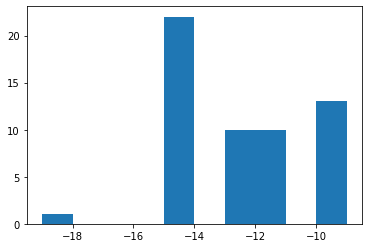

In [89]:
plt.hist(negatives)

In [90]:
centDF3.loc[11441:]

,target,accession,query,accession.1,hmmfrom,hmmto,alifrom,alito,envfrom,envto,...,strant,E-value,score,bias,description of target,Unnamed: 16,Repeat array def from Pille,Distance,Unnamed: 19,Unique_Identifier
11441,chrY,-,DYZ1_Yq,-,7,3583,61723776,61727322,61727324,61723775,...,-,0,2775.0,571.3,-,-3546,DYZ1_Yq,-13,NaN,11441
11443,chrY,-,DYZ1_Yq,-,6,3583,61727310,61730857,61730859,61727309,...,-,0,2778.1,577.0,-,-3547,DYZ1_Yq,-12,NaN,11443
11445,chrY,-,DYZ1_Yq,-,6,3583,61730844,61734391,61734393,61730843,...,-,0,2779.6,578.7,-,-3547,DYZ1_Yq,-13,NaN,11445
11447,chrY,-,DYZ1_Yq,-,10,3583,61734378,61737922,61737923,61734377,...,-,0,2794.8,573.9,-,-3544,DYZ1_Yq,-13,NaN,11447
11449,chrY,-,DYZ1_Yq,-,7,3583,61737913,61741459,61741461,61737912,...,-,0,2771.7,573.3,-,-3546,DYZ1_Yq,-9,NaN,11449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11589,chrY,-,DYZ1_Yq,-,1,3583,61984352,61987858,61987858,61984351,...,-,0,2798.9,568.5,-,-3506,DYZ1_Yq,2,NaN,11589
11591,chrY,-,DYZ1_Yq,-,1,3583,61987860,61991354,61991354,61987859,...,-,0,2816.5,564.2,-,-3494,DYZ1_Yq,2,NaN,11591
11593,chrY,-,DYZ1_Yq,-,1,3582,61991357,61994853,61994853,61991355,...,-,0,2840.7,567.1,-,-3496,DYZ1_Yq,3,NaN,11593
11595,chrY,-,DYZ1_Yq,-,1,3583,61994855,61998397,61998397,61994854,...,-,0,2886.9,560.8,-,-3542,DYZ1_Yq,2,NaN,11595


In [41]:
centDF3[centDF3['Distance']<-0]

,target,accession,query,accession.1,hmmfrom,hmmto,alifrom,alito,envfrom,envto,...,strant,E-value,score,bias,description of target,Unnamed: 16,Repeat array def from Pille,Distance,Unnamed: 19,Unique_Identifier
373,chrY,-,DYZ1_Yq,-,1,2457,28039354,28041775,28041775,28039354,...,-,0,2035.6,421.9,-,-2421,DYZ1_Yq,-2329,NaN,373
1254,chrY,-,DYZ1_Yq,-,1,3264,29666557,29669785,29669785,29666556,...,-,0,2778.8,531.6,-,-3228,DYZ1_Yq,-3136,NaN,1254
1351,chrY,-,DYZ1_Yq,-,1,1490,29836739,29838218,29838218,29836737,...,-,0,1248.3,260.5,-,-1479,DYZ1_Yq,-6,NaN,1351
1382,chrY,-,DYZ1_Yq,-,1,1494,29889502,29890984,29890984,29889500,...,-,0,1248.1,261.1,-,-1482,DYZ1_Yq,-9,NaN,1382
1407,chrY,-,DYZ1_Yq,-,1,1490,29931750,29933234,29933234,29931748,...,-,0,1244.6,269.6,-,-1484,DYZ1_Yq,-5,NaN,1407
1652,chrY,-,DYZ1_Yq,-,1,1490,30365518,30366997,30366997,30365516,...,-,0,1248.3,260.5,-,-1479,DYZ1_Yq,-6,NaN,1652
1689,chrY,-,DYZ1_Yq,-,1,1494,30429010,30430492,30430492,30429008,...,-,0,1247.6,259.5,-,-1482,DYZ1_Yq,-9,NaN,1689
1716,chrY,-,DYZ1_Yq,-,1,1490,30474827,30476311,30476311,30474825,...,-,0,1244.6,269.6,-,-1484,DYZ1_Yq,-5,NaN,1716
1911,chrY,-,DYZ1_Yq,-,1,1490,30819216,30820700,30820700,30819212,...,-,0,1248.3,263.5,-,-1484,DYZ1_Yq,-6,NaN,1911
1916,chrY,-,DYZ1_Yq,-,227,2276,30823993,30826021,30826022,30823993,...,-,0,1710.3,348.8,-,-2028,DYZ1_Yq,-26,NaN,1916


In [107]:
goodHits = []
badHits = []

tempDF = centDF2.iloc[0:224].copy()
tempDF2 = tempDF.iloc[::-1].copy()

#This is the starting comparison this never changes since it has 0 overlaps
GoodStart = int(centDF2.loc[224]['alifrom'])
GoodEnd = int(centDF2.loc[224]['alito'])


#Start going through DF before the 'GOLD' Hit one row at a time
for row in tempDF2.index:
    
    #If this row has not been tested then go ahead
    if str(row) in badHits:
        continue
        
    else:
        
        #Grab row information
        comparison1Start = int(tempDF2.loc[row]['alifrom'])
        comparison1End = int(tempDF2.loc[row]['alito'])
        comparison1LengthPer = (int(tempDF2.loc[row]['hmmto'])-int(tempDF2.loc[row]['hmmfrom']))/int(SizeBlockDict[tempDF2.loc[row]['query']])
        comparison1Distance = GoodStart-int(tempDF2.loc[row]['alito'])        
        
        if len(HMMERDict2[row]['Hits']) == 1:
            
            for overlappingHit in HMMERDict2[row]['Hits']:
         
                comparison2Start = int(tempDF2.loc[overlappingHit]['alifrom'])
                comparison2End = int(tempDF2.loc[overlappingHit]['alito'])
                comparison2LengthPer = (int(tempDF2.loc[overlappingHit]['hmmto'])-int(tempDF2.loc[overlappingHit]['hmmfrom']))/int(SizeBlockDict[tempDF2.loc[overlappingHit]['query']])
                comparison2Distance = GoodStart-int(tempDF2.loc[overlappingHit]['alito'])

                if (comparison1LengthPer > comparison2LengthPer) and comparison1Distance >=0:
                    GoodStart = comparison1Start
                    GoodEnd = comparison1End
                    goodHits.append(row)
                    badHits.append(str(overlappingHit))

                elif (comparison2LengthPer > comparison1LengthPer) and comparison2Distance >=0:
                    GoodStart = comparison2Start
                    GoodEnd = comparison2End
                    goodHits.append(str(overlappingHit))
                    badHits.append(row)

                else:
                    print("ERROR")
                    print(comparison1Start)
                    print(comparison1End)
                    print(comparison1Distance)
                    print(comparison2Start)
                    print(comparison2End)
                    print(comparison2Distance)
            
        else:
            print('no')
            print(row)
        
        

ERROR
27763819
27766933
-3114
27764418
27766933
-3114
ERROR
27760718
27763819
-3101
27761313
27763818
-3100
ERROR
27757621
27760718
-3097
27758206
27760717
-3096
ERROR
27754519
27757621
-3102
27754967
27757620
-3101
ERROR
27751412
27754519
-3107
27752006
27754519
-3107
ERROR
27748295
27751412
-3117
27748906
27751411
-3116
ERROR
27745184
27748295
-3111
27745615
27748295
-3111
ERROR
27742069
27745184
-3115
27742518
27745183
-3114
ERROR
27738954
27742069
-3115
27739549
27742068
-3114
ERROR
27735857
27738954
-3097
27736446
27738953
-3096
ERROR
27732755
27735857
-3102
27733204
27735856
-3101
ERROR
27729638
27732755
-3117
27730249
27732754
-3116
ERROR
27726532
27729638
-3106
27727122
27729638
-3106
ERROR
27723412
27726532
-3120
27723861
27726532
-3120
ERROR
27720271
27723412
-3141
27720874
27723412
-3141
ERROR
27717150
27720271
-3121
27717753
27720270
-3120
ERROR
27714050
27717150
-3100
27714639
27717149
-3099
ERROR
27710934
27714050
-3116
27711523
27714050
-3116
ERROR
27707834
27710934
-310

In [32]:
noOverLapRanges

[(0, 224),
 (225, 723),
 (724, 726),
 (727, 727),
 (728, 728),
 (729, 755),
 (756, 881),
 (882, 918),
 (919, 1069),
 (1070, 1082),
 (1083, 1087),
 (1088, 1106),
 (1107, 1135),
 (1136, 1202),
 (1203, 2605),
 (2606, 2626),
 (2627, 2697),
 (2698, 2700),
 (2701, 2703),
 (2704, 2846),
 (2847, 2967),
 (2968, 3074),
 (3075, 3087),
 (3088, 3120),
 (3121, 3123),
 (3124, 3138),
 (3139, 3141),
 (3142, 3154),
 (3155, 3157),
 (3158, 3164),
 (3165, 3167),
 (3168, 3174),
 (3175, 3177),
 (3178, 3246),
 (3247, 3249),
 (3250, 3254),
 (3255, 3257),
 (3258, 3684),
 (3685, 3687),
 (3688, 3690),
 (3691, 3837),
 (3838, 3840),
 (3841, 3991),
 (3992, 3994),
 (3995, 4279),
 (4280, 4282),
 (4283, 4351),
 (4352, 4356),
 (4357, 4359),
 (4360, 4586),
 (4587, 4661),
 (4662, 4664),
 (4665, 4667),
 (4668, 4804),
 (4805, 4807),
 (4808, 4902),
 (4903, 4957),
 (4958, 4960),
 (4961, 5047),
 (5048, 5238),
 (5239, 5660),
 (5661, 5673),
 (5674, 5694),
 (5695, 5835),
 (5836, 5864),
 (5865, 5881),
 (5882, 6242),
 (6243, 6245),

In [95]:
goodHits = []
badHits = []

tempDF = centDF2.iloc[0:224].copy()
tempDF2 = tempDF.iloc[::-1].copy()

#This is the starting comparison this never changes since it has 0 overlaps
GoodStart = int(centDF2.loc[224]['alifrom'])
GoodEnd = int(centDF2.loc[224]['alito'])


#Start going through DF before the 'GOLD' Hit one row at a time
for row in tempDF2.index:
    
    
    
    #If this row has not been tested then go ahead
    if str(row) in badHits:
        continue
        
    else:
        print(row)
        #Grab row information
        comparison1Start = int(tempDF2.loc[row]['alifrom'])
        comparison1End = int(tempDF2.loc[row]['alito'])
        comparison1LengthPer = (int(tempDF2.loc[row]['hmmto'])-int(tempDF2.loc[row]['hmmfrom']))/int(SizeBlockDict[tempDF2.loc[row]['query']])
        comparison1Distance = GoodStart-int(tempDF2.loc[row]['alito'])
        print(comparison1Distance)
        
        
        if len(HMMERDict2[row]['Hits'])==1:
            
            if str(HMMERDict2[row]['Hits'][0]) in badHits:
                continue
                
            else:
                
                comparison2Start = int(tempDF2.loc[HMMERDict2[row]['Hits'][0]]['alifrom'])
                comparison2End = int(tempDF2.loc[HMMERDict2[row]['Hits'][0]]['alito'])
                comparison2LengthPer = (int(tempDF2.loc[HMMERDict2[row]['Hits'][0]]['hmmto'])-int(tempDF2.loc[HMMERDict2[row]['Hits'][0]]['hmmfrom']))/int(SizeBlockDict[tempDF2.loc[HMMERDict2[row]['Hits'][0]]['query']])
                comparison2Distance = GoodStart-int(tempDF2.loc[HMMERDict2[row]['Hits'][0]]['alito'])
                
                if comparison1LengthPer > comparison2LengthPer and comparison1Distance >=0:
                    GoodStart = comparison1Start
                    GoodEnd = comparison1End
                    goodHits.append(row)
                    badHits.append(str(HMMERDict2[row]['Hits'][0]))
                    

                elif (comparison2LengthPer > comparison1LengthPer) and comparison2Distance >=0:
                    GoodStart = comparison2Start
                    GoodEnd = comparison2End
                    goodHits.append(str(HMMERDict2[row]['Hits'][0]))
                    badHits.append(row)
            
                else:
                    print("ERROR")
            
        
        else:
        
        
            tempList = {}
            for overlapHit in HMMERDict2[row]['Hits']:

                if str(overlapHit) in badHits:
                    continue

                else:

                    comparison2Start = int(tempDF2.loc[overlapHit]['alifrom'])
                    comparison2End = int(tempDF2.loc[overlapHit]['alito'])
                    comparison2LengthPer = (int(tempDF2.loc[overlapHit]['hmmto'])-int(tempDF2.loc[overlapHit]['hmmfrom']))/int(SizeBlockDict[tempDF2.loc[overlapHit]['query']])
                    comparison2Distance = GoodStart-int(tempDF2.loc[overlapHit]['alito'])
                    tempList[comparison2LengthPer]=[comparison2Start,comparison2End,comparison2LengthPer,comparison2Distance, overlapHit]
            print(tempList)

            if len(tempList)==0:

                GoodStart = comparison1Start
                GoodEnd = comparison1End
                goodHits.append(row)

            else:

                continue




                

223
3
221
598
219
567
217
466
215
566
213
597
211
568
209
3513
207
3156
205
604
203
598
202
-3114
FIRST ERROR
202
-3114


203
-3114


201
1
200
-3101
FIRST ERROR
200
-3101


201
-3100


199
1
198
-3097
FIRST ERROR
198
-3097


199
-3096


197
1
196
-3102
FIRST ERROR
196
-3102


197
-3101


195
0
194
-3107
FIRST ERROR
194
-3107


195
-3107


193
1
192
-3117
FIRST ERROR
192
-3117


193
-3116


191
0
190
-3111
FIRST ERROR
190
-3111


191
-3111


189
1
188
-3115
FIRST ERROR
188
-3115


189
-3114


187
1
186
-3115
FIRST ERROR
186
-3115


187
-3114


185
1
184
-3097
FIRST ERROR
184
-3097


185
-3096


183
1
182
-3102
FIRST ERROR
182
-3102


183
-3101


181
1
180
-3117
FIRST ERROR
180
-3117


181
-3116


179
0
178
-3106
FIRST ERROR
178
-3106


179
-3106


177
0
176
-3120
FIRST ERROR
176
-3120


177
-3120


175
0
174
-3141
FIRST ERROR
174
-3141


175
-3141


173
1
172
-3121
FIRST ERROR
172
-3121


173
-3120


171
1
170
-3100
FIRST ERROR
170
-3100


171
-3099


169
0
168
-3116
FIRST ERROR
168
-3

In [107]:
goodHits = []
badHits = []

tempDF = centDF2.iloc[0:224].copy()
tempDF2 = tempDF.iloc[::-1].copy()

#This is the starting comparison this never changes since it has 0 overlaps
GoodStart = int(centDF2.loc[224]['alifrom'])
GoodEnd = int(centDF2.loc[224]['alito'])


#Start going through DF before the 'GOLD' Hit one row at a time
for row in tempDF2.index:
    
    #If this row has not been tested then go ahead
    if str(row) in badHits:
        continue
        
    else:
        
        #Grab row information
        comparison1Start = int(tempDF2.loc[row]['alifrom'])
        comparison1End = int(tempDF2.loc[row]['alito'])
        comparison1LengthPer = (int(tempDF2.loc[row]['hmmto'])-int(tempDF2.loc[row]['hmmfrom']))/int(SizeBlockDict[tempDF2.loc[row]['query']])
        comparison1Distance = GoodStart-int(tempDF2.loc[row]['alito'])        
        
        if len(HMMERDict2[row]['Hits']) == 1:
            
            for overlappingHit in HMMERDict2[row]['Hits']:
         
                comparison2Start = int(tempDF2.loc[overlappingHit]['alifrom'])
                comparison2End = int(tempDF2.loc[overlappingHit]['alito'])
                comparison2LengthPer = (int(tempDF2.loc[overlappingHit]['hmmto'])-int(tempDF2.loc[overlappingHit]['hmmfrom']))/int(SizeBlockDict[tempDF2.loc[overlappingHit]['query']])
                comparison2Distance = GoodStart-int(tempDF2.loc[overlappingHit]['alito'])

                if (comparison1LengthPer > comparison2LengthPer) and comparison1Distance >=0:
                    GoodStart = comparison1Start
                    GoodEnd = comparison1End
                    goodHits.append(row)
                    badHits.append(str(overlappingHit))

                elif (comparison2LengthPer > comparison1LengthPer) and comparison2Distance >=0:
                    GoodStart = comparison2Start
                    GoodEnd = comparison2End
                    goodHits.append(str(overlappingHit))
                    badHits.append(row)

                else:
                    print("ERROR")
                    print(comparison1Start)
                    print(comparison1End)
                    print(comparison1Distance)
                    print(comparison2Start)
                    print(comparison2End)
                    print(comparison2Distance)
            
        else:
            print('no')
            print(row)
        
        

ERROR
27763819
27766933
-3114
27764418
27766933
-3114
ERROR
27760718
27763819
-3101
27761313
27763818
-3100
ERROR
27757621
27760718
-3097
27758206
27760717
-3096
ERROR
27754519
27757621
-3102
27754967
27757620
-3101
ERROR
27751412
27754519
-3107
27752006
27754519
-3107
ERROR
27748295
27751412
-3117
27748906
27751411
-3116
ERROR
27745184
27748295
-3111
27745615
27748295
-3111
ERROR
27742069
27745184
-3115
27742518
27745183
-3114
ERROR
27738954
27742069
-3115
27739549
27742068
-3114
ERROR
27735857
27738954
-3097
27736446
27738953
-3096
ERROR
27732755
27735857
-3102
27733204
27735856
-3101
ERROR
27729638
27732755
-3117
27730249
27732754
-3116
ERROR
27726532
27729638
-3106
27727122
27729638
-3106
ERROR
27723412
27726532
-3120
27723861
27726532
-3120
ERROR
27720271
27723412
-3141
27720874
27723412
-3141
ERROR
27717150
27720271
-3121
27717753
27720270
-3120
ERROR
27714050
27717150
-3100
27714639
27717149
-3099
ERROR
27710934
27714050
-3116
27711523
27714050
-3116
ERROR
27707834
27710934
-310